In [1]:
import numpy as np
import data1D
from reservoir import Reservoir
from sklearn.model_selection import GridSearchCV
import data_utils

%load_ext autoreload
%autoreload 2
%aimport data1D
%aimport reservoir

%matplotlib inline

In [2]:
b = Reservoir(n_res=2000, res_scale=0.33, res_encoding='phase',
              input_enc_param=np.pi, res_enc_param=np.pi,
              input_scale=0.93, input_encoding='phase',
#               scale_input_MinMax = (0, 1), scale_res_MinMax = None, scale_output_MinMax = (0, 1), # data standardization
              raw_input_feature = True, enc_input_feature = False, # concatenated states properties
              random_projection='simulation', weights_type='complex gaussian',
              activation_fun='intensity_in_tanh', activation_param=None,
              parallel_runs=1, parallel_test_runs = 200, bias_scale=0, leak_rate=0,
              pred_horizon=1, rec_pred_steps=200, forget = 500,
              train_method='ridge', train_param=0.5, verbose=0,
              gridsearch = True
             )

In [3]:
ks_data, xx_, tt = data1D.kuramoto_sivashinsky_from_dataset(sequence_length=6000, n_sequence=1)
ks_data = data_utils.scale(ks_data, [0, 1])
input_shape = ks_data.shape
input_data = ks_data.reshape((input_shape[1], input_shape[0], input_shape[2]))

In [4]:
params = [
    {
        'train_param': [0.25, 0.5, 1, 2, 4],
        'res_scale': np.linspace(0.2, 1, 20),
        'input_scale': np.linspace(0.2, 1,20)

    }
]

In [5]:
ctanh = GridSearchCV(estimator=b, param_grid=params, return_train_score=True, cv=3, n_jobs=1, verbose=2)
ctanh.fit(input_data)

print(ctanh.best_params_)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] input_scale=0.2, res_scale=0.2, train_param=0.25 ................
Testing score: 0.6142620156708243
Testing score: 0.7946215406211614
[CV] . input_scale=0.2, res_scale=0.2, train_param=0.25, total= 1.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV] input_scale=0.2, res_scale=0.2, train_param=0.25 ................
Testing score: 0.6458335749542002
Testing score: 0.7699475537308719
[CV] . input_scale=0.2, res_scale=0.2, train_param=0.25, total= 1.1min
[CV] input_scale=0.2, res_scale=0.2, train_param=0.25 ................
Testing score: 0.5570775857877198
Testing score: 0.6876844263740497
[CV] . input_scale=0.2, res_scale=0.2, train_param=0.25, total= 1.1min
[CV] input_scale=0.2, res_scale=0.2, train_param=0.5 .................
Testing score: 0.569436377844085
Testing score: 0.6841652530231722
[CV] .. input_scale=0.2, res_scale=0.2, train_param=0.5, total= 1.0min
[CV] input_scale=0.2, res_scale=0.2, train_param=0.5 .................
Testing score: 0.671358802467034
Testing score: 0.6935819101597496
[CV] .. input_scale=0.2, res_scale=0.2, train_param=0.5, total= 1.1min
[CV] input_scale=0.2, res_scale=0.2, train_param=0.5 .................
Testing score: 0.5272295854218476
Testing score: 0.5609182540307194
[CV] .. input_scale=0.2

Testing score: 0.5768118055069514
[CV]  input_scale=0.2, res_scale=0.28421052631578947, train_param=1, total=  47.7s
[CV] input_scale=0.2, res_scale=0.28421052631578947, train_param=2 ...
Testing score: 0.5048027126923802
Testing score: 0.5088975222754689
[CV]  input_scale=0.2, res_scale=0.28421052631578947, train_param=2, total=  47.7s
[CV] input_scale=0.2, res_scale=0.28421052631578947, train_param=2 ...
Testing score: 0.5941529798290504
Testing score: 0.7135477935380962
[CV]  input_scale=0.2, res_scale=0.28421052631578947, train_param=2, total=  47.5s
[CV] input_scale=0.2, res_scale=0.28421052631578947, train_param=2 ...
Testing score: 0.4702654783928202
Testing score: 0.5140278669850599
[CV]  input_scale=0.2, res_scale=0.28421052631578947, train_param=2, total=  47.5s
[CV] input_scale=0.2, res_scale=0.28421052631578947, train_param=4 ...
Testing score: 0.5981222010028473
Testing score: 0.5249866139211304
[CV]  input_scale=0.2, res_scale=0.28421052631578947, train_param=4, total=  4

Testing score: 0.6151725019002083
Testing score: 0.724359985583676
[CV]  input_scale=0.2, res_scale=0.4105263157894737, train_param=0.25, total=  47.5s
[CV] input_scale=0.2, res_scale=0.4105263157894737, train_param=0.25 .
Testing score: 0.6832852418192015
Testing score: 0.659084887581716
[CV]  input_scale=0.2, res_scale=0.4105263157894737, train_param=0.25, total=  47.6s
[CV] input_scale=0.2, res_scale=0.4105263157894737, train_param=0.25 .
Testing score: 0.5365400291261692
Testing score: 0.6712448559397592
[CV]  input_scale=0.2, res_scale=0.4105263157894737, train_param=0.25, total=  47.5s
[CV] input_scale=0.2, res_scale=0.4105263157894737, train_param=0.5 ..
Testing score: 0.4873222448653959
Testing score: 0.5793373152550363
[CV]  input_scale=0.2, res_scale=0.4105263157894737, train_param=0.5, total=  47.3s
[CV] input_scale=0.2, res_scale=0.4105263157894737, train_param=0.5 ..
Testing score: 0.6012306038864697
Testing score: 0.6978380974467921
[CV]  input_scale=0.2, res_scale=0.4105

[CV] input_scale=0.2, res_scale=0.49473684210526314, train_param=1 ...
Testing score: 0.5169157752862814
Testing score: 0.5935652557309978
[CV]  input_scale=0.2, res_scale=0.49473684210526314, train_param=1, total=  47.5s
[CV] input_scale=0.2, res_scale=0.49473684210526314, train_param=1 ...
Testing score: 0.5795346452283814
Testing score: 0.599325076248717
[CV]  input_scale=0.2, res_scale=0.49473684210526314, train_param=1, total=  47.8s
[CV] input_scale=0.2, res_scale=0.49473684210526314, train_param=2 ...
Testing score: 0.48629160536333416
Testing score: 0.5087945700386476
[CV]  input_scale=0.2, res_scale=0.49473684210526314, train_param=2, total=  47.5s
[CV] input_scale=0.2, res_scale=0.49473684210526314, train_param=2 ...
Testing score: 0.4707975672355095
Testing score: 0.3966424792876928
[CV]  input_scale=0.2, res_scale=0.49473684210526314, train_param=2, total=  47.2s
[CV] input_scale=0.2, res_scale=0.49473684210526314, train_param=2 ...
Testing score: 0.48474729352229307
Testin

[CV]  input_scale=0.2, res_scale=0.5789473684210527, train_param=4, total=  47.7s
[CV] input_scale=0.2, res_scale=0.5789473684210527, train_param=4 ....
Testing score: 0.4677253327279677
Testing score: 0.4401709458294579
[CV]  input_scale=0.2, res_scale=0.5789473684210527, train_param=4, total=  47.7s
[CV] input_scale=0.2, res_scale=0.6210526315789473, train_param=0.25 .
Testing score: -1.2414443365880738
Testing score: 0.4540315850281941
[CV]  input_scale=0.2, res_scale=0.6210526315789473, train_param=0.25, total=  47.3s
[CV] input_scale=0.2, res_scale=0.6210526315789473, train_param=0.25 .
Testing score: 0.6073847008959276
Testing score: 0.6218248641696834
[CV]  input_scale=0.2, res_scale=0.6210526315789473, train_param=0.25, total=  47.2s
[CV] input_scale=0.2, res_scale=0.6210526315789473, train_param=0.25 .
Testing score: 0.5523014946529532
Testing score: 0.6102631687206516
[CV]  input_scale=0.2, res_scale=0.6210526315789473, train_param=0.25, total=  47.3s
[CV] input_scale=0.2, re

Testing score: 0.37458834164922206
Testing score: 0.5236398428903437
[CV]  input_scale=0.2, res_scale=0.7052631578947368, train_param=0.5, total=  48.3s
[CV] input_scale=0.2, res_scale=0.7052631578947368, train_param=1 ....
Testing score: 0.4286663171352122
Testing score: 0.5861395492960064
[CV]  input_scale=0.2, res_scale=0.7052631578947368, train_param=1, total=  47.5s
[CV] input_scale=0.2, res_scale=0.7052631578947368, train_param=1 ....
Testing score: -0.8073647962970887
Testing score: 0.10151533573466909
[CV]  input_scale=0.2, res_scale=0.7052631578947368, train_param=1, total=  48.0s
[CV] input_scale=0.2, res_scale=0.7052631578947368, train_param=1 ....
Testing score: 0.42462396713963335
Testing score: 0.4908239945462136
[CV]  input_scale=0.2, res_scale=0.7052631578947368, train_param=1, total=  47.3s
[CV] input_scale=0.2, res_scale=0.7052631578947368, train_param=2 ....
Testing score: 0.48846649860269364
Testing score: 0.5210189826709577
[CV]  input_scale=0.2, res_scale=0.705263

[CV] input_scale=0.2, res_scale=0.7894736842105263, train_param=4 ....
Testing score: 0.5081227669819748
Testing score: 0.5186017031638526
[CV]  input_scale=0.2, res_scale=0.7894736842105263, train_param=4, total=  47.8s
[CV] input_scale=0.2, res_scale=0.7894736842105263, train_param=4 ....
Testing score: 0.5964527998786571
Testing score: 0.49263248831438644
[CV]  input_scale=0.2, res_scale=0.7894736842105263, train_param=4, total=  47.4s
[CV] input_scale=0.2, res_scale=0.7894736842105263, train_param=4 ....
Testing score: 0.4032672005834632
Testing score: 0.4898247697054753
[CV]  input_scale=0.2, res_scale=0.7894736842105263, train_param=4, total=  47.4s
[CV] input_scale=0.2, res_scale=0.831578947368421, train_param=0.25 ..
Testing score: 0.42912272329203216
Testing score: 0.5607063174105604
[CV]  input_scale=0.2, res_scale=0.831578947368421, train_param=0.25, total=  47.6s
[CV] input_scale=0.2, res_scale=0.831578947368421, train_param=0.25 ..
Testing score: 0.24645026183830288
Testin

[CV]  input_scale=0.2, res_scale=0.9157894736842105, train_param=0.5, total=  47.9s
[CV] input_scale=0.2, res_scale=0.9157894736842105, train_param=0.5 ..
Testing score: 0.4853827978938009
Testing score: 0.5550671996646417
[CV]  input_scale=0.2, res_scale=0.9157894736842105, train_param=0.5, total=  47.4s
[CV] input_scale=0.2, res_scale=0.9157894736842105, train_param=0.5 ..
Testing score: -0.9529472043535618
Testing score: -0.21644270010350208
[CV]  input_scale=0.2, res_scale=0.9157894736842105, train_param=0.5, total=  47.7s
[CV] input_scale=0.2, res_scale=0.9157894736842105, train_param=1 ....
Testing score: 0.5524732464442598
Testing score: 0.5941255135364837
[CV]  input_scale=0.2, res_scale=0.9157894736842105, train_param=1, total=  47.8s
[CV] input_scale=0.2, res_scale=0.9157894736842105, train_param=1 ....
Testing score: 0.20811608323401976
Testing score: -0.09217017256962912
[CV]  input_scale=0.2, res_scale=0.9157894736842105, train_param=1, total=  47.8s
[CV] input_scale=0.2, 

[CV] input_scale=0.2, res_scale=1.0, train_param=2 ...................
Testing score: 0.3620164868521758
Testing score: 0.49313875559635245
[CV] .... input_scale=0.2, res_scale=1.0, train_param=2, total=  48.3s
[CV] input_scale=0.2, res_scale=1.0, train_param=4 ...................
Testing score: 0.5008424452168209
Testing score: 0.480181476910596
[CV] .... input_scale=0.2, res_scale=1.0, train_param=4, total=  48.0s
[CV] input_scale=0.2, res_scale=1.0, train_param=4 ...................
Testing score: 0.47489094713313007
Testing score: 0.42984165649012407
[CV] .... input_scale=0.2, res_scale=1.0, train_param=4, total=  47.6s
[CV] input_scale=0.2, res_scale=1.0, train_param=4 ...................
Testing score: 0.4734636770288795
Testing score: 0.5350560791580236
[CV] .... input_scale=0.2, res_scale=1.0, train_param=4, total=  47.6s
[CV] input_scale=0.24210526315789474, res_scale=0.2, train_param=0.25 
Testing score: 0.6057229237293378
Testing score: 0.7786865313636782
[CV]  input_scale=0

[CV]  input_scale=0.24210526315789474, res_scale=0.28421052631578947, train_param=0.25, total=  47.3s
[CV] input_scale=0.24210526315789474, res_scale=0.28421052631578947, train_param=0.25 
Testing score: 0.7336274063858623
Testing score: 0.7142198506430032
[CV]  input_scale=0.24210526315789474, res_scale=0.28421052631578947, train_param=0.25, total=  47.5s
[CV] input_scale=0.24210526315789474, res_scale=0.28421052631578947, train_param=0.25 
Testing score: 0.5139463460168179
Testing score: 0.687909805245702
[CV]  input_scale=0.24210526315789474, res_scale=0.28421052631578947, train_param=0.25, total=  47.5s
[CV] input_scale=0.24210526315789474, res_scale=0.28421052631578947, train_param=0.5 
Testing score: 0.6210201221453879
Testing score: 0.7216282105250315
[CV]  input_scale=0.24210526315789474, res_scale=0.28421052631578947, train_param=0.5, total=  47.9s
[CV] input_scale=0.24210526315789474, res_scale=0.28421052631578947, train_param=0.5 
Testing score: 0.6397298352857499
Testing sc

[CV] input_scale=0.24210526315789474, res_scale=0.368421052631579, train_param=0.5 
Testing score: 0.6008782385181253
Testing score: 0.6676603228404949
[CV]  input_scale=0.24210526315789474, res_scale=0.368421052631579, train_param=0.5, total=  47.5s
[CV] input_scale=0.24210526315789474, res_scale=0.368421052631579, train_param=0.5 
Testing score: 0.5930622932392694
Testing score: 0.699263032969252
[CV]  input_scale=0.24210526315789474, res_scale=0.368421052631579, train_param=0.5, total=  47.4s
[CV] input_scale=0.24210526315789474, res_scale=0.368421052631579, train_param=0.5 
Testing score: 0.5808416207419631
Testing score: 0.6943845388960334
[CV]  input_scale=0.24210526315789474, res_scale=0.368421052631579, train_param=0.5, total=  47.9s
[CV] input_scale=0.24210526315789474, res_scale=0.368421052631579, train_param=1 
Testing score: 0.5503028044966571
Testing score: 0.7070001958207248
[CV]  input_scale=0.24210526315789474, res_scale=0.368421052631579, train_param=1, total=  47.5s
[

[CV]  input_scale=0.24210526315789474, res_scale=0.45263157894736844, train_param=0.5, total=  47.5s
[CV] input_scale=0.24210526315789474, res_scale=0.45263157894736844, train_param=1 
Testing score: 0.4587972184967045
Testing score: 0.5511270532572736
[CV]  input_scale=0.24210526315789474, res_scale=0.45263157894736844, train_param=1, total=  47.6s
[CV] input_scale=0.24210526315789474, res_scale=0.45263157894736844, train_param=1 
Testing score: 0.4937165433354521
Testing score: 0.6109534630695379
[CV]  input_scale=0.24210526315789474, res_scale=0.45263157894736844, train_param=1, total=  47.4s
[CV] input_scale=0.24210526315789474, res_scale=0.45263157894736844, train_param=1 
Testing score: 0.5253099581373417
Testing score: 0.5948004519377245
[CV]  input_scale=0.24210526315789474, res_scale=0.45263157894736844, train_param=1, total=  47.7s
[CV] input_scale=0.24210526315789474, res_scale=0.45263157894736844, train_param=2 
Testing score: 0.49578273780331084
Testing score: 0.5393320668

[CV] input_scale=0.24210526315789474, res_scale=0.5368421052631579, train_param=1 
Testing score: 0.5827953670474253
Testing score: 0.6676465831485506
[CV]  input_scale=0.24210526315789474, res_scale=0.5368421052631579, train_param=1, total=  47.2s
[CV] input_scale=0.24210526315789474, res_scale=0.5368421052631579, train_param=2 
Testing score: 0.5433425320183518
Testing score: 0.6391148743732418
[CV]  input_scale=0.24210526315789474, res_scale=0.5368421052631579, train_param=2, total=  48.1s
[CV] input_scale=0.24210526315789474, res_scale=0.5368421052631579, train_param=2 
Testing score: 0.5838379943779279
Testing score: 0.637078450885235
[CV]  input_scale=0.24210526315789474, res_scale=0.5368421052631579, train_param=2, total=  47.8s
[CV] input_scale=0.24210526315789474, res_scale=0.5368421052631579, train_param=2 
Testing score: 0.5365197886437916
Testing score: 0.5749453935356664
[CV]  input_scale=0.24210526315789474, res_scale=0.5368421052631579, train_param=2, total=  47.3s
[CV] 

[CV]  input_scale=0.24210526315789474, res_scale=0.6210526315789473, train_param=2, total=  47.6s
[CV] input_scale=0.24210526315789474, res_scale=0.6210526315789473, train_param=2 
Testing score: 0.5173015654643186
Testing score: 0.6153845811498566
[CV]  input_scale=0.24210526315789474, res_scale=0.6210526315789473, train_param=2, total=  47.6s
[CV] input_scale=0.24210526315789474, res_scale=0.6210526315789473, train_param=4 
Testing score: 0.5208201670446526
Testing score: 0.5227791687782555
[CV]  input_scale=0.24210526315789474, res_scale=0.6210526315789473, train_param=4, total=  48.0s
[CV] input_scale=0.24210526315789474, res_scale=0.6210526315789473, train_param=4 
Testing score: 0.4807089673740417
Testing score: 0.455233945551341
[CV]  input_scale=0.24210526315789474, res_scale=0.6210526315789473, train_param=4, total=  47.6s
[CV] input_scale=0.24210526315789474, res_scale=0.6210526315789473, train_param=4 
Testing score: 0.442430096637789
Testing score: 0.4604982932710947
[CV]  

[CV] input_scale=0.24210526315789474, res_scale=0.7052631578947368, train_param=4 
Testing score: 0.5311999490011678
Testing score: 0.5125155902066716
[CV]  input_scale=0.24210526315789474, res_scale=0.7052631578947368, train_param=4, total=  47.7s
[CV] input_scale=0.24210526315789474, res_scale=0.7052631578947368, train_param=4 
Testing score: 0.4646153077310182
Testing score: 0.5549910637647961
[CV]  input_scale=0.24210526315789474, res_scale=0.7052631578947368, train_param=4, total=  47.9s
[CV] input_scale=0.24210526315789474, res_scale=0.7473684210526317, train_param=0.25 
Testing score: 0.5808729957311818
Testing score: 0.6482097018456014
[CV]  input_scale=0.24210526315789474, res_scale=0.7473684210526317, train_param=0.25, total=  48.1s
[CV] input_scale=0.24210526315789474, res_scale=0.7473684210526317, train_param=0.25 
Testing score: 0.4530880737860934
Testing score: 0.4583535533865093
[CV]  input_scale=0.24210526315789474, res_scale=0.7473684210526317, train_param=0.25, total=

Testing score: 0.5827930591897916
[CV]  input_scale=0.24210526315789474, res_scale=0.831578947368421, train_param=0.25, total=  47.7s
[CV] input_scale=0.24210526315789474, res_scale=0.831578947368421, train_param=0.25 
Testing score: 0.6328735115866446
Testing score: 0.6999374270028842
[CV]  input_scale=0.24210526315789474, res_scale=0.831578947368421, train_param=0.25, total=  48.5s
[CV] input_scale=0.24210526315789474, res_scale=0.831578947368421, train_param=0.25 
Testing score: 0.49590936634700944
Testing score: 0.5634222410239271
[CV]  input_scale=0.24210526315789474, res_scale=0.831578947368421, train_param=0.25, total=  47.8s
[CV] input_scale=0.24210526315789474, res_scale=0.831578947368421, train_param=0.5 
Testing score: -4.598157452898876
Testing score: -2.228771862130832
[CV]  input_scale=0.24210526315789474, res_scale=0.831578947368421, train_param=0.5, total=  47.9s
[CV] input_scale=0.24210526315789474, res_scale=0.831578947368421, train_param=0.5 
Testing score: 0.6972483

[CV] input_scale=0.24210526315789474, res_scale=0.9157894736842105, train_param=0.5 
Testing score: 0.4312135145158814
Testing score: 0.5760779980313805
[CV]  input_scale=0.24210526315789474, res_scale=0.9157894736842105, train_param=0.5, total=  47.7s
[CV] input_scale=0.24210526315789474, res_scale=0.9157894736842105, train_param=0.5 
Testing score: 0.6357348619286193
Testing score: 0.6137558646133163
[CV]  input_scale=0.24210526315789474, res_scale=0.9157894736842105, train_param=0.5, total=  47.9s
[CV] input_scale=0.24210526315789474, res_scale=0.9157894736842105, train_param=0.5 
Testing score: 0.5148053559738298
Testing score: 0.6165228213292164
[CV]  input_scale=0.24210526315789474, res_scale=0.9157894736842105, train_param=0.5, total=  47.6s
[CV] input_scale=0.24210526315789474, res_scale=0.9157894736842105, train_param=1 
Testing score: 0.4440760733027429
Testing score: 0.5436566193794417
[CV]  input_scale=0.24210526315789474, res_scale=0.9157894736842105, train_param=1, total=

[CV] input_scale=0.24210526315789474, res_scale=1.0, train_param=1 ...
Testing score: 0.3414969436493457
Testing score: 0.44863651853615283
[CV]  input_scale=0.24210526315789474, res_scale=1.0, train_param=1, total=  47.6s
[CV] input_scale=0.24210526315789474, res_scale=1.0, train_param=1 ...
Testing score: 0.5197673501102174
Testing score: 0.5957715774587669
[CV]  input_scale=0.24210526315789474, res_scale=1.0, train_param=1, total=  47.8s
[CV] input_scale=0.24210526315789474, res_scale=1.0, train_param=1 ...
Testing score: -1.703399592143506
Testing score: -0.11826719714224754
[CV]  input_scale=0.24210526315789474, res_scale=1.0, train_param=1, total=  47.6s
[CV] input_scale=0.24210526315789474, res_scale=1.0, train_param=2 ...
Testing score: 0.41873051419553353
Testing score: 0.4845588388926716
[CV]  input_scale=0.24210526315789474, res_scale=1.0, train_param=2, total=  47.5s
[CV] input_scale=0.24210526315789474, res_scale=1.0, train_param=2 ...
Testing score: 0.5048080110823912
Tes

[CV] input_scale=0.28421052631578947, res_scale=0.24210526315789474, train_param=2 
Testing score: 0.5507332212477178
Testing score: 0.6462965899682538
[CV]  input_scale=0.28421052631578947, res_scale=0.24210526315789474, train_param=2, total=  48.1s
[CV] input_scale=0.28421052631578947, res_scale=0.24210526315789474, train_param=4 
Testing score: 0.5222317889383858
Testing score: 0.5890298962644451
[CV]  input_scale=0.28421052631578947, res_scale=0.24210526315789474, train_param=4, total=  47.3s
[CV] input_scale=0.28421052631578947, res_scale=0.24210526315789474, train_param=4 
Testing score: 0.5819681248814121
Testing score: 0.6526732282420521
[CV]  input_scale=0.28421052631578947, res_scale=0.24210526315789474, train_param=4, total=  47.6s
[CV] input_scale=0.28421052631578947, res_scale=0.24210526315789474, train_param=4 
Testing score: 0.4352330107732483
Testing score: 0.6280426929278118
[CV]  input_scale=0.28421052631578947, res_scale=0.24210526315789474, train_param=4, total=  47

Testing score: 0.646922302950057
[CV]  input_scale=0.28421052631578947, res_scale=0.3263157894736842, train_param=4, total=  47.6s
[CV] input_scale=0.28421052631578947, res_scale=0.3263157894736842, train_param=4 
Testing score: 0.5086151597295968
Testing score: 0.5401661040957006
[CV]  input_scale=0.28421052631578947, res_scale=0.3263157894736842, train_param=4, total=  47.6s
[CV] input_scale=0.28421052631578947, res_scale=0.368421052631579, train_param=0.25 
Testing score: 0.6613507388822826
Testing score: 0.7520150579184186
[CV]  input_scale=0.28421052631578947, res_scale=0.368421052631579, train_param=0.25, total=  47.9s
[CV] input_scale=0.28421052631578947, res_scale=0.368421052631579, train_param=0.25 
Testing score: 0.7596904374279381
Testing score: 0.7941042328703616
[CV]  input_scale=0.28421052631578947, res_scale=0.368421052631579, train_param=0.25, total=  47.6s
[CV] input_scale=0.28421052631578947, res_scale=0.368421052631579, train_param=0.25 
Testing score: 0.529686154007

[CV] input_scale=0.28421052631578947, res_scale=0.45263157894736844, train_param=0.25 
Testing score: 0.6771006496939462
Testing score: 0.7420645647297885
[CV]  input_scale=0.28421052631578947, res_scale=0.45263157894736844, train_param=0.25, total=  47.6s
[CV] input_scale=0.28421052631578947, res_scale=0.45263157894736844, train_param=0.25 
Testing score: 0.5763294831075605
Testing score: 0.698475759645762
[CV]  input_scale=0.28421052631578947, res_scale=0.45263157894736844, train_param=0.25, total=  48.0s
[CV] input_scale=0.28421052631578947, res_scale=0.45263157894736844, train_param=0.5 
Testing score: 0.6130373639460207
Testing score: 0.6337153751067047
[CV]  input_scale=0.28421052631578947, res_scale=0.45263157894736844, train_param=0.5, total=  47.7s
[CV] input_scale=0.28421052631578947, res_scale=0.45263157894736844, train_param=0.5 
Testing score: 0.6227923744373398
Testing score: 0.6653228592064907
[CV]  input_scale=0.28421052631578947, res_scale=0.45263157894736844, train_pa

Testing score: 0.600007824835179
Testing score: 0.7591838614694212
[CV]  input_scale=0.28421052631578947, res_scale=0.5368421052631579, train_param=0.5, total=  47.6s
[CV] input_scale=0.28421052631578947, res_scale=0.5368421052631579, train_param=0.5 
Testing score: 0.5848485912470445
Testing score: 0.6134883364344016
[CV]  input_scale=0.28421052631578947, res_scale=0.5368421052631579, train_param=0.5, total=  47.9s
[CV] input_scale=0.28421052631578947, res_scale=0.5368421052631579, train_param=0.5 
Testing score: 0.5611437979816596
Testing score: 0.6136321373840466
[CV]  input_scale=0.28421052631578947, res_scale=0.5368421052631579, train_param=0.5, total=  47.6s
[CV] input_scale=0.28421052631578947, res_scale=0.5368421052631579, train_param=1 
Testing score: 0.45980551458320873
Testing score: 0.5757978591835242
[CV]  input_scale=0.28421052631578947, res_scale=0.5368421052631579, train_param=1, total=  47.4s
[CV] input_scale=0.28421052631578947, res_scale=0.5368421052631579, train_par

[CV]  input_scale=0.28421052631578947, res_scale=0.6210526315789473, train_param=0.5, total=  47.6s
[CV] input_scale=0.28421052631578947, res_scale=0.6210526315789473, train_param=1 
Testing score: 0.45770929988911113
Testing score: 0.5942697558988037
[CV]  input_scale=0.28421052631578947, res_scale=0.6210526315789473, train_param=1, total=  47.6s
[CV] input_scale=0.28421052631578947, res_scale=0.6210526315789473, train_param=1 
Testing score: 0.6259916602525935
Testing score: 0.6953677421379085
[CV]  input_scale=0.28421052631578947, res_scale=0.6210526315789473, train_param=1, total=  47.5s
[CV] input_scale=0.28421052631578947, res_scale=0.6210526315789473, train_param=1 
Testing score: 0.09303706376681387
Testing score: 0.02517499512274879
[CV]  input_scale=0.28421052631578947, res_scale=0.6210526315789473, train_param=1, total=  47.7s
[CV] input_scale=0.28421052631578947, res_scale=0.6210526315789473, train_param=2 
Testing score: 0.5022048654367253
Testing score: 0.5469536089691633

[CV] input_scale=0.28421052631578947, res_scale=0.7052631578947368, train_param=1 
Testing score: 0.5035674261478948
Testing score: 0.5679717760095071
[CV]  input_scale=0.28421052631578947, res_scale=0.7052631578947368, train_param=1, total=  47.8s
[CV] input_scale=0.28421052631578947, res_scale=0.7052631578947368, train_param=2 
Testing score: 0.5218669224742087
Testing score: 0.6287106367517231
[CV]  input_scale=0.28421052631578947, res_scale=0.7052631578947368, train_param=2, total=  47.4s
[CV] input_scale=0.28421052631578947, res_scale=0.7052631578947368, train_param=2 
Testing score: 0.4769374703460696
Testing score: 0.478046200773505
[CV]  input_scale=0.28421052631578947, res_scale=0.7052631578947368, train_param=2, total=  48.8s
[CV] input_scale=0.28421052631578947, res_scale=0.7052631578947368, train_param=2 
Testing score: 0.44070076556877713
Testing score: 0.48986866774642734
[CV]  input_scale=0.28421052631578947, res_scale=0.7052631578947368, train_param=2, total=  48.8s
[CV

[CV]  input_scale=0.28421052631578947, res_scale=0.7894736842105263, train_param=2, total=  48.5s
[CV] input_scale=0.28421052631578947, res_scale=0.7894736842105263, train_param=2 
Testing score: 0.3885762046826092
Testing score: 0.4501435781052021
[CV]  input_scale=0.28421052631578947, res_scale=0.7894736842105263, train_param=2, total=  48.9s
[CV] input_scale=0.28421052631578947, res_scale=0.7894736842105263, train_param=4 
Testing score: 0.506833308367504
Testing score: 0.4917025330561495
[CV]  input_scale=0.28421052631578947, res_scale=0.7894736842105263, train_param=4, total=  48.5s
[CV] input_scale=0.28421052631578947, res_scale=0.7894736842105263, train_param=4 
Testing score: 0.5282855205336467
Testing score: 0.4524857882290837
[CV]  input_scale=0.28421052631578947, res_scale=0.7894736842105263, train_param=4, total=  48.7s
[CV] input_scale=0.28421052631578947, res_scale=0.7894736842105263, train_param=4 
Testing score: 0.43855995786618873
Testing score: 0.530083999979235
[CV] 

Testing score: 0.5129160757656783
Testing score: 0.4578088845153079
[CV]  input_scale=0.28421052631578947, res_scale=0.8736842105263158, train_param=4, total=  49.1s
[CV] input_scale=0.28421052631578947, res_scale=0.8736842105263158, train_param=4 
Testing score: 0.44194093492544473
Testing score: 0.5123202015016413
[CV]  input_scale=0.28421052631578947, res_scale=0.8736842105263158, train_param=4, total=  49.4s
[CV] input_scale=0.28421052631578947, res_scale=0.9157894736842105, train_param=0.25 
Testing score: 0.5337156573488201
Testing score: 0.583437772822833
[CV]  input_scale=0.28421052631578947, res_scale=0.9157894736842105, train_param=0.25, total=  49.1s
[CV] input_scale=0.28421052631578947, res_scale=0.9157894736842105, train_param=0.25 
Testing score: 0.7180015732183572
Testing score: 0.649961465179328
[CV]  input_scale=0.28421052631578947, res_scale=0.9157894736842105, train_param=0.25, total=  48.6s
[CV] input_scale=0.28421052631578947, res_scale=0.9157894736842105, train_pa

[CV] input_scale=0.28421052631578947, res_scale=1.0, train_param=0.25 
Testing score: 0.24708361605651386
Testing score: -0.09789931145405362
[CV]  input_scale=0.28421052631578947, res_scale=1.0, train_param=0.25, total=  48.7s
[CV] input_scale=0.28421052631578947, res_scale=1.0, train_param=0.25 
Testing score: 0.4955043031531092
Testing score: 0.6931865087239062
[CV]  input_scale=0.28421052631578947, res_scale=1.0, train_param=0.25, total=  48.9s
[CV] input_scale=0.28421052631578947, res_scale=1.0, train_param=0.5 .
Testing score: 0.4343095372474728
Testing score: 0.5424759495588918
[CV]  input_scale=0.28421052631578947, res_scale=1.0, train_param=0.5, total=  48.8s
[CV] input_scale=0.28421052631578947, res_scale=1.0, train_param=0.5 .
Testing score: 0.488476189148793
Testing score: 0.5168649549093967
[CV]  input_scale=0.28421052631578947, res_scale=1.0, train_param=0.5, total=  48.6s
[CV] input_scale=0.28421052631578947, res_scale=1.0, train_param=0.5 .
Testing score: 0.531570204178

[CV]  input_scale=0.3263157894736842, res_scale=0.24210526315789474, train_param=1, total=  48.7s
[CV] input_scale=0.3263157894736842, res_scale=0.24210526315789474, train_param=1 
Testing score: 0.6767503331583208
Testing score: 0.6960503327642646
[CV]  input_scale=0.3263157894736842, res_scale=0.24210526315789474, train_param=1, total=  48.6s
[CV] input_scale=0.3263157894736842, res_scale=0.24210526315789474, train_param=1 
Testing score: 0.44927494888290687
Testing score: 0.6353494650698339
[CV]  input_scale=0.3263157894736842, res_scale=0.24210526315789474, train_param=1, total=  48.7s
[CV] input_scale=0.3263157894736842, res_scale=0.24210526315789474, train_param=2 
Testing score: 0.4930834363829314
Testing score: 0.6291406213241633
[CV]  input_scale=0.3263157894736842, res_scale=0.24210526315789474, train_param=2, total=  49.2s
[CV] input_scale=0.3263157894736842, res_scale=0.24210526315789474, train_param=2 
Testing score: 0.6795683328738676
Testing score: 0.6616905732207918
[CV

Testing score: 0.5362152022789326
Testing score: 0.6262715323614375
[CV]  input_scale=0.3263157894736842, res_scale=0.3263157894736842, train_param=2, total=  48.5s
[CV] input_scale=0.3263157894736842, res_scale=0.3263157894736842, train_param=2 
Testing score: 0.47972165188556026
Testing score: 0.5556528218288042
[CV]  input_scale=0.3263157894736842, res_scale=0.3263157894736842, train_param=2, total=  48.8s
[CV] input_scale=0.3263157894736842, res_scale=0.3263157894736842, train_param=2 
Testing score: 0.5366267390932243
Testing score: 0.5674839359640569
[CV]  input_scale=0.3263157894736842, res_scale=0.3263157894736842, train_param=2, total=  48.7s
[CV] input_scale=0.3263157894736842, res_scale=0.3263157894736842, train_param=4 
Testing score: 0.5717998735042276
Testing score: 0.6539770461458401
[CV]  input_scale=0.3263157894736842, res_scale=0.3263157894736842, train_param=4, total=  48.6s
[CV] input_scale=0.3263157894736842, res_scale=0.3263157894736842, train_param=4 
Testing sco

Testing score: 0.5055558528976438
Testing score: 0.5950269676367526
[CV]  input_scale=0.3263157894736842, res_scale=0.4105263157894737, train_param=4, total=  48.3s
[CV] input_scale=0.3263157894736842, res_scale=0.4105263157894737, train_param=4 
Testing score: 0.574254468409564
Testing score: 0.5847792945834367
[CV]  input_scale=0.3263157894736842, res_scale=0.4105263157894737, train_param=4, total=  48.6s
[CV] input_scale=0.3263157894736842, res_scale=0.4105263157894737, train_param=4 
Testing score: 0.542246622508779
Testing score: 0.6034591796587773
[CV]  input_scale=0.3263157894736842, res_scale=0.4105263157894737, train_param=4, total=  48.5s
[CV] input_scale=0.3263157894736842, res_scale=0.45263157894736844, train_param=0.25 
Testing score: 0.6013773221242538
Testing score: 0.7097542820083061
[CV]  input_scale=0.3263157894736842, res_scale=0.45263157894736844, train_param=0.25, total=  48.9s
[CV] input_scale=0.3263157894736842, res_scale=0.45263157894736844, train_param=0.25 
Te

[CV] input_scale=0.3263157894736842, res_scale=0.5368421052631579, train_param=0.25 
Testing score: 0.6498957201014559
Testing score: 0.7161791373540091
[CV]  input_scale=0.3263157894736842, res_scale=0.5368421052631579, train_param=0.25, total=  48.8s
[CV] input_scale=0.3263157894736842, res_scale=0.5368421052631579, train_param=0.25 
Testing score: 0.6134442105406201
Testing score: 0.6523070895950323
[CV]  input_scale=0.3263157894736842, res_scale=0.5368421052631579, train_param=0.25, total=  48.5s
[CV] input_scale=0.3263157894736842, res_scale=0.5368421052631579, train_param=0.25 
Testing score: 0.5255039127678105
Testing score: 0.6794227327399087
[CV]  input_scale=0.3263157894736842, res_scale=0.5368421052631579, train_param=0.25, total=  48.7s
[CV] input_scale=0.3263157894736842, res_scale=0.5368421052631579, train_param=0.5 
Testing score: 0.5257218609171095
Testing score: 0.6617076276386971
[CV]  input_scale=0.3263157894736842, res_scale=0.5368421052631579, train_param=0.5, tota

[CV]  input_scale=0.3263157894736842, res_scale=0.6210526315789473, train_param=0.25, total=  48.6s
[CV] input_scale=0.3263157894736842, res_scale=0.6210526315789473, train_param=0.5 
Testing score: 0.48857028273477243
Testing score: 0.5625188067378152
[CV]  input_scale=0.3263157894736842, res_scale=0.6210526315789473, train_param=0.5, total=  48.7s
[CV] input_scale=0.3263157894736842, res_scale=0.6210526315789473, train_param=0.5 
Testing score: 0.5394840732573116
Testing score: 0.6370459296541282
[CV]  input_scale=0.3263157894736842, res_scale=0.6210526315789473, train_param=0.5, total=  48.6s
[CV] input_scale=0.3263157894736842, res_scale=0.6210526315789473, train_param=0.5 
Testing score: 0.47969647859083386
Testing score: 0.5746678851332576
[CV]  input_scale=0.3263157894736842, res_scale=0.6210526315789473, train_param=0.5, total=  49.1s
[CV] input_scale=0.3263157894736842, res_scale=0.6210526315789473, train_param=1 
Testing score: 0.5777369590666659
Testing score: 0.633667078077

Testing score: 0.3455009979619452
Testing score: 0.4315875793180196
[CV]  input_scale=0.3263157894736842, res_scale=0.7052631578947368, train_param=0.5, total=  48.4s
[CV] input_scale=0.3263157894736842, res_scale=0.7052631578947368, train_param=1 
Testing score: 0.4876041924304282
Testing score: 0.605746972890151
[CV]  input_scale=0.3263157894736842, res_scale=0.7052631578947368, train_param=1, total=  48.6s
[CV] input_scale=0.3263157894736842, res_scale=0.7052631578947368, train_param=1 
Testing score: 0.5581367863455058
Testing score: 0.6615987762920785
[CV]  input_scale=0.3263157894736842, res_scale=0.7052631578947368, train_param=1, total=  48.6s
[CV] input_scale=0.3263157894736842, res_scale=0.7052631578947368, train_param=1 
Testing score: 0.509162643603086
Testing score: 0.6884912527525079
[CV]  input_scale=0.3263157894736842, res_scale=0.7052631578947368, train_param=1, total=  48.7s
[CV] input_scale=0.3263157894736842, res_scale=0.7052631578947368, train_param=2 
Testing scor

[CV] input_scale=0.3263157894736842, res_scale=0.7894736842105263, train_param=1 
Testing score: 0.5436442613486959
Testing score: 0.5773717248269588
[CV]  input_scale=0.3263157894736842, res_scale=0.7894736842105263, train_param=1, total=  48.5s
[CV] input_scale=0.3263157894736842, res_scale=0.7894736842105263, train_param=2 
Testing score: 0.4718894738039856
Testing score: 0.5721622820073939
[CV]  input_scale=0.3263157894736842, res_scale=0.7894736842105263, train_param=2, total=  48.9s
[CV] input_scale=0.3263157894736842, res_scale=0.7894736842105263, train_param=2 
Testing score: 0.48063188403507506
Testing score: 0.5558258658909827
[CV]  input_scale=0.3263157894736842, res_scale=0.7894736842105263, train_param=2, total=  48.5s
[CV] input_scale=0.3263157894736842, res_scale=0.7894736842105263, train_param=2 
Testing score: 0.45322432091354403
Testing score: 0.4749824009509286
[CV]  input_scale=0.3263157894736842, res_scale=0.7894736842105263, train_param=2, total=  49.4s
[CV] input

[CV] input_scale=0.3263157894736842, res_scale=0.8736842105263158, train_param=2 
Testing score: 0.4992534761340973
Testing score: 0.5556933439585118
[CV]  input_scale=0.3263157894736842, res_scale=0.8736842105263158, train_param=2, total=  47.7s
[CV] input_scale=0.3263157894736842, res_scale=0.8736842105263158, train_param=4 
Testing score: 0.5320506235869742
Testing score: 0.5190359684499202
[CV]  input_scale=0.3263157894736842, res_scale=0.8736842105263158, train_param=4, total=  47.7s
[CV] input_scale=0.3263157894736842, res_scale=0.8736842105263158, train_param=4 
Testing score: 0.573885816709525
Testing score: 0.5064410132803904
[CV]  input_scale=0.3263157894736842, res_scale=0.8736842105263158, train_param=4, total=  48.2s
[CV] input_scale=0.3263157894736842, res_scale=0.8736842105263158, train_param=4 
Testing score: 0.4496638112669763
Testing score: 0.4574269641081744
[CV]  input_scale=0.3263157894736842, res_scale=0.8736842105263158, train_param=4, total=  47.6s
[CV] input_sc

[CV]  input_scale=0.3263157894736842, res_scale=0.9578947368421054, train_param=4, total=  47.7s
[CV] input_scale=0.3263157894736842, res_scale=0.9578947368421054, train_param=4 
Testing score: 0.45080974156318576
Testing score: 0.5107893733159004
[CV]  input_scale=0.3263157894736842, res_scale=0.9578947368421054, train_param=4, total=  47.8s
[CV] input_scale=0.3263157894736842, res_scale=1.0, train_param=0.25 .
Testing score: 0.45838997039924256
Testing score: 0.5618054886803321
[CV]  input_scale=0.3263157894736842, res_scale=1.0, train_param=0.25, total=  47.9s
[CV] input_scale=0.3263157894736842, res_scale=1.0, train_param=0.25 .
Testing score: 0.2635963876987423
Testing score: 0.3933049077629688
[CV]  input_scale=0.3263157894736842, res_scale=1.0, train_param=0.25, total=  47.6s
[CV] input_scale=0.3263157894736842, res_scale=1.0, train_param=0.25 .
Testing score: 0.4869385172695502
Testing score: 0.6278843065840168
[CV]  input_scale=0.3263157894736842, res_scale=1.0, train_param=0.

[CV]  input_scale=0.368421052631579, res_scale=0.24210526315789474, train_param=0.5, total=  48.2s
[CV] input_scale=0.368421052631579, res_scale=0.24210526315789474, train_param=0.5 
Testing score: 0.4847907191850046
Testing score: 0.6810614486108584
[CV]  input_scale=0.368421052631579, res_scale=0.24210526315789474, train_param=0.5, total=  47.6s
[CV] input_scale=0.368421052631579, res_scale=0.24210526315789474, train_param=1 
Testing score: 0.5942134440360007
Testing score: 0.6547566903161404
[CV]  input_scale=0.368421052631579, res_scale=0.24210526315789474, train_param=1, total=  48.4s
[CV] input_scale=0.368421052631579, res_scale=0.24210526315789474, train_param=1 
Testing score: 0.4608110273421415
Testing score: 0.5558577937830802
[CV]  input_scale=0.368421052631579, res_scale=0.24210526315789474, train_param=1, total=  47.9s
[CV] input_scale=0.368421052631579, res_scale=0.24210526315789474, train_param=1 
Testing score: 0.46876408576056783
Testing score: 0.6415893135999716
[CV] 

Testing score: 0.6413660672048205
[CV]  input_scale=0.368421052631579, res_scale=0.3263157894736842, train_param=1, total=  47.5s
[CV] input_scale=0.368421052631579, res_scale=0.3263157894736842, train_param=1 
Testing score: 0.5513028149405621
Testing score: 0.619934472320108
[CV]  input_scale=0.368421052631579, res_scale=0.3263157894736842, train_param=1, total=  47.7s
[CV] input_scale=0.368421052631579, res_scale=0.3263157894736842, train_param=2 
Testing score: 0.5150993044052692
Testing score: 0.6450233821901048
[CV]  input_scale=0.368421052631579, res_scale=0.3263157894736842, train_param=2, total=  47.8s
[CV] input_scale=0.368421052631579, res_scale=0.3263157894736842, train_param=2 
Testing score: 0.6257036955368926
Testing score: 0.6327523530264574
[CV]  input_scale=0.368421052631579, res_scale=0.3263157894736842, train_param=2, total=  48.3s
[CV] input_scale=0.368421052631579, res_scale=0.3263157894736842, train_param=2 
Testing score: 0.5529032780102958
Testing score: 0.6092

[CV]  input_scale=0.368421052631579, res_scale=0.4105263157894737, train_param=2, total=  48.1s
[CV] input_scale=0.368421052631579, res_scale=0.4105263157894737, train_param=2 
Testing score: 0.4909347851913727
Testing score: 0.6002361388173061
[CV]  input_scale=0.368421052631579, res_scale=0.4105263157894737, train_param=2, total=  47.5s
[CV] input_scale=0.368421052631579, res_scale=0.4105263157894737, train_param=4 
Testing score: 0.49695184912534307
Testing score: 0.5188548635278116
[CV]  input_scale=0.368421052631579, res_scale=0.4105263157894737, train_param=4, total=  47.4s
[CV] input_scale=0.368421052631579, res_scale=0.4105263157894737, train_param=4 
Testing score: 0.5377756797024008
Testing score: 0.5447440242229766
[CV]  input_scale=0.368421052631579, res_scale=0.4105263157894737, train_param=4, total=  48.1s
[CV] input_scale=0.368421052631579, res_scale=0.4105263157894737, train_param=4 
Testing score: 0.44256714467217295
Testing score: 0.5237995126050288
[CV]  input_scale=

Testing score: 0.5935462442395611
[CV]  input_scale=0.368421052631579, res_scale=0.49473684210526314, train_param=4, total=  47.4s
[CV] input_scale=0.368421052631579, res_scale=0.49473684210526314, train_param=4 
Testing score: 0.3914486956023884
Testing score: 0.6144065609664895
[CV]  input_scale=0.368421052631579, res_scale=0.49473684210526314, train_param=4, total=  47.2s
[CV] input_scale=0.368421052631579, res_scale=0.5368421052631579, train_param=0.25 
Testing score: 0.6582009341330497
Testing score: 0.7621585873855639
[CV]  input_scale=0.368421052631579, res_scale=0.5368421052631579, train_param=0.25, total=  47.7s
[CV] input_scale=0.368421052631579, res_scale=0.5368421052631579, train_param=0.25 
Testing score: 0.7554837647149556
Testing score: 0.7298611646292797
[CV]  input_scale=0.368421052631579, res_scale=0.5368421052631579, train_param=0.25, total=  47.9s
[CV] input_scale=0.368421052631579, res_scale=0.5368421052631579, train_param=0.25 
Testing score: 0.5848983958416973
Te

[CV]  input_scale=0.368421052631579, res_scale=0.6210526315789473, train_param=0.25, total=  47.4s
[CV] input_scale=0.368421052631579, res_scale=0.6210526315789473, train_param=0.25 
Testing score: 0.5070842265999609
Testing score: 0.7260109903924816
[CV]  input_scale=0.368421052631579, res_scale=0.6210526315789473, train_param=0.25, total=  48.0s
[CV] input_scale=0.368421052631579, res_scale=0.6210526315789473, train_param=0.5 
Testing score: 0.48373074060754784
Testing score: 0.619909709602243
[CV]  input_scale=0.368421052631579, res_scale=0.6210526315789473, train_param=0.5, total=  47.8s
[CV] input_scale=0.368421052631579, res_scale=0.6210526315789473, train_param=0.5 
Testing score: 0.6342036169952316
Testing score: 0.6608932814488626
[CV]  input_scale=0.368421052631579, res_scale=0.6210526315789473, train_param=0.5, total=  47.6s
[CV] input_scale=0.368421052631579, res_scale=0.6210526315789473, train_param=0.5 
Testing score: 0.5431228801407788
Testing score: 0.6572166174459881
[

[CV]  input_scale=0.368421052631579, res_scale=0.7052631578947368, train_param=0.5, total=  47.4s
[CV] input_scale=0.368421052631579, res_scale=0.7052631578947368, train_param=0.5 
Testing score: 0.4825490981514794
Testing score: 0.5884762123019465
[CV]  input_scale=0.368421052631579, res_scale=0.7052631578947368, train_param=0.5, total=  47.5s
[CV] input_scale=0.368421052631579, res_scale=0.7052631578947368, train_param=1 
Testing score: 0.476848399538628
Testing score: 0.672433320991445
[CV]  input_scale=0.368421052631579, res_scale=0.7052631578947368, train_param=1, total=  47.4s
[CV] input_scale=0.368421052631579, res_scale=0.7052631578947368, train_param=1 
Testing score: 0.6128746154666118
Testing score: 0.6320181587761926
[CV]  input_scale=0.368421052631579, res_scale=0.7052631578947368, train_param=1, total=  47.8s
[CV] input_scale=0.368421052631579, res_scale=0.7052631578947368, train_param=1 
Testing score: 0.3806072837906017
Testing score: 0.4484305161927373
[CV]  input_scal

[CV]  input_scale=0.368421052631579, res_scale=0.7894736842105263, train_param=1, total=  47.3s
[CV] input_scale=0.368421052631579, res_scale=0.7894736842105263, train_param=1 
Testing score: 0.5037567385906166
Testing score: 0.5425980097848311
[CV]  input_scale=0.368421052631579, res_scale=0.7894736842105263, train_param=1, total=  48.3s
[CV] input_scale=0.368421052631579, res_scale=0.7894736842105263, train_param=2 
Testing score: 0.4973241328558877
Testing score: 0.5926546275783353
[CV]  input_scale=0.368421052631579, res_scale=0.7894736842105263, train_param=2, total=  47.4s
[CV] input_scale=0.368421052631579, res_scale=0.7894736842105263, train_param=2 
Testing score: 0.5552586056736624
Testing score: 0.6031846490954269
[CV]  input_scale=0.368421052631579, res_scale=0.7894736842105263, train_param=2, total=  47.7s
[CV] input_scale=0.368421052631579, res_scale=0.7894736842105263, train_param=2 
Testing score: 0.42857158164510045
Testing score: 0.48908660907189494
[CV]  input_scale=

[CV]  input_scale=0.368421052631579, res_scale=0.8736842105263158, train_param=2, total=  47.5s
[CV] input_scale=0.368421052631579, res_scale=0.8736842105263158, train_param=2 
Testing score: 0.3993322578877203
Testing score: 0.4191625034075578
[CV]  input_scale=0.368421052631579, res_scale=0.8736842105263158, train_param=2, total=  47.8s
[CV] input_scale=0.368421052631579, res_scale=0.8736842105263158, train_param=4 
Testing score: 0.5415030626109532
Testing score: 0.6091576469568099
[CV]  input_scale=0.368421052631579, res_scale=0.8736842105263158, train_param=4, total=  47.5s
[CV] input_scale=0.368421052631579, res_scale=0.8736842105263158, train_param=4 
Testing score: 0.5380728484623539
Testing score: 0.4682473156519984
[CV]  input_scale=0.368421052631579, res_scale=0.8736842105263158, train_param=4, total=  48.1s
[CV] input_scale=0.368421052631579, res_scale=0.8736842105263158, train_param=4 
Testing score: 0.4826226153820493
Testing score: 0.4673339750259847
[CV]  input_scale=0.

[CV]  input_scale=0.368421052631579, res_scale=0.9578947368421054, train_param=4, total=  48.3s
[CV] input_scale=0.368421052631579, res_scale=0.9578947368421054, train_param=4 
Testing score: 0.48621701078640944
Testing score: 0.5285283013297205
[CV]  input_scale=0.368421052631579, res_scale=0.9578947368421054, train_param=4, total=  47.9s
[CV] input_scale=0.368421052631579, res_scale=1.0, train_param=0.25 ..
Testing score: 0.5818293879819438
Testing score: 0.6970584207361857
[CV]  input_scale=0.368421052631579, res_scale=1.0, train_param=0.25, total=  47.5s
[CV] input_scale=0.368421052631579, res_scale=1.0, train_param=0.25 ..
Testing score: 0.7511624585307511
Testing score: 0.7133102920325147
[CV]  input_scale=0.368421052631579, res_scale=1.0, train_param=0.25, total=  47.8s
[CV] input_scale=0.368421052631579, res_scale=1.0, train_param=0.25 ..
Testing score: 0.5179778064194098
Testing score: 0.520006370392546
[CV]  input_scale=0.368421052631579, res_scale=1.0, train_param=0.25, tota

[CV]  input_scale=0.4105263157894737, res_scale=0.24210526315789474, train_param=0.5, total=  47.6s
[CV] input_scale=0.4105263157894737, res_scale=0.24210526315789474, train_param=0.5 
Testing score: 0.5470819930313514
Testing score: 0.6643034444673142
[CV]  input_scale=0.4105263157894737, res_scale=0.24210526315789474, train_param=0.5, total=  47.8s
[CV] input_scale=0.4105263157894737, res_scale=0.24210526315789474, train_param=1 
Testing score: 0.5292972438409179
Testing score: 0.6897913395662487
[CV]  input_scale=0.4105263157894737, res_scale=0.24210526315789474, train_param=1, total=  47.7s
[CV] input_scale=0.4105263157894737, res_scale=0.24210526315789474, train_param=1 
Testing score: 0.6259010722044629
Testing score: 0.7252585557430344
[CV]  input_scale=0.4105263157894737, res_scale=0.24210526315789474, train_param=1, total=  47.9s
[CV] input_scale=0.4105263157894737, res_scale=0.24210526315789474, train_param=1 
Testing score: 0.487125601248539
Testing score: 0.654400207780895


Testing score: 0.6331309534171199
Testing score: 0.7418919757986135
[CV]  input_scale=0.4105263157894737, res_scale=0.3263157894736842, train_param=1, total=  47.6s
[CV] input_scale=0.4105263157894737, res_scale=0.3263157894736842, train_param=1 
Testing score: 0.4708258831518616
Testing score: 0.6639827560415443
[CV]  input_scale=0.4105263157894737, res_scale=0.3263157894736842, train_param=1, total=  47.8s
[CV] input_scale=0.4105263157894737, res_scale=0.3263157894736842, train_param=2 
Testing score: 0.515327839684562
Testing score: 0.6382836797477256
[CV]  input_scale=0.4105263157894737, res_scale=0.3263157894736842, train_param=2, total=  47.1s
[CV] input_scale=0.4105263157894737, res_scale=0.3263157894736842, train_param=2 
Testing score: 0.5739930449293917
Testing score: 0.549772271266295
[CV]  input_scale=0.4105263157894737, res_scale=0.3263157894736842, train_param=2, total=  47.6s
[CV] input_scale=0.4105263157894737, res_scale=0.3263157894736842, train_param=2 
Testing score:

Testing score: 0.4985759115895184
Testing score: 0.5855737699534372
[CV]  input_scale=0.4105263157894737, res_scale=0.4105263157894737, train_param=2, total=  47.6s
[CV] input_scale=0.4105263157894737, res_scale=0.4105263157894737, train_param=2 
Testing score: 0.5494361267631362
Testing score: 0.5220609664694926
[CV]  input_scale=0.4105263157894737, res_scale=0.4105263157894737, train_param=2, total=  48.1s
[CV] input_scale=0.4105263157894737, res_scale=0.4105263157894737, train_param=4 
Testing score: 0.5363310578661751
Testing score: 0.5811022848259826
[CV]  input_scale=0.4105263157894737, res_scale=0.4105263157894737, train_param=4, total=  47.6s
[CV] input_scale=0.4105263157894737, res_scale=0.4105263157894737, train_param=4 
Testing score: 0.5974388748174759
Testing score: 0.5842789856786612
[CV]  input_scale=0.4105263157894737, res_scale=0.4105263157894737, train_param=4, total=  47.6s
[CV] input_scale=0.4105263157894737, res_scale=0.4105263157894737, train_param=4 
Testing scor

[CV] input_scale=0.4105263157894737, res_scale=0.49473684210526314, train_param=4 
Testing score: 0.5507997361717907
Testing score: 0.4928378265717892
[CV]  input_scale=0.4105263157894737, res_scale=0.49473684210526314, train_param=4, total=  47.7s
[CV] input_scale=0.4105263157894737, res_scale=0.49473684210526314, train_param=4 
Testing score: 0.5073814451112297
Testing score: 0.5470812741865498
[CV]  input_scale=0.4105263157894737, res_scale=0.49473684210526314, train_param=4, total=  47.6s
[CV] input_scale=0.4105263157894737, res_scale=0.5368421052631579, train_param=0.25 
Testing score: 0.49023779606122064
Testing score: 0.6421514107409687
[CV]  input_scale=0.4105263157894737, res_scale=0.5368421052631579, train_param=0.25, total=  47.6s
[CV] input_scale=0.4105263157894737, res_scale=0.5368421052631579, train_param=0.25 
Testing score: 0.6869694463829138
Testing score: 0.7535204975683485
[CV]  input_scale=0.4105263157894737, res_scale=0.5368421052631579, train_param=0.25, total=  4

[CV]  input_scale=0.4105263157894737, res_scale=0.6210526315789473, train_param=0.25, total=  47.6s
[CV] input_scale=0.4105263157894737, res_scale=0.6210526315789473, train_param=0.25 
Testing score: 0.6186312550579355
Testing score: 0.6415829356444885
[CV]  input_scale=0.4105263157894737, res_scale=0.6210526315789473, train_param=0.25, total=  47.5s
[CV] input_scale=0.4105263157894737, res_scale=0.6210526315789473, train_param=0.25 
Testing score: 0.4933943644647866
Testing score: 0.6433041352253472
[CV]  input_scale=0.4105263157894737, res_scale=0.6210526315789473, train_param=0.25, total=  47.8s
[CV] input_scale=0.4105263157894737, res_scale=0.6210526315789473, train_param=0.5 
Testing score: 0.5676133497029408
Testing score: 0.6968295550013521
[CV]  input_scale=0.4105263157894737, res_scale=0.6210526315789473, train_param=0.5, total=  47.9s
[CV] input_scale=0.4105263157894737, res_scale=0.6210526315789473, train_param=0.5 
Testing score: 0.6200486378407049
Testing score: 0.63105851

Testing score: 0.557270416625545
Testing score: 0.6479781038770474
[CV]  input_scale=0.4105263157894737, res_scale=0.7052631578947368, train_param=0.5, total=  47.4s
[CV] input_scale=0.4105263157894737, res_scale=0.7052631578947368, train_param=0.5 
Testing score: 0.63934998741682
Testing score: 0.5843831251380566
[CV]  input_scale=0.4105263157894737, res_scale=0.7052631578947368, train_param=0.5, total=  48.1s
[CV] input_scale=0.4105263157894737, res_scale=0.7052631578947368, train_param=0.5 
Testing score: 0.4985451024037846
Testing score: 0.5723622205796906
[CV]  input_scale=0.4105263157894737, res_scale=0.7052631578947368, train_param=0.5, total=  47.6s
[CV] input_scale=0.4105263157894737, res_scale=0.7052631578947368, train_param=1 
Testing score: 0.5272072101276165
Testing score: 0.5798809349323113
[CV]  input_scale=0.4105263157894737, res_scale=0.7052631578947368, train_param=1, total=  47.4s
[CV] input_scale=0.4105263157894737, res_scale=0.7052631578947368, train_param=1 
Testi

[CV] input_scale=0.4105263157894737, res_scale=0.7894736842105263, train_param=1 
Testing score: 0.5166681070260499
Testing score: 0.6060043588343094
[CV]  input_scale=0.4105263157894737, res_scale=0.7894736842105263, train_param=1, total=  47.7s
[CV] input_scale=0.4105263157894737, res_scale=0.7894736842105263, train_param=1 
Testing score: 0.6337984271304193
Testing score: 0.6543915331607192
[CV]  input_scale=0.4105263157894737, res_scale=0.7894736842105263, train_param=1, total=  47.5s
[CV] input_scale=0.4105263157894737, res_scale=0.7894736842105263, train_param=1 
Testing score: 0.48661808979611043
Testing score: 0.5483181261321284
[CV]  input_scale=0.4105263157894737, res_scale=0.7894736842105263, train_param=1, total=  47.5s
[CV] input_scale=0.4105263157894737, res_scale=0.7894736842105263, train_param=2 
Testing score: 0.4608879296262903
Testing score: 0.6434996025091786
[CV]  input_scale=0.4105263157894737, res_scale=0.7894736842105263, train_param=2, total=  48.0s
[CV] input_

[CV] input_scale=0.4105263157894737, res_scale=0.8736842105263158, train_param=2 
Testing score: 0.5372331342568545
Testing score: 0.5570490281594017
[CV]  input_scale=0.4105263157894737, res_scale=0.8736842105263158, train_param=2, total=  47.6s
[CV] input_scale=0.4105263157894737, res_scale=0.8736842105263158, train_param=2 
Testing score: 0.6045570843436565
Testing score: 0.564619686809807
[CV]  input_scale=0.4105263157894737, res_scale=0.8736842105263158, train_param=2, total=  47.9s
[CV] input_scale=0.4105263157894737, res_scale=0.8736842105263158, train_param=2 
Testing score: 0.47430294254956895
Testing score: 0.49050485720769466
[CV]  input_scale=0.4105263157894737, res_scale=0.8736842105263158, train_param=2, total=  47.7s
[CV] input_scale=0.4105263157894737, res_scale=0.8736842105263158, train_param=4 
Testing score: 0.5151298895136326
Testing score: 0.5104160048167902
[CV]  input_scale=0.4105263157894737, res_scale=0.8736842105263158, train_param=4, total=  47.5s
[CV] input_

[CV]  input_scale=0.4105263157894737, res_scale=0.9578947368421054, train_param=2, total=  47.7s
[CV] input_scale=0.4105263157894737, res_scale=0.9578947368421054, train_param=4 
Testing score: 0.4908424872714606
Testing score: 0.5503909255722886
[CV]  input_scale=0.4105263157894737, res_scale=0.9578947368421054, train_param=4, total=  47.5s
[CV] input_scale=0.4105263157894737, res_scale=0.9578947368421054, train_param=4 
Testing score: 0.5897666640414378
Testing score: 0.570065247612084
[CV]  input_scale=0.4105263157894737, res_scale=0.9578947368421054, train_param=4, total=  47.5s
[CV] input_scale=0.4105263157894737, res_scale=0.9578947368421054, train_param=4 
Testing score: 0.5460841392316689
Testing score: 0.4751849633680584
[CV]  input_scale=0.4105263157894737, res_scale=0.9578947368421054, train_param=4, total=  47.9s
[CV] input_scale=0.4105263157894737, res_scale=1.0, train_param=0.25 .
Testing score: 0.6054360603515974
Testing score: 0.6197943419910705
[CV]  input_scale=0.4105

[CV]  input_scale=0.45263157894736844, res_scale=0.24210526315789474, train_param=0.25, total= 1.1min
[CV] input_scale=0.45263157894736844, res_scale=0.24210526315789474, train_param=0.5 
Testing score: 0.5762340834780252
Testing score: 0.7341005409126617
[CV]  input_scale=0.45263157894736844, res_scale=0.24210526315789474, train_param=0.5, total= 1.1min
[CV] input_scale=0.45263157894736844, res_scale=0.24210526315789474, train_param=0.5 
Testing score: 0.688839792505381
Testing score: 0.7457863360562159
[CV]  input_scale=0.45263157894736844, res_scale=0.24210526315789474, train_param=0.5, total=  49.7s
[CV] input_scale=0.45263157894736844, res_scale=0.24210526315789474, train_param=0.5 
Testing score: 0.5752073002608091
Testing score: 0.6921681978038812
[CV]  input_scale=0.45263157894736844, res_scale=0.24210526315789474, train_param=0.5, total= 1.1min
[CV] input_scale=0.45263157894736844, res_scale=0.24210526315789474, train_param=1 
Testing score: 0.642039125328079
Testing score: 0.

[CV] input_scale=0.45263157894736844, res_scale=0.3263157894736842, train_param=0.5 
Testing score: 0.4728179920662272
Testing score: 0.7319250613581237
[CV]  input_scale=0.45263157894736844, res_scale=0.3263157894736842, train_param=0.5, total=  47.9s
[CV] input_scale=0.45263157894736844, res_scale=0.3263157894736842, train_param=1 
Testing score: 0.5485081023645166
Testing score: 0.6333523996183343
[CV]  input_scale=0.45263157894736844, res_scale=0.3263157894736842, train_param=1, total=  47.7s
[CV] input_scale=0.45263157894736844, res_scale=0.3263157894736842, train_param=1 
Testing score: 0.6643136618664331
Testing score: 0.5989274300444436
[CV]  input_scale=0.45263157894736844, res_scale=0.3263157894736842, train_param=1, total=  47.2s
[CV] input_scale=0.45263157894736844, res_scale=0.3263157894736842, train_param=1 
Testing score: 0.498607045727953
Testing score: 0.6543837995000952
[CV]  input_scale=0.45263157894736844, res_scale=0.3263157894736842, train_param=1, total=  47.6s
[

[CV]  input_scale=0.45263157894736844, res_scale=0.4105263157894737, train_param=1, total=  47.4s
[CV] input_scale=0.45263157894736844, res_scale=0.4105263157894737, train_param=1 
Testing score: 0.5155068982298995
Testing score: 0.4982138693829995
[CV]  input_scale=0.45263157894736844, res_scale=0.4105263157894737, train_param=1, total=  47.4s
[CV] input_scale=0.45263157894736844, res_scale=0.4105263157894737, train_param=2 
Testing score: 0.5615393661372623
Testing score: 0.6185642396564819
[CV]  input_scale=0.45263157894736844, res_scale=0.4105263157894737, train_param=2, total=  47.4s
[CV] input_scale=0.45263157894736844, res_scale=0.4105263157894737, train_param=2 
Testing score: 0.5256581394452134
Testing score: 0.576748921048637
[CV]  input_scale=0.45263157894736844, res_scale=0.4105263157894737, train_param=2, total=  47.5s
[CV] input_scale=0.45263157894736844, res_scale=0.4105263157894737, train_param=2 
Testing score: 0.4539395297107358
Testing score: 0.6065881621774418
[CV] 

[CV] input_scale=0.45263157894736844, res_scale=0.49473684210526314, train_param=2 
Testing score: 0.5097236426952733
Testing score: 0.6476925538454089
[CV]  input_scale=0.45263157894736844, res_scale=0.49473684210526314, train_param=2, total=  47.4s
[CV] input_scale=0.45263157894736844, res_scale=0.49473684210526314, train_param=2 
Testing score: 0.4836850500659653
Testing score: 0.6154732666968123
[CV]  input_scale=0.45263157894736844, res_scale=0.49473684210526314, train_param=2, total=  48.1s
[CV] input_scale=0.45263157894736844, res_scale=0.49473684210526314, train_param=4 
Testing score: 0.5236778386621272
Testing score: 0.5487405066025146
[CV]  input_scale=0.45263157894736844, res_scale=0.49473684210526314, train_param=4, total=  47.7s
[CV] input_scale=0.45263157894736844, res_scale=0.49473684210526314, train_param=4 
Testing score: 0.5544812236692086
Testing score: 0.632339863171173
[CV]  input_scale=0.45263157894736844, res_scale=0.49473684210526314, train_param=4, total=  47.

[CV]  input_scale=0.45263157894736844, res_scale=0.5789473684210527, train_param=4, total=  48.6s
[CV] input_scale=0.45263157894736844, res_scale=0.5789473684210527, train_param=4 
Testing score: 0.5014748427747757
Testing score: 0.5342352676784989
[CV]  input_scale=0.45263157894736844, res_scale=0.5789473684210527, train_param=4, total=  48.6s
[CV] input_scale=0.45263157894736844, res_scale=0.5789473684210527, train_param=4 
Testing score: 0.5017875731064213
Testing score: 0.5271511638586294
[CV]  input_scale=0.45263157894736844, res_scale=0.5789473684210527, train_param=4, total=  48.6s
[CV] input_scale=0.45263157894736844, res_scale=0.6210526315789473, train_param=0.25 
Testing score: 0.5273384135367899
Testing score: 0.7601300479399037
[CV]  input_scale=0.45263157894736844, res_scale=0.6210526315789473, train_param=0.25, total=  48.5s
[CV] input_scale=0.45263157894736844, res_scale=0.6210526315789473, train_param=0.25 
Testing score: 0.6844673432719803
Testing score: 0.730357047669

[CV] input_scale=0.45263157894736844, res_scale=0.7052631578947368, train_param=0.25 
Testing score: 0.6320359716577468
Testing score: 0.7194650189607346
[CV]  input_scale=0.45263157894736844, res_scale=0.7052631578947368, train_param=0.25, total=  47.9s
[CV] input_scale=0.45263157894736844, res_scale=0.7052631578947368, train_param=0.25 
Testing score: 0.7152898395884977
Testing score: 0.6759515956479958
[CV]  input_scale=0.45263157894736844, res_scale=0.7052631578947368, train_param=0.25, total=  47.5s
[CV] input_scale=0.45263157894736844, res_scale=0.7052631578947368, train_param=0.25 
Testing score: 0.5174408619208175
Testing score: 0.6573213777597144
[CV]  input_scale=0.45263157894736844, res_scale=0.7052631578947368, train_param=0.25, total=  47.9s
[CV] input_scale=0.45263157894736844, res_scale=0.7052631578947368, train_param=0.5 
Testing score: 0.5565122553343331
Testing score: 0.6114336009789413
[CV]  input_scale=0.45263157894736844, res_scale=0.7052631578947368, train_param=0

[CV]  input_scale=0.45263157894736844, res_scale=0.7894736842105263, train_param=0.25, total=  49.0s
[CV] input_scale=0.45263157894736844, res_scale=0.7894736842105263, train_param=0.5 
Testing score: 0.5500993515796402
Testing score: 0.713094794090186
[CV]  input_scale=0.45263157894736844, res_scale=0.7894736842105263, train_param=0.5, total=  48.5s
[CV] input_scale=0.45263157894736844, res_scale=0.7894736842105263, train_param=0.5 
Testing score: 0.5957909475992227
Testing score: 0.6133619564595536
[CV]  input_scale=0.45263157894736844, res_scale=0.7894736842105263, train_param=0.5, total=  48.5s
[CV] input_scale=0.45263157894736844, res_scale=0.7894736842105263, train_param=0.5 
Testing score: 0.5301711220930911
Testing score: 0.6811063997065872
[CV]  input_scale=0.45263157894736844, res_scale=0.7894736842105263, train_param=0.5, total=  48.9s
[CV] input_scale=0.45263157894736844, res_scale=0.7894736842105263, train_param=1 
Testing score: 0.46636175809590164
Testing score: 0.571831

[CV] input_scale=0.45263157894736844, res_scale=0.8736842105263158, train_param=0.5 
Testing score: 0.5404579326385853
Testing score: 0.5584582397724602
[CV]  input_scale=0.45263157894736844, res_scale=0.8736842105263158, train_param=0.5, total=  49.2s
[CV] input_scale=0.45263157894736844, res_scale=0.8736842105263158, train_param=1 
Testing score: 0.45060325227218745
Testing score: 0.603129709472852
[CV]  input_scale=0.45263157894736844, res_scale=0.8736842105263158, train_param=1, total= 1.1min
[CV] input_scale=0.45263157894736844, res_scale=0.8736842105263158, train_param=1 
Testing score: 0.5222303750790376
Testing score: 0.4730457400559017
[CV]  input_scale=0.45263157894736844, res_scale=0.8736842105263158, train_param=1, total=  48.3s
[CV] input_scale=0.45263157894736844, res_scale=0.8736842105263158, train_param=1 
Testing score: 0.6040815261748589
Testing score: 0.6738974538377672
[CV]  input_scale=0.45263157894736844, res_scale=0.8736842105263158, train_param=1, total=  49.3s


[CV]  input_scale=0.45263157894736844, res_scale=0.9578947368421054, train_param=1, total=  56.5s
[CV] input_scale=0.45263157894736844, res_scale=0.9578947368421054, train_param=1 
Testing score: 0.5849445643962528
Testing score: 0.583915545120381
[CV]  input_scale=0.45263157894736844, res_scale=0.9578947368421054, train_param=1, total= 1.1min
[CV] input_scale=0.45263157894736844, res_scale=0.9578947368421054, train_param=2 
Testing score: 0.4849279188109238
Testing score: 0.5967714915344045
[CV]  input_scale=0.45263157894736844, res_scale=0.9578947368421054, train_param=2, total= 1.1min
[CV] input_scale=0.45263157894736844, res_scale=0.9578947368421054, train_param=2 
Testing score: 0.528944492395106
Testing score: 0.5307699278838294
[CV]  input_scale=0.45263157894736844, res_scale=0.9578947368421054, train_param=2, total= 1.2min
[CV] input_scale=0.45263157894736844, res_scale=0.9578947368421054, train_param=2 
Testing score: 0.5251524194446544
Testing score: 0.5964486315279929
[CV]  

Testing score: 0.6326190346927021
[CV]  input_scale=0.49473684210526314, res_scale=0.2, train_param=4, total=  47.5s
[CV] input_scale=0.49473684210526314, res_scale=0.2, train_param=4 ...
Testing score: 0.5370046234330486
Testing score: 0.5977067153424034
[CV]  input_scale=0.49473684210526314, res_scale=0.2, train_param=4, total=  47.7s
[CV] input_scale=0.49473684210526314, res_scale=0.24210526315789474, train_param=0.25 
Testing score: 0.584214572211982
Testing score: 0.8069004995155041
[CV]  input_scale=0.49473684210526314, res_scale=0.24210526315789474, train_param=0.25, total=  48.1s
[CV] input_scale=0.49473684210526314, res_scale=0.24210526315789474, train_param=0.25 
Testing score: 0.6344220804641623
Testing score: 0.7664531978748945
[CV]  input_scale=0.49473684210526314, res_scale=0.24210526315789474, train_param=0.25, total=  47.9s
[CV] input_scale=0.49473684210526314, res_scale=0.24210526315789474, train_param=0.25 
Testing score: 0.4956883513945598
Testing score: 0.5986375155

[CV] input_scale=0.49473684210526314, res_scale=0.3263157894736842, train_param=0.25 
Testing score: 0.6629864369230568
Testing score: 0.747006518460035
[CV]  input_scale=0.49473684210526314, res_scale=0.3263157894736842, train_param=0.25, total=  47.7s
[CV] input_scale=0.49473684210526314, res_scale=0.3263157894736842, train_param=0.25 
Testing score: 0.5695771259892133
Testing score: 0.6375410855923418
[CV]  input_scale=0.49473684210526314, res_scale=0.3263157894736842, train_param=0.25, total=  47.3s
[CV] input_scale=0.49473684210526314, res_scale=0.3263157894736842, train_param=0.5 
Testing score: 0.5587611766372101
Testing score: 0.6854584180046644
[CV]  input_scale=0.49473684210526314, res_scale=0.3263157894736842, train_param=0.5, total=  48.0s
[CV] input_scale=0.49473684210526314, res_scale=0.3263157894736842, train_param=0.5 
Testing score: 0.7802125315424933
Testing score: 0.7632550945938453
[CV]  input_scale=0.49473684210526314, res_scale=0.3263157894736842, train_param=0.5,

[CV]  input_scale=0.49473684210526314, res_scale=0.4105263157894737, train_param=0.5, total=  47.4s
[CV] input_scale=0.49473684210526314, res_scale=0.4105263157894737, train_param=0.5 
Testing score: 0.6792676248153326
Testing score: 0.728746778058675
[CV]  input_scale=0.49473684210526314, res_scale=0.4105263157894737, train_param=0.5, total=  47.6s
[CV] input_scale=0.49473684210526314, res_scale=0.4105263157894737, train_param=0.5 
Testing score: 0.5314141195049005
Testing score: 0.6247741051395747
[CV]  input_scale=0.49473684210526314, res_scale=0.4105263157894737, train_param=0.5, total=  47.3s
[CV] input_scale=0.49473684210526314, res_scale=0.4105263157894737, train_param=1 
Testing score: 0.5019791901106441
Testing score: 0.6847410930577758
[CV]  input_scale=0.49473684210526314, res_scale=0.4105263157894737, train_param=1, total=  47.6s
[CV] input_scale=0.49473684210526314, res_scale=0.4105263157894737, train_param=1 
Testing score: 0.7109785153290351
Testing score: 0.650796375444

[CV] input_scale=0.49473684210526314, res_scale=0.49473684210526314, train_param=1 
Testing score: 0.538793037325611
Testing score: 0.6299598764914897
[CV]  input_scale=0.49473684210526314, res_scale=0.49473684210526314, train_param=1, total=  47.7s
[CV] input_scale=0.49473684210526314, res_scale=0.49473684210526314, train_param=1 
Testing score: 0.6173357296232168
Testing score: 0.6927080453926904
[CV]  input_scale=0.49473684210526314, res_scale=0.49473684210526314, train_param=1, total=  47.5s
[CV] input_scale=0.49473684210526314, res_scale=0.49473684210526314, train_param=1 
Testing score: 0.5554667633663025
Testing score: 0.636339172458042
[CV]  input_scale=0.49473684210526314, res_scale=0.49473684210526314, train_param=1, total=  47.8s
[CV] input_scale=0.49473684210526314, res_scale=0.49473684210526314, train_param=2 
Testing score: 0.5325793290284662
Testing score: 0.6393696288388668
[CV]  input_scale=0.49473684210526314, res_scale=0.49473684210526314, train_param=2, total=  47.8

Testing score: 0.6774311691112334
[CV]  input_scale=0.49473684210526314, res_scale=0.5789473684210527, train_param=1, total= 1.1min
[CV] input_scale=0.49473684210526314, res_scale=0.5789473684210527, train_param=2 
Testing score: 0.5198746470357697
Testing score: 0.6463234441884813
[CV]  input_scale=0.49473684210526314, res_scale=0.5789473684210527, train_param=2, total=  49.2s
[CV] input_scale=0.49473684210526314, res_scale=0.5789473684210527, train_param=2 
Testing score: 0.5729882044759791
Testing score: 0.6521250984636111
[CV]  input_scale=0.49473684210526314, res_scale=0.5789473684210527, train_param=2, total=  49.4s
[CV] input_scale=0.49473684210526314, res_scale=0.5789473684210527, train_param=2 
Testing score: 0.5222112439181553
Testing score: 0.5935574835312152
[CV]  input_scale=0.49473684210526314, res_scale=0.5789473684210527, train_param=2, total=  49.0s
[CV] input_scale=0.49473684210526314, res_scale=0.5789473684210527, train_param=4 
Testing score: 0.5599714754636989
Test

[CV] input_scale=0.49473684210526314, res_scale=0.6631578947368422, train_param=2 
Testing score: 0.496531763279749
Testing score: 0.6183975766823164
[CV]  input_scale=0.49473684210526314, res_scale=0.6631578947368422, train_param=2, total=  47.6s
[CV] input_scale=0.49473684210526314, res_scale=0.6631578947368422, train_param=4 
Testing score: 0.4639714162980232
Testing score: 0.6594376565512019
[CV]  input_scale=0.49473684210526314, res_scale=0.6631578947368422, train_param=4, total=  47.8s
[CV] input_scale=0.49473684210526314, res_scale=0.6631578947368422, train_param=4 
Testing score: 0.5370783499352673
Testing score: 0.5631909932073034
[CV]  input_scale=0.49473684210526314, res_scale=0.6631578947368422, train_param=4, total=  47.8s
[CV] input_scale=0.49473684210526314, res_scale=0.6631578947368422, train_param=4 
Testing score: 0.5336086738098634
Testing score: 0.535373522223341
[CV]  input_scale=0.49473684210526314, res_scale=0.6631578947368422, train_param=4, total=  47.8s
[CV] i

[CV]  input_scale=0.49473684210526314, res_scale=0.7473684210526317, train_param=4, total=  47.4s
[CV] input_scale=0.49473684210526314, res_scale=0.7473684210526317, train_param=4 
Testing score: 0.47405784753308244
Testing score: 0.5322213394528783
[CV]  input_scale=0.49473684210526314, res_scale=0.7473684210526317, train_param=4, total=  47.8s
[CV] input_scale=0.49473684210526314, res_scale=0.7894736842105263, train_param=0.25 
Testing score: 0.5443111525069071
Testing score: 0.6428437855522853
[CV]  input_scale=0.49473684210526314, res_scale=0.7894736842105263, train_param=0.25, total=  47.8s
[CV] input_scale=0.49473684210526314, res_scale=0.7894736842105263, train_param=0.25 
Testing score: 0.635172999448288
Testing score: 0.6018030694451126
[CV]  input_scale=0.49473684210526314, res_scale=0.7894736842105263, train_param=0.25, total=  47.7s
[CV] input_scale=0.49473684210526314, res_scale=0.7894736842105263, train_param=0.25 
Testing score: 0.47904566224742506
Testing score: 0.60474

Testing score: 0.6839188122028499
Testing score: 0.7451087208070065
[CV]  input_scale=0.49473684210526314, res_scale=0.8736842105263158, train_param=0.25, total=  47.3s
[CV] input_scale=0.49473684210526314, res_scale=0.8736842105263158, train_param=0.25 
Testing score: 0.558022240031006
Testing score: 0.5685106146083597
[CV]  input_scale=0.49473684210526314, res_scale=0.8736842105263158, train_param=0.25, total=  48.4s
[CV] input_scale=0.49473684210526314, res_scale=0.8736842105263158, train_param=0.5 
Testing score: 0.5720716723309864
Testing score: 0.6873272680973141
[CV]  input_scale=0.49473684210526314, res_scale=0.8736842105263158, train_param=0.5, total=  47.8s
[CV] input_scale=0.49473684210526314, res_scale=0.8736842105263158, train_param=0.5 
Testing score: 0.6602279662809336
Testing score: 0.6867548711207758
[CV]  input_scale=0.49473684210526314, res_scale=0.8736842105263158, train_param=0.5, total=  47.4s
[CV] input_scale=0.49473684210526314, res_scale=0.8736842105263158, tra

[CV]  input_scale=0.49473684210526314, res_scale=0.9578947368421054, train_param=0.5, total=  47.9s
[CV] input_scale=0.49473684210526314, res_scale=0.9578947368421054, train_param=0.5 
Testing score: 0.6171975990189983
Testing score: 0.7247866402227776
[CV]  input_scale=0.49473684210526314, res_scale=0.9578947368421054, train_param=0.5, total=  47.6s
[CV] input_scale=0.49473684210526314, res_scale=0.9578947368421054, train_param=0.5 
Testing score: 0.5568902171888226
Testing score: 0.6186108131041541
[CV]  input_scale=0.49473684210526314, res_scale=0.9578947368421054, train_param=0.5, total=  47.8s
[CV] input_scale=0.49473684210526314, res_scale=0.9578947368421054, train_param=1 
Testing score: 0.5186342693822656
Testing score: 0.5520900831320561
[CV]  input_scale=0.49473684210526314, res_scale=0.9578947368421054, train_param=1, total=  47.3s
[CV] input_scale=0.49473684210526314, res_scale=0.9578947368421054, train_param=1 
Testing score: 0.6300025631962298
Testing score: 0.63187717615

[CV]  input_scale=0.5368421052631579, res_scale=0.2, train_param=1, total=  47.2s
[CV] input_scale=0.5368421052631579, res_scale=0.2, train_param=2 ....
Testing score: 0.48709722038778
Testing score: 0.6498586404068365
[CV]  input_scale=0.5368421052631579, res_scale=0.2, train_param=2, total=  47.4s
[CV] input_scale=0.5368421052631579, res_scale=0.2, train_param=2 ....
Testing score: 0.6544685415442039
Testing score: 0.6603170416508866
[CV]  input_scale=0.5368421052631579, res_scale=0.2, train_param=2, total=  47.9s
[CV] input_scale=0.5368421052631579, res_scale=0.2, train_param=2 ....
Testing score: 0.5207395879605221
Testing score: 0.683554797293985
[CV]  input_scale=0.5368421052631579, res_scale=0.2, train_param=2, total=  47.7s
[CV] input_scale=0.5368421052631579, res_scale=0.2, train_param=4 ....
Testing score: 0.5364967050973515
Testing score: 0.6354206942173102
[CV]  input_scale=0.5368421052631579, res_scale=0.2, train_param=4, total=  48.0s
[CV] input_scale=0.5368421052631579, 

[CV] input_scale=0.5368421052631579, res_scale=0.28421052631578947, train_param=4 
Testing score: 0.5442706409435245
Testing score: 0.6292153603519985
[CV]  input_scale=0.5368421052631579, res_scale=0.28421052631578947, train_param=4, total=  47.6s
[CV] input_scale=0.5368421052631579, res_scale=0.28421052631578947, train_param=4 
Testing score: 0.5773600708229097
Testing score: 0.6772311877666912
[CV]  input_scale=0.5368421052631579, res_scale=0.28421052631578947, train_param=4, total=  48.5s
[CV] input_scale=0.5368421052631579, res_scale=0.28421052631578947, train_param=4 
Testing score: 0.5094541694230229
Testing score: 0.6040320567442816
[CV]  input_scale=0.5368421052631579, res_scale=0.28421052631578947, train_param=4, total=  47.6s
[CV] input_scale=0.5368421052631579, res_scale=0.3263157894736842, train_param=0.25 
Testing score: 0.6171047785928933
Testing score: 0.7068847944472672
[CV]  input_scale=0.5368421052631579, res_scale=0.3263157894736842, train_param=0.25, total=  47.5s


[CV] input_scale=0.5368421052631579, res_scale=0.4105263157894737, train_param=0.25 
Testing score: 0.6202328479856642
Testing score: 0.7778529751195415
[CV]  input_scale=0.5368421052631579, res_scale=0.4105263157894737, train_param=0.25, total=  47.9s
[CV] input_scale=0.5368421052631579, res_scale=0.4105263157894737, train_param=0.25 
Testing score: 0.7690524611037056
Testing score: 0.7950142545071504
[CV]  input_scale=0.5368421052631579, res_scale=0.4105263157894737, train_param=0.25, total=  48.0s
[CV] input_scale=0.5368421052631579, res_scale=0.4105263157894737, train_param=0.25 
Testing score: 0.6047665836553037
Testing score: 0.7252002789603235
[CV]  input_scale=0.5368421052631579, res_scale=0.4105263157894737, train_param=0.25, total=  47.7s
[CV] input_scale=0.5368421052631579, res_scale=0.4105263157894737, train_param=0.5 
Testing score: 0.6041466949234604
Testing score: 0.6840182282890304
[CV]  input_scale=0.5368421052631579, res_scale=0.4105263157894737, train_param=0.5, tota

[CV]  input_scale=0.5368421052631579, res_scale=0.49473684210526314, train_param=0.25, total=  47.8s
[CV] input_scale=0.5368421052631579, res_scale=0.49473684210526314, train_param=0.5 
Testing score: 0.5760799976122133
Testing score: 0.7081234040440949
[CV]  input_scale=0.5368421052631579, res_scale=0.49473684210526314, train_param=0.5, total=  47.3s
[CV] input_scale=0.5368421052631579, res_scale=0.49473684210526314, train_param=0.5 
Testing score: 0.7349401636945229
Testing score: 0.7870175104155608
[CV]  input_scale=0.5368421052631579, res_scale=0.49473684210526314, train_param=0.5, total=  47.9s
[CV] input_scale=0.5368421052631579, res_scale=0.49473684210526314, train_param=0.5 
Testing score: 0.5505804805211512
Testing score: 0.6972465216036965
[CV]  input_scale=0.5368421052631579, res_scale=0.49473684210526314, train_param=0.5, total=  47.4s
[CV] input_scale=0.5368421052631579, res_scale=0.49473684210526314, train_param=1 
Testing score: 0.5287706802683068
Testing score: 0.631805

Testing score: 0.5466337288383277
Testing score: 0.6317068389792233
[CV]  input_scale=0.5368421052631579, res_scale=0.5789473684210527, train_param=0.5, total=  47.3s
[CV] input_scale=0.5368421052631579, res_scale=0.5789473684210527, train_param=1 
Testing score: 0.5015668324322574
Testing score: 0.5641960038544085
[CV]  input_scale=0.5368421052631579, res_scale=0.5789473684210527, train_param=1, total=  48.3s
[CV] input_scale=0.5368421052631579, res_scale=0.5789473684210527, train_param=1 
Testing score: 0.45705730621096774
Testing score: 0.5533586421400196
[CV]  input_scale=0.5368421052631579, res_scale=0.5789473684210527, train_param=1, total=  48.0s
[CV] input_scale=0.5368421052631579, res_scale=0.5789473684210527, train_param=1 
Testing score: 0.4570066597144762
Testing score: 0.6275282504617676
[CV]  input_scale=0.5368421052631579, res_scale=0.5789473684210527, train_param=1, total=  48.1s
[CV] input_scale=0.5368421052631579, res_scale=0.5789473684210527, train_param=2 
Testing s

[CV] input_scale=0.5368421052631579, res_scale=0.6631578947368422, train_param=1 
Testing score: 0.5313182523650573
Testing score: 0.6713080078377176
[CV]  input_scale=0.5368421052631579, res_scale=0.6631578947368422, train_param=1, total=  48.0s
[CV] input_scale=0.5368421052631579, res_scale=0.6631578947368422, train_param=2 
Testing score: 0.601719540390498
Testing score: 0.6537345803634124
[CV]  input_scale=0.5368421052631579, res_scale=0.6631578947368422, train_param=2, total=  47.6s
[CV] input_scale=0.5368421052631579, res_scale=0.6631578947368422, train_param=2 
Testing score: 0.6182603721848928
Testing score: 0.5943395923737342
[CV]  input_scale=0.5368421052631579, res_scale=0.6631578947368422, train_param=2, total=  47.9s
[CV] input_scale=0.5368421052631579, res_scale=0.6631578947368422, train_param=2 
Testing score: 0.5033924657767281
Testing score: 0.6267893934170898
[CV]  input_scale=0.5368421052631579, res_scale=0.6631578947368422, train_param=2, total=  48.0s
[CV] input_sc

[CV]  input_scale=0.5368421052631579, res_scale=0.7473684210526317, train_param=2, total=  47.7s
[CV] input_scale=0.5368421052631579, res_scale=0.7473684210526317, train_param=2 
Testing score: 0.3759007079780463
Testing score: 0.4752629014264137
[CV]  input_scale=0.5368421052631579, res_scale=0.7473684210526317, train_param=2, total=  47.8s
[CV] input_scale=0.5368421052631579, res_scale=0.7473684210526317, train_param=4 
Testing score: 0.4206984224040423
Testing score: 0.5203328686367301
[CV]  input_scale=0.5368421052631579, res_scale=0.7473684210526317, train_param=4, total=  47.4s
[CV] input_scale=0.5368421052631579, res_scale=0.7473684210526317, train_param=4 
Testing score: 0.5495455910374967
Testing score: 0.5947121131533942
[CV]  input_scale=0.5368421052631579, res_scale=0.7473684210526317, train_param=4, total=  47.8s
[CV] input_scale=0.5368421052631579, res_scale=0.7473684210526317, train_param=4 
Testing score: 0.44222090924505486
Testing score: 0.5227285697287506
[CV]  input

[CV]  input_scale=0.5368421052631579, res_scale=0.831578947368421, train_param=4, total=  47.4s
[CV] input_scale=0.5368421052631579, res_scale=0.831578947368421, train_param=4 
Testing score: 0.456998429825204
Testing score: 0.49988835063390025
[CV]  input_scale=0.5368421052631579, res_scale=0.831578947368421, train_param=4, total=  47.5s
[CV] input_scale=0.5368421052631579, res_scale=0.8736842105263158, train_param=0.25 
Testing score: 0.67748601852857
Testing score: 0.7869654854374382
[CV]  input_scale=0.5368421052631579, res_scale=0.8736842105263158, train_param=0.25, total=  47.6s
[CV] input_scale=0.5368421052631579, res_scale=0.8736842105263158, train_param=0.25 
Testing score: 0.7570276720898012
Testing score: 0.7363768112986769
[CV]  input_scale=0.5368421052631579, res_scale=0.8736842105263158, train_param=0.25, total=  47.5s
[CV] input_scale=0.5368421052631579, res_scale=0.8736842105263158, train_param=0.25 
Testing score: 0.5425675111004188
Testing score: 0.6571483268325915
[C

Testing score: 0.719755181307618
[CV]  input_scale=0.5368421052631579, res_scale=0.9578947368421054, train_param=0.25, total=  48.0s
[CV] input_scale=0.5368421052631579, res_scale=0.9578947368421054, train_param=0.25 
Testing score: 0.5260527496201453
Testing score: 0.5490652803676499
[CV]  input_scale=0.5368421052631579, res_scale=0.9578947368421054, train_param=0.25, total=  47.9s
[CV] input_scale=0.5368421052631579, res_scale=0.9578947368421054, train_param=0.5 
Testing score: 0.45885015638898796
Testing score: 0.6009780559819525
[CV]  input_scale=0.5368421052631579, res_scale=0.9578947368421054, train_param=0.5, total=  48.1s
[CV] input_scale=0.5368421052631579, res_scale=0.9578947368421054, train_param=0.5 
Testing score: 0.5761908814643582
Testing score: 0.6710994588423176
[CV]  input_scale=0.5368421052631579, res_scale=0.9578947368421054, train_param=0.5, total=  47.8s
[CV] input_scale=0.5368421052631579, res_scale=0.9578947368421054, train_param=0.5 
Testing score: 0.4889810539

[CV]  input_scale=0.5789473684210527, res_scale=0.2, train_param=1, total=  48.1s
[CV] input_scale=0.5789473684210527, res_scale=0.2, train_param=1 ....
Testing score: 0.5997069875552352
Testing score: 0.6677160893070643
[CV]  input_scale=0.5789473684210527, res_scale=0.2, train_param=1, total=  47.6s
[CV] input_scale=0.5789473684210527, res_scale=0.2, train_param=1 ....
Testing score: 0.5635663025888364
Testing score: 0.7039100955865144
[CV]  input_scale=0.5789473684210527, res_scale=0.2, train_param=1, total=  47.5s
[CV] input_scale=0.5789473684210527, res_scale=0.2, train_param=2 ....
Testing score: 0.5452403417527644
Testing score: 0.7476506508110314
[CV]  input_scale=0.5789473684210527, res_scale=0.2, train_param=2, total=  47.6s
[CV] input_scale=0.5789473684210527, res_scale=0.2, train_param=2 ....
Testing score: 0.4771550967442407
Testing score: 0.6143543020537986
[CV]  input_scale=0.5789473684210527, res_scale=0.2, train_param=2, total=  47.6s
[CV] input_scale=0.578947368421052

[CV] input_scale=0.5789473684210527, res_scale=0.28421052631578947, train_param=2 
Testing score: 0.6203676878967024
Testing score: 0.6642379787300072
[CV]  input_scale=0.5789473684210527, res_scale=0.28421052631578947, train_param=2, total=  47.8s
[CV] input_scale=0.5789473684210527, res_scale=0.28421052631578947, train_param=2 
Testing score: 0.44804169766193924
Testing score: 0.6908303460769663
[CV]  input_scale=0.5789473684210527, res_scale=0.28421052631578947, train_param=2, total=  47.6s
[CV] input_scale=0.5789473684210527, res_scale=0.28421052631578947, train_param=4 
Testing score: 0.49269183498774893
Testing score: 0.6574177766081863
[CV]  input_scale=0.5789473684210527, res_scale=0.28421052631578947, train_param=4, total=  47.6s
[CV] input_scale=0.5789473684210527, res_scale=0.28421052631578947, train_param=4 
Testing score: 0.5275435240053181
Testing score: 0.6159292438908237
[CV]  input_scale=0.5789473684210527, res_scale=0.28421052631578947, train_param=4, total=  47.9s
[C

[CV] input_scale=0.5789473684210527, res_scale=0.368421052631579, train_param=4 
Testing score: 0.5014870053691383
Testing score: 0.6200489897978155
[CV]  input_scale=0.5789473684210527, res_scale=0.368421052631579, train_param=4, total=  48.3s
[CV] input_scale=0.5789473684210527, res_scale=0.368421052631579, train_param=4 
Testing score: 0.5436688528954241
Testing score: 0.60079904145313
[CV]  input_scale=0.5789473684210527, res_scale=0.368421052631579, train_param=4, total=  47.8s
[CV] input_scale=0.5789473684210527, res_scale=0.4105263157894737, train_param=0.25 
Testing score: 0.6039513182366878
Testing score: 0.7823430487331973
[CV]  input_scale=0.5789473684210527, res_scale=0.4105263157894737, train_param=0.25, total=  48.1s
[CV] input_scale=0.5789473684210527, res_scale=0.4105263157894737, train_param=0.25 
Testing score: 0.6629831221138042
Testing score: 0.8049079069885957
[CV]  input_scale=0.5789473684210527, res_scale=0.4105263157894737, train_param=0.25, total=  48.5s
[CV] i

[CV]  input_scale=0.5789473684210527, res_scale=0.49473684210526314, train_param=0.25, total=  47.9s
[CV] input_scale=0.5789473684210527, res_scale=0.49473684210526314, train_param=0.25 
Testing score: 0.75907003001645
Testing score: 0.797169545977857
[CV]  input_scale=0.5789473684210527, res_scale=0.49473684210526314, train_param=0.25, total=  47.9s
[CV] input_scale=0.5789473684210527, res_scale=0.49473684210526314, train_param=0.25 
Testing score: 0.5155566912348277
Testing score: 0.6071133469229708
[CV]  input_scale=0.5789473684210527, res_scale=0.49473684210526314, train_param=0.25, total=  47.8s
[CV] input_scale=0.5789473684210527, res_scale=0.49473684210526314, train_param=0.5 
Testing score: 0.5706620754519636
Testing score: 0.7480302489190133
[CV]  input_scale=0.5789473684210527, res_scale=0.49473684210526314, train_param=0.5, total=  47.5s
[CV] input_scale=0.5789473684210527, res_scale=0.49473684210526314, train_param=0.5 
Testing score: 0.7204078131497955
Testing score: 0.728

Testing score: 0.5161840230097228
Testing score: 0.6161148888372334
[CV]  input_scale=0.5789473684210527, res_scale=0.5789473684210527, train_param=0.5, total=  47.9s
[CV] input_scale=0.5789473684210527, res_scale=0.5789473684210527, train_param=0.5 
Testing score: 0.6910933302353839
Testing score: 0.7283344279816951
[CV]  input_scale=0.5789473684210527, res_scale=0.5789473684210527, train_param=0.5, total=  47.9s
[CV] input_scale=0.5789473684210527, res_scale=0.5789473684210527, train_param=0.5 
Testing score: 0.5537937282147212
Testing score: 0.6341935120724824
[CV]  input_scale=0.5789473684210527, res_scale=0.5789473684210527, train_param=0.5, total=  47.3s
[CV] input_scale=0.5789473684210527, res_scale=0.5789473684210527, train_param=1 
Testing score: 0.5532364877872945
Testing score: 0.6960533608859485
[CV]  input_scale=0.5789473684210527, res_scale=0.5789473684210527, train_param=1, total=  48.0s
[CV] input_scale=0.5789473684210527, res_scale=0.5789473684210527, train_param=1 
Te

[CV] input_scale=0.5789473684210527, res_scale=0.6631578947368422, train_param=1 
Testing score: 0.5148420697920326
Testing score: 0.5936573397227765
[CV]  input_scale=0.5789473684210527, res_scale=0.6631578947368422, train_param=1, total=  47.9s
[CV] input_scale=0.5789473684210527, res_scale=0.6631578947368422, train_param=1 
Testing score: 0.6062425074341917
Testing score: 0.6642265335249877
[CV]  input_scale=0.5789473684210527, res_scale=0.6631578947368422, train_param=1, total=  47.7s
[CV] input_scale=0.5789473684210527, res_scale=0.6631578947368422, train_param=1 
Testing score: 0.5716738295477388
Testing score: 0.6296804458478712
[CV]  input_scale=0.5789473684210527, res_scale=0.6631578947368422, train_param=1, total=  47.7s
[CV] input_scale=0.5789473684210527, res_scale=0.6631578947368422, train_param=2 
Testing score: 0.5626411141326719
Testing score: 0.6529627575688366
[CV]  input_scale=0.5789473684210527, res_scale=0.6631578947368422, train_param=2, total=  47.6s
[CV] input_s

[CV]  input_scale=0.5789473684210527, res_scale=0.7473684210526317, train_param=1, total=  47.6s
[CV] input_scale=0.5789473684210527, res_scale=0.7473684210526317, train_param=2 
Testing score: 0.5221148638708546
Testing score: 0.5994878899795031
[CV]  input_scale=0.5789473684210527, res_scale=0.7473684210526317, train_param=2, total=  47.8s
[CV] input_scale=0.5789473684210527, res_scale=0.7473684210526317, train_param=2 
Testing score: 0.6375879265950377
Testing score: 0.6146222490644149
[CV]  input_scale=0.5789473684210527, res_scale=0.7473684210526317, train_param=2, total=  48.0s
[CV] input_scale=0.5789473684210527, res_scale=0.7473684210526317, train_param=2 
Testing score: 0.4484015147097583
Testing score: 0.48539200183691167
[CV]  input_scale=0.5789473684210527, res_scale=0.7473684210526317, train_param=2, total=  47.4s
[CV] input_scale=0.5789473684210527, res_scale=0.7473684210526317, train_param=4 
Testing score: 0.56296800901252
Testing score: 0.6360438999174467
[CV]  input_s

[CV]  input_scale=0.5789473684210527, res_scale=0.831578947368421, train_param=2, total=  47.8s
[CV] input_scale=0.5789473684210527, res_scale=0.831578947368421, train_param=4 
Testing score: 0.5039634231968353
Testing score: 0.5791630069435624
[CV]  input_scale=0.5789473684210527, res_scale=0.831578947368421, train_param=4, total=  48.1s
[CV] input_scale=0.5789473684210527, res_scale=0.831578947368421, train_param=4 
Testing score: 0.5171892561009859
Testing score: 0.539332739427306
[CV]  input_scale=0.5789473684210527, res_scale=0.831578947368421, train_param=4, total=  48.1s
[CV] input_scale=0.5789473684210527, res_scale=0.831578947368421, train_param=4 
Testing score: 0.4799674634218162
Testing score: 0.6091720158459222
[CV]  input_scale=0.5789473684210527, res_scale=0.831578947368421, train_param=4, total=  48.0s
[CV] input_scale=0.5789473684210527, res_scale=0.8736842105263158, train_param=0.25 
Testing score: 0.535004409183165
Testing score: 0.6326045364867168
[CV]  input_scale=

Testing score: 0.5757809410732384
[CV]  input_scale=0.5789473684210527, res_scale=0.9157894736842105, train_param=4, total=  47.6s
[CV] input_scale=0.5789473684210527, res_scale=0.9578947368421054, train_param=0.25 
Testing score: 0.5159014787057634
Testing score: 0.5707976007035014
[CV]  input_scale=0.5789473684210527, res_scale=0.9578947368421054, train_param=0.25, total=  47.9s
[CV] input_scale=0.5789473684210527, res_scale=0.9578947368421054, train_param=0.25 
Testing score: 0.3061279093731052
Testing score: 0.5112475457791942
[CV]  input_scale=0.5789473684210527, res_scale=0.9578947368421054, train_param=0.25, total=  47.7s
[CV] input_scale=0.5789473684210527, res_scale=0.9578947368421054, train_param=0.25 
Testing score: 0.565841659083546
Testing score: 0.6776226449194862
[CV]  input_scale=0.5789473684210527, res_scale=0.9578947368421054, train_param=0.25, total=  47.8s
[CV] input_scale=0.5789473684210527, res_scale=0.9578947368421054, train_param=0.5 
Testing score: 0.5680596591

Testing score: 0.7123984747631547
[CV]  input_scale=0.6210526315789473, res_scale=0.2, train_param=0.5, total=  47.4s
[CV] input_scale=0.6210526315789473, res_scale=0.2, train_param=0.5 ..
Testing score: 0.5844455639287671
Testing score: 0.6410586438937373
[CV]  input_scale=0.6210526315789473, res_scale=0.2, train_param=0.5, total=  48.4s
[CV] input_scale=0.6210526315789473, res_scale=0.2, train_param=1 ....
Testing score: 0.6210271110327525
Testing score: 0.7001891681035917
[CV]  input_scale=0.6210526315789473, res_scale=0.2, train_param=1, total=  47.8s
[CV] input_scale=0.6210526315789473, res_scale=0.2, train_param=1 ....
Testing score: 0.4954597283622826
Testing score: 0.6066106992268068
[CV]  input_scale=0.6210526315789473, res_scale=0.2, train_param=1, total=  47.8s
[CV] input_scale=0.6210526315789473, res_scale=0.2, train_param=1 ....
Testing score: 0.5555970094878218
Testing score: 0.5968778443477099
[CV]  input_scale=0.6210526315789473, res_scale=0.2, train_param=1, total=  47

Testing score: 0.4857751408672413
Testing score: 0.6454403080268337
[CV]  input_scale=0.6210526315789473, res_scale=0.28421052631578947, train_param=1, total=  48.0s
[CV] input_scale=0.6210526315789473, res_scale=0.28421052631578947, train_param=2 
Testing score: 0.5085063820702782
Testing score: 0.5748449891995937
[CV]  input_scale=0.6210526315789473, res_scale=0.28421052631578947, train_param=2, total=  48.2s
[CV] input_scale=0.6210526315789473, res_scale=0.28421052631578947, train_param=2 
Testing score: 0.6751535359667056
Testing score: 0.6391886078190878
[CV]  input_scale=0.6210526315789473, res_scale=0.28421052631578947, train_param=2, total=  47.7s
[CV] input_scale=0.6210526315789473, res_scale=0.28421052631578947, train_param=2 
Testing score: 0.4938943219830906
Testing score: 0.6486675658570782
[CV]  input_scale=0.6210526315789473, res_scale=0.28421052631578947, train_param=2, total=  48.3s
[CV] input_scale=0.6210526315789473, res_scale=0.28421052631578947, train_param=4 
Test

[CV] input_scale=0.6210526315789473, res_scale=0.368421052631579, train_param=2 
Testing score: 0.5533419613894562
Testing score: 0.585585447560281
[CV]  input_scale=0.6210526315789473, res_scale=0.368421052631579, train_param=2, total=  47.7s
[CV] input_scale=0.6210526315789473, res_scale=0.368421052631579, train_param=4 
Testing score: 0.5001309213009183
Testing score: 0.5791965481065404
[CV]  input_scale=0.6210526315789473, res_scale=0.368421052631579, train_param=4, total=  47.4s
[CV] input_scale=0.6210526315789473, res_scale=0.368421052631579, train_param=4 
Testing score: 0.5618591498068033
Testing score: 0.629852486426908
[CV]  input_scale=0.6210526315789473, res_scale=0.368421052631579, train_param=4, total=  47.3s
[CV] input_scale=0.6210526315789473, res_scale=0.368421052631579, train_param=4 
Testing score: 0.43570498570017846
Testing score: 0.575324479165519
[CV]  input_scale=0.6210526315789473, res_scale=0.368421052631579, train_param=4, total=  48.0s
[CV] input_scale=0.621

[CV]  input_scale=0.6210526315789473, res_scale=0.45263157894736844, train_param=4, total=  47.7s
[CV] input_scale=0.6210526315789473, res_scale=0.45263157894736844, train_param=4 
Testing score: 0.5306492270683398
Testing score: 0.5851653508891806
[CV]  input_scale=0.6210526315789473, res_scale=0.45263157894736844, train_param=4, total=  48.1s
[CV] input_scale=0.6210526315789473, res_scale=0.49473684210526314, train_param=0.25 
Testing score: 0.6078617161558793
Testing score: 0.7243083688058244
[CV]  input_scale=0.6210526315789473, res_scale=0.49473684210526314, train_param=0.25, total=  47.7s
[CV] input_scale=0.6210526315789473, res_scale=0.49473684210526314, train_param=0.25 
Testing score: 0.6628662785615003
Testing score: 0.7755089433918902
[CV]  input_scale=0.6210526315789473, res_scale=0.49473684210526314, train_param=0.25, total=  47.4s
[CV] input_scale=0.6210526315789473, res_scale=0.49473684210526314, train_param=0.25 
Testing score: 0.5202585488287874
Testing score: 0.602077

Testing score: 0.7086994021365198
Testing score: 0.7089199667767813
[CV]  input_scale=0.6210526315789473, res_scale=0.5789473684210527, train_param=0.25, total=  47.7s
[CV] input_scale=0.6210526315789473, res_scale=0.5789473684210527, train_param=0.25 
Testing score: 0.4865903753565567
Testing score: 0.6760751697859697
[CV]  input_scale=0.6210526315789473, res_scale=0.5789473684210527, train_param=0.25, total=  47.2s
[CV] input_scale=0.6210526315789473, res_scale=0.5789473684210527, train_param=0.5 
Testing score: 0.6104289373607226
Testing score: 0.7317895970083986
[CV]  input_scale=0.6210526315789473, res_scale=0.5789473684210527, train_param=0.5, total=  47.8s
[CV] input_scale=0.6210526315789473, res_scale=0.5789473684210527, train_param=0.5 
Testing score: 0.7300208745048467
Testing score: 0.714652046986352
[CV]  input_scale=0.6210526315789473, res_scale=0.5789473684210527, train_param=0.5, total=  47.9s
[CV] input_scale=0.6210526315789473, res_scale=0.5789473684210527, train_param

[CV] input_scale=0.6210526315789473, res_scale=0.6631578947368422, train_param=0.5 
Testing score: 0.6067520434533329
Testing score: 0.6725506862806221
[CV]  input_scale=0.6210526315789473, res_scale=0.6631578947368422, train_param=0.5, total=  48.0s
[CV] input_scale=0.6210526315789473, res_scale=0.6631578947368422, train_param=0.5 
Testing score: 0.5033482906252001
Testing score: 0.6953235581039454
[CV]  input_scale=0.6210526315789473, res_scale=0.6631578947368422, train_param=0.5, total=  48.5s
[CV] input_scale=0.6210526315789473, res_scale=0.6631578947368422, train_param=1 
Testing score: 0.5336782566741046
Testing score: 0.6499405880866869
[CV]  input_scale=0.6210526315789473, res_scale=0.6631578947368422, train_param=1, total=  47.7s
[CV] input_scale=0.6210526315789473, res_scale=0.6631578947368422, train_param=1 
Testing score: 0.6232262793560479
Testing score: 0.6899902570679506
[CV]  input_scale=0.6210526315789473, res_scale=0.6631578947368422, train_param=1, total=  48.1s
[CV]

[CV]  input_scale=0.6210526315789473, res_scale=0.7473684210526317, train_param=1, total=  48.0s
[CV] input_scale=0.6210526315789473, res_scale=0.7473684210526317, train_param=1 
Testing score: 0.591663223583259
Testing score: 0.5946982895115582
[CV]  input_scale=0.6210526315789473, res_scale=0.7473684210526317, train_param=1, total=  47.8s
[CV] input_scale=0.6210526315789473, res_scale=0.7473684210526317, train_param=1 
Testing score: 0.5065554505260352
Testing score: 0.5946043865040942
[CV]  input_scale=0.6210526315789473, res_scale=0.7473684210526317, train_param=1, total=  47.8s
[CV] input_scale=0.6210526315789473, res_scale=0.7473684210526317, train_param=2 
Testing score: 0.49797581066437036
Testing score: 0.535606414749793
[CV]  input_scale=0.6210526315789473, res_scale=0.7473684210526317, train_param=2, total=  47.5s
[CV] input_scale=0.6210526315789473, res_scale=0.7473684210526317, train_param=2 
Testing score: 0.5320169909636401
Testing score: 0.5882439698779147
[CV]  input_s

[CV]  input_scale=0.6210526315789473, res_scale=0.831578947368421, train_param=2, total=  48.4s
[CV] input_scale=0.6210526315789473, res_scale=0.831578947368421, train_param=2 
Testing score: 0.4861405809026029
Testing score: 0.5992081579722165
[CV]  input_scale=0.6210526315789473, res_scale=0.831578947368421, train_param=2, total=  47.8s
[CV] input_scale=0.6210526315789473, res_scale=0.831578947368421, train_param=2 
Testing score: 0.49614358093699007
Testing score: 0.5736449449732539
[CV]  input_scale=0.6210526315789473, res_scale=0.831578947368421, train_param=2, total=  47.5s
[CV] input_scale=0.6210526315789473, res_scale=0.831578947368421, train_param=4 
Testing score: 0.5016097389007657
Testing score: 0.5560285927637045
[CV]  input_scale=0.6210526315789473, res_scale=0.831578947368421, train_param=4, total=  47.4s
[CV] input_scale=0.6210526315789473, res_scale=0.831578947368421, train_param=4 
Testing score: 0.5124539119521471
Testing score: 0.5515999653233135
[CV]  input_scale=0

Testing score: 0.5926644113992192
[CV]  input_scale=0.6210526315789473, res_scale=0.9157894736842105, train_param=4, total=  47.8s
[CV] input_scale=0.6210526315789473, res_scale=0.9157894736842105, train_param=4 
Testing score: 0.5582925208338081
Testing score: 0.5788478611388781
[CV]  input_scale=0.6210526315789473, res_scale=0.9157894736842105, train_param=4, total=  48.1s
[CV] input_scale=0.6210526315789473, res_scale=0.9157894736842105, train_param=4 
Testing score: 0.4536098020204342
Testing score: 0.5189905852487231
[CV]  input_scale=0.6210526315789473, res_scale=0.9157894736842105, train_param=4, total=  48.0s
[CV] input_scale=0.6210526315789473, res_scale=0.9578947368421054, train_param=0.25 
Testing score: 0.5667907483282715
Testing score: 0.6944060932805027
[CV]  input_scale=0.6210526315789473, res_scale=0.9578947368421054, train_param=0.25, total=  47.7s
[CV] input_scale=0.6210526315789473, res_scale=0.9578947368421054, train_param=0.25 
Testing score: 0.7058767573767993
Tes

[CV] input_scale=0.6631578947368422, res_scale=0.2, train_param=0.25 .
Testing score: 0.5308852746438018
Testing score: 0.6940311776207966
[CV]  input_scale=0.6631578947368422, res_scale=0.2, train_param=0.25, total=  48.0s
[CV] input_scale=0.6631578947368422, res_scale=0.2, train_param=0.5 ..
Testing score: 0.5549163809373747
Testing score: 0.6862159202600716
[CV]  input_scale=0.6631578947368422, res_scale=0.2, train_param=0.5, total=  47.7s
[CV] input_scale=0.6631578947368422, res_scale=0.2, train_param=0.5 ..
Testing score: 0.6922331129356638
Testing score: 0.7356484605588385
[CV]  input_scale=0.6631578947368422, res_scale=0.2, train_param=0.5, total=  47.7s
[CV] input_scale=0.6631578947368422, res_scale=0.2, train_param=0.5 ..
Testing score: 0.4772799886985989
Testing score: 0.6309774452961253
[CV]  input_scale=0.6631578947368422, res_scale=0.2, train_param=0.5, total=  47.7s
[CV] input_scale=0.6631578947368422, res_scale=0.2, train_param=1 ....
Testing score: 0.633404771247279
Tes

[CV] input_scale=0.6631578947368422, res_scale=0.28421052631578947, train_param=1 
Testing score: 0.5648200113465338
Testing score: 0.6170114619381579
[CV]  input_scale=0.6631578947368422, res_scale=0.28421052631578947, train_param=1, total=  48.0s
[CV] input_scale=0.6631578947368422, res_scale=0.28421052631578947, train_param=1 
Testing score: 0.6440794773631999
Testing score: 0.6736798672093604
[CV]  input_scale=0.6631578947368422, res_scale=0.28421052631578947, train_param=1, total=  48.0s
[CV] input_scale=0.6631578947368422, res_scale=0.28421052631578947, train_param=1 
Testing score: 0.45615618713332784
Testing score: 0.6957008100217525
[CV]  input_scale=0.6631578947368422, res_scale=0.28421052631578947, train_param=1, total=  47.7s
[CV] input_scale=0.6631578947368422, res_scale=0.28421052631578947, train_param=2 
Testing score: 0.5624956236144664
Testing score: 0.6900669805923111
[CV]  input_scale=0.6631578947368422, res_scale=0.28421052631578947, train_param=2, total=  48.0s
[CV

[CV]  input_scale=0.6631578947368422, res_scale=0.368421052631579, train_param=1, total=  48.1s
[CV] input_scale=0.6631578947368422, res_scale=0.368421052631579, train_param=2 
Testing score: 0.5654907686701334
Testing score: 0.6664670548496313
[CV]  input_scale=0.6631578947368422, res_scale=0.368421052631579, train_param=2, total=  48.0s
[CV] input_scale=0.6631578947368422, res_scale=0.368421052631579, train_param=2 
Testing score: 0.593772617002649
Testing score: 0.631025939953461
[CV]  input_scale=0.6631578947368422, res_scale=0.368421052631579, train_param=2, total=  47.9s
[CV] input_scale=0.6631578947368422, res_scale=0.368421052631579, train_param=2 
Testing score: 0.500120176142081
Testing score: 0.7058081759504766
[CV]  input_scale=0.6631578947368422, res_scale=0.368421052631579, train_param=2, total=  47.7s
[CV] input_scale=0.6631578947368422, res_scale=0.368421052631579, train_param=4 
Testing score: 0.5571987573995973
Testing score: 0.5686283598417017
[CV]  input_scale=0.663

Testing score: 0.6383115655971855
[CV]  input_scale=0.6631578947368422, res_scale=0.45263157894736844, train_param=2, total=  47.9s
[CV] input_scale=0.6631578947368422, res_scale=0.45263157894736844, train_param=4 
Testing score: 0.5386657676710165
Testing score: 0.5272254012131835
[CV]  input_scale=0.6631578947368422, res_scale=0.45263157894736844, train_param=4, total=  47.6s
[CV] input_scale=0.6631578947368422, res_scale=0.45263157894736844, train_param=4 
Testing score: 0.6317373180161472
Testing score: 0.6284277565952461
[CV]  input_scale=0.6631578947368422, res_scale=0.45263157894736844, train_param=4, total=  48.1s
[CV] input_scale=0.6631578947368422, res_scale=0.45263157894736844, train_param=4 
Testing score: 0.518158723100683
Testing score: 0.6354459941541424
[CV]  input_scale=0.6631578947368422, res_scale=0.45263157894736844, train_param=4, total=  47.9s
[CV] input_scale=0.6631578947368422, res_scale=0.49473684210526314, train_param=0.25 
Testing score: 0.6431392152236963
Te

[CV] input_scale=0.6631578947368422, res_scale=0.5368421052631579, train_param=4 
Testing score: 0.4836937277786354
Testing score: 0.5118124465790894
[CV]  input_scale=0.6631578947368422, res_scale=0.5368421052631579, train_param=4, total=  47.5s
[CV] input_scale=0.6631578947368422, res_scale=0.5789473684210527, train_param=0.25 
Testing score: 0.6212960257164049
Testing score: 0.7934618297502061
[CV]  input_scale=0.6631578947368422, res_scale=0.5789473684210527, train_param=0.25, total=  47.7s
[CV] input_scale=0.6631578947368422, res_scale=0.5789473684210527, train_param=0.25 
Testing score: 0.7266038187641954
Testing score: 0.7693522710856229
[CV]  input_scale=0.6631578947368422, res_scale=0.5789473684210527, train_param=0.25, total=  47.8s
[CV] input_scale=0.6631578947368422, res_scale=0.5789473684210527, train_param=0.25 
Testing score: 0.5502149440232134
Testing score: 0.6723649647353342
[CV]  input_scale=0.6631578947368422, res_scale=0.5789473684210527, train_param=0.25, total=  

[CV]  input_scale=0.6631578947368422, res_scale=0.6631578947368422, train_param=0.25, total=  47.5s
[CV] input_scale=0.6631578947368422, res_scale=0.6631578947368422, train_param=0.25 
Testing score: 0.5713703198256272
Testing score: 0.7240228577805194
[CV]  input_scale=0.6631578947368422, res_scale=0.6631578947368422, train_param=0.25, total=  47.8s
[CV] input_scale=0.6631578947368422, res_scale=0.6631578947368422, train_param=0.5 
Testing score: 0.5562425163079585
Testing score: 0.7409350821934135
[CV]  input_scale=0.6631578947368422, res_scale=0.6631578947368422, train_param=0.5, total=  47.9s
[CV] input_scale=0.6631578947368422, res_scale=0.6631578947368422, train_param=0.5 
Testing score: 0.6372646796101212
Testing score: 0.7404659181194866
[CV]  input_scale=0.6631578947368422, res_scale=0.6631578947368422, train_param=0.5, total=  47.8s
[CV] input_scale=0.6631578947368422, res_scale=0.6631578947368422, train_param=0.5 
Testing score: 0.4986397065059801
Testing score: 0.6203680675

Testing score: 0.7552465011428343
[CV]  input_scale=0.6631578947368422, res_scale=0.7473684210526317, train_param=0.5, total=  47.8s
[CV] input_scale=0.6631578947368422, res_scale=0.7473684210526317, train_param=0.5 
Testing score: 0.4518780941407632
Testing score: 0.7113052324141014
[CV]  input_scale=0.6631578947368422, res_scale=0.7473684210526317, train_param=0.5, total=  47.5s
[CV] input_scale=0.6631578947368422, res_scale=0.7473684210526317, train_param=1 
Testing score: 0.5391972692910817
Testing score: 0.7900985476232651
[CV]  input_scale=0.6631578947368422, res_scale=0.7473684210526317, train_param=1, total=  47.8s
[CV] input_scale=0.6631578947368422, res_scale=0.7473684210526317, train_param=1 
Testing score: 0.644098320902855
Testing score: 0.531552124790308
[CV]  input_scale=0.6631578947368422, res_scale=0.7473684210526317, train_param=1, total=  47.9s
[CV] input_scale=0.6631578947368422, res_scale=0.7473684210526317, train_param=1 
Testing score: 0.5603031924293089
Testing 

Testing score: 0.6577071184295642
[CV]  input_scale=0.6631578947368422, res_scale=0.831578947368421, train_param=1, total=  47.9s
[CV] input_scale=0.6631578947368422, res_scale=0.831578947368421, train_param=1 
Testing score: 0.500179664556233
Testing score: 0.526891198030988
[CV]  input_scale=0.6631578947368422, res_scale=0.831578947368421, train_param=1, total=  47.6s
[CV] input_scale=0.6631578947368422, res_scale=0.831578947368421, train_param=2 
Testing score: 0.5378384383880039
Testing score: 0.6787181272101913
[CV]  input_scale=0.6631578947368422, res_scale=0.831578947368421, train_param=2, total=  48.1s
[CV] input_scale=0.6631578947368422, res_scale=0.831578947368421, train_param=2 
Testing score: 0.582255413007069
Testing score: 0.5685546894019899
[CV]  input_scale=0.6631578947368422, res_scale=0.831578947368421, train_param=2, total=  48.2s
[CV] input_scale=0.6631578947368422, res_scale=0.831578947368421, train_param=2 
Testing score: 0.50923772904953
Testing score: 0.58117845

Testing score: 0.5996838121069141
[CV]  input_scale=0.6631578947368422, res_scale=0.9157894736842105, train_param=2, total=  47.6s
[CV] input_scale=0.6631578947368422, res_scale=0.9157894736842105, train_param=2 
Testing score: 0.40156836923880557
Testing score: 0.5220672167101497
[CV]  input_scale=0.6631578947368422, res_scale=0.9157894736842105, train_param=2, total=  48.0s
[CV] input_scale=0.6631578947368422, res_scale=0.9157894736842105, train_param=4 
Testing score: 0.49731369147469195
Testing score: 0.5107609548728929
[CV]  input_scale=0.6631578947368422, res_scale=0.9157894736842105, train_param=4, total=  47.9s
[CV] input_scale=0.6631578947368422, res_scale=0.9157894736842105, train_param=4 
Testing score: 0.5789401324860338
Testing score: 0.6470289527295143
[CV]  input_scale=0.6631578947368422, res_scale=0.9157894736842105, train_param=4, total=  48.3s
[CV] input_scale=0.6631578947368422, res_scale=0.9157894736842105, train_param=4 
Testing score: 0.4715076617893129
Testing sc

[CV] input_scale=0.7052631578947368, res_scale=0.2, train_param=0.25 .
Testing score: 0.5932210280242698
Testing score: 0.847482121710894
[CV]  input_scale=0.7052631578947368, res_scale=0.2, train_param=0.25, total=  47.7s
[CV] input_scale=0.7052631578947368, res_scale=0.2, train_param=0.25 .
Testing score: 0.7060457868759387
Testing score: 0.7927929163969754
[CV]  input_scale=0.7052631578947368, res_scale=0.2, train_param=0.25, total=  47.8s
[CV] input_scale=0.7052631578947368, res_scale=0.2, train_param=0.25 .
Testing score: 0.5116685182773933
Testing score: 0.6865230415845156
[CV]  input_scale=0.7052631578947368, res_scale=0.2, train_param=0.25, total=  47.9s
[CV] input_scale=0.7052631578947368, res_scale=0.2, train_param=0.5 ..
Testing score: 0.5853465171908816
Testing score: 0.7416223759806364
[CV]  input_scale=0.7052631578947368, res_scale=0.2, train_param=0.5, total=  47.7s
[CV] input_scale=0.7052631578947368, res_scale=0.2, train_param=0.5 ..
Testing score: 0.6965272167957816
T

Testing score: 0.719286946566706
Testing score: 0.7187195911004486
[CV]  input_scale=0.7052631578947368, res_scale=0.28421052631578947, train_param=0.5, total=  47.8s
[CV] input_scale=0.7052631578947368, res_scale=0.28421052631578947, train_param=0.5 
Testing score: 0.49134822151209256
Testing score: 0.6355551984618515
[CV]  input_scale=0.7052631578947368, res_scale=0.28421052631578947, train_param=0.5, total=  47.6s
[CV] input_scale=0.7052631578947368, res_scale=0.28421052631578947, train_param=1 
Testing score: 0.5899361178710671
Testing score: 0.7114064519659353
[CV]  input_scale=0.7052631578947368, res_scale=0.28421052631578947, train_param=1, total=  47.9s
[CV] input_scale=0.7052631578947368, res_scale=0.28421052631578947, train_param=1 
Testing score: 0.6825857686686517
Testing score: 0.7176341740124366
[CV]  input_scale=0.7052631578947368, res_scale=0.28421052631578947, train_param=1, total=  48.1s
[CV] input_scale=0.7052631578947368, res_scale=0.28421052631578947, train_param=1

[CV] input_scale=0.7052631578947368, res_scale=0.368421052631579, train_param=1 
Testing score: 0.6299367958901141
Testing score: 0.7240592308935161
[CV]  input_scale=0.7052631578947368, res_scale=0.368421052631579, train_param=1, total=  47.9s
[CV] input_scale=0.7052631578947368, res_scale=0.368421052631579, train_param=1 
Testing score: 0.5086264263000952
Testing score: 0.6492124824632968
[CV]  input_scale=0.7052631578947368, res_scale=0.368421052631579, train_param=1, total=  47.7s
[CV] input_scale=0.7052631578947368, res_scale=0.368421052631579, train_param=2 
Testing score: 0.6024040573354527
Testing score: 0.6943096683953225
[CV]  input_scale=0.7052631578947368, res_scale=0.368421052631579, train_param=2, total=  48.3s
[CV] input_scale=0.7052631578947368, res_scale=0.368421052631579, train_param=2 
Testing score: 0.655311302261731
Testing score: 0.6262610373371786
[CV]  input_scale=0.7052631578947368, res_scale=0.368421052631579, train_param=2, total=  47.9s
[CV] input_scale=0.70

[CV]  input_scale=0.7052631578947368, res_scale=0.45263157894736844, train_param=2, total=  48.5s
[CV] input_scale=0.7052631578947368, res_scale=0.45263157894736844, train_param=2 
Testing score: 0.6301733020846105
Testing score: 0.6193379282004969
[CV]  input_scale=0.7052631578947368, res_scale=0.45263157894736844, train_param=2, total=  47.7s
[CV] input_scale=0.7052631578947368, res_scale=0.45263157894736844, train_param=2 
Testing score: 0.5009511986707827
Testing score: 0.6036853743501754
[CV]  input_scale=0.7052631578947368, res_scale=0.45263157894736844, train_param=2, total=  48.3s
[CV] input_scale=0.7052631578947368, res_scale=0.45263157894736844, train_param=4 
Testing score: 0.5365191407117056
Testing score: 0.5741273746748174
[CV]  input_scale=0.7052631578947368, res_scale=0.45263157894736844, train_param=4, total=  47.7s
[CV] input_scale=0.7052631578947368, res_scale=0.45263157894736844, train_param=4 
Testing score: 0.6025243947020578
Testing score: 0.6396649831621359
[CV]

Testing score: 0.5201272302433291
Testing score: 0.6500069000097122
[CV]  input_scale=0.7052631578947368, res_scale=0.5368421052631579, train_param=4, total=  47.7s
[CV] input_scale=0.7052631578947368, res_scale=0.5368421052631579, train_param=4 
Testing score: 0.6124227508102209
Testing score: 0.646477875395953
[CV]  input_scale=0.7052631578947368, res_scale=0.5368421052631579, train_param=4, total=  47.8s
[CV] input_scale=0.7052631578947368, res_scale=0.5368421052631579, train_param=4 
Testing score: 0.5192549573070264
Testing score: 0.5433482929919121
[CV]  input_scale=0.7052631578947368, res_scale=0.5368421052631579, train_param=4, total=  47.9s
[CV] input_scale=0.7052631578947368, res_scale=0.5789473684210527, train_param=0.25 
Testing score: 0.5669484667929197
Testing score: 0.67846633075039
[CV]  input_scale=0.7052631578947368, res_scale=0.5789473684210527, train_param=0.25, total=  48.1s
[CV] input_scale=0.7052631578947368, res_scale=0.5789473684210527, train_param=0.25 
Testin

[CV] input_scale=0.7052631578947368, res_scale=0.6631578947368422, train_param=0.25 
Testing score: 0.5750506331188217
Testing score: 0.7043929896103319
[CV]  input_scale=0.7052631578947368, res_scale=0.6631578947368422, train_param=0.25, total=  48.0s
[CV] input_scale=0.7052631578947368, res_scale=0.6631578947368422, train_param=0.25 
Testing score: 0.6982520657248952
Testing score: 0.7611984596417634
[CV]  input_scale=0.7052631578947368, res_scale=0.6631578947368422, train_param=0.25, total=  48.0s
[CV] input_scale=0.7052631578947368, res_scale=0.6631578947368422, train_param=0.25 
Testing score: 0.61731310293166
Testing score: 0.6828385954046405
[CV]  input_scale=0.7052631578947368, res_scale=0.6631578947368422, train_param=0.25, total=  47.7s
[CV] input_scale=0.7052631578947368, res_scale=0.6631578947368422, train_param=0.5 
Testing score: 0.5897562801303065
Testing score: 0.7162096689784027
[CV]  input_scale=0.7052631578947368, res_scale=0.6631578947368422, train_param=0.5, total=

[CV]  input_scale=0.7052631578947368, res_scale=0.7473684210526317, train_param=0.25, total=  47.6s
[CV] input_scale=0.7052631578947368, res_scale=0.7473684210526317, train_param=0.5 
Testing score: 0.5540794806026359
Testing score: 0.754181128184282
[CV]  input_scale=0.7052631578947368, res_scale=0.7473684210526317, train_param=0.5, total=  48.0s
[CV] input_scale=0.7052631578947368, res_scale=0.7473684210526317, train_param=0.5 
Testing score: 0.5879327091659147
Testing score: 0.6646222824538268
[CV]  input_scale=0.7052631578947368, res_scale=0.7473684210526317, train_param=0.5, total=  48.2s
[CV] input_scale=0.7052631578947368, res_scale=0.7473684210526317, train_param=0.5 
Testing score: 0.5361386197979973
Testing score: 0.6432686107816881
[CV]  input_scale=0.7052631578947368, res_scale=0.7473684210526317, train_param=0.5, total=  47.6s
[CV] input_scale=0.7052631578947368, res_scale=0.7473684210526317, train_param=1 
Testing score: 0.5162630784126965
Testing score: 0.717575908129801

Testing score: 0.6569145993329553
[CV]  input_scale=0.7052631578947368, res_scale=0.831578947368421, train_param=0.5, total=  47.9s
[CV] input_scale=0.7052631578947368, res_scale=0.831578947368421, train_param=1 
Testing score: 0.5095779928443616
Testing score: 0.606701392891043
[CV]  input_scale=0.7052631578947368, res_scale=0.831578947368421, train_param=1, total=  47.7s
[CV] input_scale=0.7052631578947368, res_scale=0.831578947368421, train_param=1 
Testing score: 0.6059778570679916
Testing score: 0.6982207151894255
[CV]  input_scale=0.7052631578947368, res_scale=0.831578947368421, train_param=1, total=  47.6s
[CV] input_scale=0.7052631578947368, res_scale=0.831578947368421, train_param=1 
Testing score: 0.6075390767022418
Testing score: 0.6022432705132537
[CV]  input_scale=0.7052631578947368, res_scale=0.831578947368421, train_param=1, total=  47.9s
[CV] input_scale=0.7052631578947368, res_scale=0.831578947368421, train_param=2 
Testing score: 0.5140316751412088
Testing score: 0.59

Testing score: 0.65025676253469
[CV]  input_scale=0.7052631578947368, res_scale=0.9157894736842105, train_param=1, total=  47.9s
[CV] input_scale=0.7052631578947368, res_scale=0.9157894736842105, train_param=2 
Testing score: 0.5490687708781027
Testing score: 0.5883030359376924
[CV]  input_scale=0.7052631578947368, res_scale=0.9157894736842105, train_param=2, total=  48.0s
[CV] input_scale=0.7052631578947368, res_scale=0.9157894736842105, train_param=2 
Testing score: 0.5566398239077497
Testing score: 0.5886803170723178
[CV]  input_scale=0.7052631578947368, res_scale=0.9157894736842105, train_param=2, total=  47.7s
[CV] input_scale=0.7052631578947368, res_scale=0.9157894736842105, train_param=2 
Testing score: 0.49721167806144173
Testing score: 0.6598792920822405
[CV]  input_scale=0.7052631578947368, res_scale=0.9157894736842105, train_param=2, total=  48.4s
[CV] input_scale=0.7052631578947368, res_scale=0.9157894736842105, train_param=4 
Testing score: 0.4915092520719513
Testing score

[CV]  input_scale=0.7052631578947368, res_scale=1.0, train_param=4, total=  47.5s
[CV] input_scale=0.7052631578947368, res_scale=1.0, train_param=4 ....
Testing score: 0.5376140483737718
Testing score: 0.537890042108532
[CV]  input_scale=0.7052631578947368, res_scale=1.0, train_param=4, total=  47.7s
[CV] input_scale=0.7052631578947368, res_scale=1.0, train_param=4 ....
Testing score: 0.4641267566141517
Testing score: 0.5065115870065225
[CV]  input_scale=0.7052631578947368, res_scale=1.0, train_param=4, total=  47.6s
[CV] input_scale=0.7473684210526317, res_scale=0.2, train_param=0.25 .
Testing score: 0.6079979807244933
Testing score: 0.7867462703936338
[CV]  input_scale=0.7473684210526317, res_scale=0.2, train_param=0.25, total=  47.9s
[CV] input_scale=0.7473684210526317, res_scale=0.2, train_param=0.25 .
Testing score: 0.552774019582341
Testing score: 0.6600805201540325
[CV]  input_scale=0.7473684210526317, res_scale=0.2, train_param=0.25, total=  48.0s
[CV] input_scale=0.74736842105

[CV] input_scale=0.7473684210526317, res_scale=0.28421052631578947, train_param=0.25 
Testing score: 0.6103385970108708
Testing score: 0.674201357620497
[CV]  input_scale=0.7473684210526317, res_scale=0.28421052631578947, train_param=0.25, total=  48.2s
[CV] input_scale=0.7473684210526317, res_scale=0.28421052631578947, train_param=0.5 
Testing score: 0.5854469024238015
Testing score: 0.7191165629997687
[CV]  input_scale=0.7473684210526317, res_scale=0.28421052631578947, train_param=0.5, total=  47.7s
[CV] input_scale=0.7473684210526317, res_scale=0.28421052631578947, train_param=0.5 
Testing score: 0.6330124511011488
Testing score: 0.6427988050389299
[CV]  input_scale=0.7473684210526317, res_scale=0.28421052631578947, train_param=0.5, total=  48.4s
[CV] input_scale=0.7473684210526317, res_scale=0.28421052631578947, train_param=0.5 
Testing score: 0.49856188660361
Testing score: 0.6438140870382218
[CV]  input_scale=0.7473684210526317, res_scale=0.28421052631578947, train_param=0.5, tot

[CV]  input_scale=0.7473684210526317, res_scale=0.368421052631579, train_param=0.5, total=  47.9s
[CV] input_scale=0.7473684210526317, res_scale=0.368421052631579, train_param=0.5 
Testing score: 0.5893947565381938
Testing score: 0.6512716826628793
[CV]  input_scale=0.7473684210526317, res_scale=0.368421052631579, train_param=0.5, total=  47.6s
[CV] input_scale=0.7473684210526317, res_scale=0.368421052631579, train_param=1 
Testing score: 0.5867416424050795
Testing score: 0.6903817621817834
[CV]  input_scale=0.7473684210526317, res_scale=0.368421052631579, train_param=1, total=  47.5s
[CV] input_scale=0.7473684210526317, res_scale=0.368421052631579, train_param=1 
Testing score: 0.7477526363793876
Testing score: 0.6482138374951041
[CV]  input_scale=0.7473684210526317, res_scale=0.368421052631579, train_param=1, total=  47.5s
[CV] input_scale=0.7473684210526317, res_scale=0.368421052631579, train_param=1 
Testing score: 0.5454979431803781
Testing score: 0.6840064580040992
[CV]  input_sc

Testing score: 0.6937850057227807
[CV]  input_scale=0.7473684210526317, res_scale=0.45263157894736844, train_param=1, total=  48.0s
[CV] input_scale=0.7473684210526317, res_scale=0.45263157894736844, train_param=1 
Testing score: 0.5210941908086693
Testing score: 0.6641136789890763
[CV]  input_scale=0.7473684210526317, res_scale=0.45263157894736844, train_param=1, total=  48.1s
[CV] input_scale=0.7473684210526317, res_scale=0.45263157894736844, train_param=2 
Testing score: 0.5045026924130717
Testing score: 0.5982967468039646
[CV]  input_scale=0.7473684210526317, res_scale=0.45263157894736844, train_param=2, total=  47.8s
[CV] input_scale=0.7473684210526317, res_scale=0.45263157894736844, train_param=2 
Testing score: 0.5799997159053111
Testing score: 0.726840800216967
[CV]  input_scale=0.7473684210526317, res_scale=0.45263157894736844, train_param=2, total=  47.9s
[CV] input_scale=0.7473684210526317, res_scale=0.45263157894736844, train_param=2 
Testing score: 0.47782893808422344
Test

[CV] input_scale=0.7473684210526317, res_scale=0.5368421052631579, train_param=2 
Testing score: 0.5235461200479443
Testing score: 0.5738640159184629
[CV]  input_scale=0.7473684210526317, res_scale=0.5368421052631579, train_param=2, total=  47.4s
[CV] input_scale=0.7473684210526317, res_scale=0.5368421052631579, train_param=2 
Testing score: 0.5703872828196201
Testing score: 0.6294762197559898
[CV]  input_scale=0.7473684210526317, res_scale=0.5368421052631579, train_param=2, total=  47.4s
[CV] input_scale=0.7473684210526317, res_scale=0.5368421052631579, train_param=4 
Testing score: 0.5179655230966165
Testing score: 0.5901872589906481
[CV]  input_scale=0.7473684210526317, res_scale=0.5368421052631579, train_param=4, total=  47.7s
[CV] input_scale=0.7473684210526317, res_scale=0.5368421052631579, train_param=4 
Testing score: 0.5645145723839259
Testing score: 0.6800556434710043
[CV]  input_scale=0.7473684210526317, res_scale=0.5368421052631579, train_param=4, total=  47.7s
[CV] input_s

[CV]  input_scale=0.7473684210526317, res_scale=0.6210526315789473, train_param=4, total=  47.8s
[CV] input_scale=0.7473684210526317, res_scale=0.6210526315789473, train_param=4 
Testing score: 0.5490887088285625
Testing score: 0.525422579956749
[CV]  input_scale=0.7473684210526317, res_scale=0.6210526315789473, train_param=4, total=  48.0s
[CV] input_scale=0.7473684210526317, res_scale=0.6210526315789473, train_param=4 
Testing score: 0.5184885753781914
Testing score: 0.5444024922005593
[CV]  input_scale=0.7473684210526317, res_scale=0.6210526315789473, train_param=4, total=  47.8s
[CV] input_scale=0.7473684210526317, res_scale=0.6631578947368422, train_param=0.25 
Testing score: 0.6165659793871398
Testing score: 0.6702151339235678
[CV]  input_scale=0.7473684210526317, res_scale=0.6631578947368422, train_param=0.25, total=  47.9s
[CV] input_scale=0.7473684210526317, res_scale=0.6631578947368422, train_param=0.25 
Testing score: 0.7043110710487775
Testing score: 0.7556807864095423
[CV]

Testing score: 0.6402194155740363
[CV]  input_scale=0.7473684210526317, res_scale=0.7473684210526317, train_param=0.25, total= 1.2min
[CV] input_scale=0.7473684210526317, res_scale=0.7473684210526317, train_param=0.25 
Testing score: 0.6826510469059353
Testing score: 0.6620552767396287
[CV]  input_scale=0.7473684210526317, res_scale=0.7473684210526317, train_param=0.25, total=  49.6s
[CV] input_scale=0.7473684210526317, res_scale=0.7473684210526317, train_param=0.25 
Testing score: 0.5687234890386832
Testing score: 0.7274964173999378
[CV]  input_scale=0.7473684210526317, res_scale=0.7473684210526317, train_param=0.25, total=  48.6s
[CV] input_scale=0.7473684210526317, res_scale=0.7473684210526317, train_param=0.5 
Testing score: 0.5771678599294345
Testing score: 0.7526922609707503
[CV]  input_scale=0.7473684210526317, res_scale=0.7473684210526317, train_param=0.5, total=  48.7s
[CV] input_scale=0.7473684210526317, res_scale=0.7473684210526317, train_param=0.5 
Testing score: 0.75138146

Testing score: 0.5980634782141068
Testing score: 0.6379487720406505
[CV]  input_scale=0.7473684210526317, res_scale=0.831578947368421, train_param=0.5, total=  48.2s
[CV] input_scale=0.7473684210526317, res_scale=0.831578947368421, train_param=0.5 
Testing score: 0.7740590925830199
Testing score: 0.6873392523907758
[CV]  input_scale=0.7473684210526317, res_scale=0.831578947368421, train_param=0.5, total=  48.1s
[CV] input_scale=0.7473684210526317, res_scale=0.831578947368421, train_param=0.5 
Testing score: 0.4890738301620019
Testing score: 0.6614594153248692
[CV]  input_scale=0.7473684210526317, res_scale=0.831578947368421, train_param=0.5, total=  48.6s
[CV] input_scale=0.7473684210526317, res_scale=0.831578947368421, train_param=1 
Testing score: 0.446646894467269
Testing score: 0.537736684729383
[CV]  input_scale=0.7473684210526317, res_scale=0.831578947368421, train_param=1, total=  48.9s
[CV] input_scale=0.7473684210526317, res_scale=0.831578947368421, train_param=1 
Testing scor

[CV] input_scale=0.7473684210526317, res_scale=0.9157894736842105, train_param=1 
Testing score: 0.596345670333025
Testing score: 0.6704065894820812
[CV]  input_scale=0.7473684210526317, res_scale=0.9157894736842105, train_param=1, total=  48.5s
[CV] input_scale=0.7473684210526317, res_scale=0.9157894736842105, train_param=1 
Testing score: 0.6161009176837906
Testing score: 0.7202826274277772
[CV]  input_scale=0.7473684210526317, res_scale=0.9157894736842105, train_param=1, total=  48.8s
[CV] input_scale=0.7473684210526317, res_scale=0.9157894736842105, train_param=1 
Testing score: 0.550545749869841
Testing score: 0.6660694856498108
[CV]  input_scale=0.7473684210526317, res_scale=0.9157894736842105, train_param=1, total=  48.5s
[CV] input_scale=0.7473684210526317, res_scale=0.9157894736842105, train_param=2 
Testing score: 0.49348369377457046
Testing score: 0.6253921561084153
[CV]  input_scale=0.7473684210526317, res_scale=0.9157894736842105, train_param=2, total=  48.3s
[CV] input_sc

[CV] input_scale=0.7473684210526317, res_scale=1.0, train_param=2 ....
Testing score: 0.5371060309512152
Testing score: 0.5898043735370206
[CV]  input_scale=0.7473684210526317, res_scale=1.0, train_param=2, total=  47.8s
[CV] input_scale=0.7473684210526317, res_scale=1.0, train_param=2 ....
Testing score: 0.4525533522771267
Testing score: 0.583143913418206
[CV]  input_scale=0.7473684210526317, res_scale=1.0, train_param=2, total=  47.6s
[CV] input_scale=0.7473684210526317, res_scale=1.0, train_param=4 ....
Testing score: 0.5629052413783003
Testing score: 0.5813283672008772
[CV]  input_scale=0.7473684210526317, res_scale=1.0, train_param=4, total=  47.7s
[CV] input_scale=0.7473684210526317, res_scale=1.0, train_param=4 ....
Testing score: 0.46165529863298915
Testing score: 0.47656843306130325
[CV]  input_scale=0.7473684210526317, res_scale=1.0, train_param=4, total=  47.9s
[CV] input_scale=0.7473684210526317, res_scale=1.0, train_param=4 ....
Testing score: 0.43085128804359873
Testing s

[CV]  input_scale=0.7894736842105263, res_scale=0.24210526315789474, train_param=4, total=  48.3s
[CV] input_scale=0.7894736842105263, res_scale=0.28421052631578947, train_param=0.25 
Testing score: 0.6279762587078048
Testing score: 0.7112642222332608
[CV]  input_scale=0.7894736842105263, res_scale=0.28421052631578947, train_param=0.25, total=  48.1s
[CV] input_scale=0.7894736842105263, res_scale=0.28421052631578947, train_param=0.25 
Testing score: 0.602401627363772
Testing score: 0.7539473818837069
[CV]  input_scale=0.7894736842105263, res_scale=0.28421052631578947, train_param=0.25, total=  48.1s
[CV] input_scale=0.7894736842105263, res_scale=0.28421052631578947, train_param=0.25 
Testing score: 0.5445645571042605
Testing score: 0.6916309594219485
[CV]  input_scale=0.7894736842105263, res_scale=0.28421052631578947, train_param=0.25, total=  48.0s
[CV] input_scale=0.7894736842105263, res_scale=0.28421052631578947, train_param=0.5 
Testing score: 0.6549398196411187
Testing score: 0.79

Testing score: 0.5436103505427408
Testing score: 0.6542908171214983
[CV]  input_scale=0.7894736842105263, res_scale=0.368421052631579, train_param=0.25, total=  47.8s
[CV] input_scale=0.7894736842105263, res_scale=0.368421052631579, train_param=0.5 
Testing score: 0.605523618704739
Testing score: 0.7023682531416237
[CV]  input_scale=0.7894736842105263, res_scale=0.368421052631579, train_param=0.5, total=  47.9s
[CV] input_scale=0.7894736842105263, res_scale=0.368421052631579, train_param=0.5 
Testing score: 0.7521535487328743
Testing score: 0.7138046909475535
[CV]  input_scale=0.7894736842105263, res_scale=0.368421052631579, train_param=0.5, total=  48.1s
[CV] input_scale=0.7894736842105263, res_scale=0.368421052631579, train_param=0.5 
Testing score: 0.5002663910792458
Testing score: 0.6391269632899805
[CV]  input_scale=0.7894736842105263, res_scale=0.368421052631579, train_param=0.5, total=  47.8s
[CV] input_scale=0.7894736842105263, res_scale=0.368421052631579, train_param=1 
Testin

[CV] input_scale=0.7894736842105263, res_scale=0.45263157894736844, train_param=0.5 
Testing score: 0.529996118735395
Testing score: 0.6280544005840372
[CV]  input_scale=0.7894736842105263, res_scale=0.45263157894736844, train_param=0.5, total=  48.1s
[CV] input_scale=0.7894736842105263, res_scale=0.45263157894736844, train_param=1 
Testing score: 0.5750903525469888
Testing score: 0.7357939576207905
[CV]  input_scale=0.7894736842105263, res_scale=0.45263157894736844, train_param=1, total=  48.0s
[CV] input_scale=0.7894736842105263, res_scale=0.45263157894736844, train_param=1 
Testing score: 0.6653638017130392
Testing score: 0.7240000323628601
[CV]  input_scale=0.7894736842105263, res_scale=0.45263157894736844, train_param=1, total=  47.4s
[CV] input_scale=0.7894736842105263, res_scale=0.45263157894736844, train_param=1 
Testing score: 0.5376435835508145
Testing score: 0.6353643454575856
[CV]  input_scale=0.7894736842105263, res_scale=0.45263157894736844, train_param=1, total=  47.8s
[

[CV]  input_scale=0.7894736842105263, res_scale=0.5368421052631579, train_param=1, total=  47.8s
[CV] input_scale=0.7894736842105263, res_scale=0.5368421052631579, train_param=1 
Testing score: 0.4947448902428824
Testing score: 0.6790671381190683
[CV]  input_scale=0.7894736842105263, res_scale=0.5368421052631579, train_param=1, total=  48.2s
[CV] input_scale=0.7894736842105263, res_scale=0.5368421052631579, train_param=2 
Testing score: 0.5157965923078709
Testing score: 0.627702096213936
[CV]  input_scale=0.7894736842105263, res_scale=0.5368421052631579, train_param=2, total=  47.8s
[CV] input_scale=0.7894736842105263, res_scale=0.5368421052631579, train_param=2 
Testing score: 0.6870158085338911
Testing score: 0.6412539049470327
[CV]  input_scale=0.7894736842105263, res_scale=0.5368421052631579, train_param=2, total=  47.7s
[CV] input_scale=0.7894736842105263, res_scale=0.5368421052631579, train_param=2 
Testing score: 0.6042061532434752
Testing score: 0.66349994946615
[CV]  input_sca

Testing score: 0.6298951407980352
[CV]  input_scale=0.7894736842105263, res_scale=0.6210526315789473, train_param=2, total=  48.4s
[CV] input_scale=0.7894736842105263, res_scale=0.6210526315789473, train_param=2 
Testing score: 0.47540930829639894
Testing score: 0.57168371190309
[CV]  input_scale=0.7894736842105263, res_scale=0.6210526315789473, train_param=2, total=  47.8s
[CV] input_scale=0.7894736842105263, res_scale=0.6210526315789473, train_param=4 
Testing score: 0.5002774209147005
Testing score: 0.6432229661850717
[CV]  input_scale=0.7894736842105263, res_scale=0.6210526315789473, train_param=4, total=  47.7s
[CV] input_scale=0.7894736842105263, res_scale=0.6210526315789473, train_param=4 
Testing score: 0.48758964562095963
Testing score: 0.5496274444545356
[CV]  input_scale=0.7894736842105263, res_scale=0.6210526315789473, train_param=4, total=  48.5s
[CV] input_scale=0.7894736842105263, res_scale=0.6210526315789473, train_param=4 
Testing score: 0.4997691733557612
Testing scor

Testing score: 0.5979435048969466
Testing score: 0.5947662898139665
[CV]  input_scale=0.7894736842105263, res_scale=0.7052631578947368, train_param=4, total=  47.9s
[CV] input_scale=0.7894736842105263, res_scale=0.7052631578947368, train_param=4 
Testing score: 0.4397526304891082
Testing score: 0.5364777008946402
[CV]  input_scale=0.7894736842105263, res_scale=0.7052631578947368, train_param=4, total=  47.9s
[CV] input_scale=0.7894736842105263, res_scale=0.7473684210526317, train_param=0.25 
Testing score: 0.6246974807766192
Testing score: 0.7144795286821288
[CV]  input_scale=0.7894736842105263, res_scale=0.7473684210526317, train_param=0.25, total=  48.2s
[CV] input_scale=0.7894736842105263, res_scale=0.7473684210526317, train_param=0.25 
Testing score: 0.7403219473167609
Testing score: 0.6943793382188492
[CV]  input_scale=0.7894736842105263, res_scale=0.7473684210526317, train_param=0.25, total=  48.0s
[CV] input_scale=0.7894736842105263, res_scale=0.7473684210526317, train_param=0.2

[CV] input_scale=0.7894736842105263, res_scale=0.831578947368421, train_param=0.25 
Testing score: 0.6537823928317914
Testing score: 0.749201943421703
[CV]  input_scale=0.7894736842105263, res_scale=0.831578947368421, train_param=0.25, total=  48.2s
[CV] input_scale=0.7894736842105263, res_scale=0.831578947368421, train_param=0.25 
Testing score: 0.5211383512451087
Testing score: 0.662457388281831
[CV]  input_scale=0.7894736842105263, res_scale=0.831578947368421, train_param=0.25, total=  48.1s
[CV] input_scale=0.7894736842105263, res_scale=0.831578947368421, train_param=0.5 
Testing score: 0.5715698401080318
Testing score: 0.7512876694179536
[CV]  input_scale=0.7894736842105263, res_scale=0.831578947368421, train_param=0.5, total=  47.8s
[CV] input_scale=0.7894736842105263, res_scale=0.831578947368421, train_param=0.5 
Testing score: 0.6467508224889726
Testing score: 0.7040111131717446
[CV]  input_scale=0.7894736842105263, res_scale=0.831578947368421, train_param=0.5, total=  47.4s
[C

[CV] input_scale=0.7894736842105263, res_scale=0.9157894736842105, train_param=0.5 
Testing score: 0.5670850829749209
Testing score: 0.7606339733482518
[CV]  input_scale=0.7894736842105263, res_scale=0.9157894736842105, train_param=0.5, total=  48.1s
[CV] input_scale=0.7894736842105263, res_scale=0.9157894736842105, train_param=0.5 
Testing score: 0.5743425215857907
Testing score: 0.6767731860532709
[CV]  input_scale=0.7894736842105263, res_scale=0.9157894736842105, train_param=0.5, total=  47.7s
[CV] input_scale=0.7894736842105263, res_scale=0.9157894736842105, train_param=1 
Testing score: 0.5667750497988289
Testing score: 0.720298080423372
[CV]  input_scale=0.7894736842105263, res_scale=0.9157894736842105, train_param=1, total=  47.8s
[CV] input_scale=0.7894736842105263, res_scale=0.9157894736842105, train_param=1 
Testing score: 0.7219392862742722
Testing score: 0.6085681545490271
[CV]  input_scale=0.7894736842105263, res_scale=0.9157894736842105, train_param=1, total=  47.9s
[CV] 

[CV]  input_scale=0.7894736842105263, res_scale=1.0, train_param=1, total=  48.0s
[CV] input_scale=0.7894736842105263, res_scale=1.0, train_param=1 ....
Testing score: 0.46919371195149406
Testing score: 0.5669617177034589
[CV]  input_scale=0.7894736842105263, res_scale=1.0, train_param=1, total=  48.0s
[CV] input_scale=0.7894736842105263, res_scale=1.0, train_param=2 ....
Testing score: 0.5467143902711491
Testing score: 0.6809986583485735
[CV]  input_scale=0.7894736842105263, res_scale=1.0, train_param=2, total=  47.8s
[CV] input_scale=0.7894736842105263, res_scale=1.0, train_param=2 ....
Testing score: 0.4834806718865261
Testing score: 0.5537641978976726
[CV]  input_scale=0.7894736842105263, res_scale=1.0, train_param=2, total=  47.6s
[CV] input_scale=0.7894736842105263, res_scale=1.0, train_param=2 ....
Testing score: 0.5409952737055972
Testing score: 0.6486258273416281
[CV]  input_scale=0.7894736842105263, res_scale=1.0, train_param=2, total=  47.7s
[CV] input_scale=0.78947368421052

[CV] input_scale=0.831578947368421, res_scale=0.24210526315789474, train_param=4 
Testing score: 0.6106756616984056
Testing score: 0.6379644603204119
[CV]  input_scale=0.831578947368421, res_scale=0.24210526315789474, train_param=4, total=  47.9s
[CV] input_scale=0.831578947368421, res_scale=0.24210526315789474, train_param=4 
Testing score: 0.39697236012646153
Testing score: 0.6865801220345724
[CV]  input_scale=0.831578947368421, res_scale=0.24210526315789474, train_param=4, total=  48.1s
[CV] input_scale=0.831578947368421, res_scale=0.28421052631578947, train_param=0.25 
Testing score: 0.611129683530505
Testing score: 0.7924863926257686
[CV]  input_scale=0.831578947368421, res_scale=0.28421052631578947, train_param=0.25, total=  48.0s
[CV] input_scale=0.831578947368421, res_scale=0.28421052631578947, train_param=0.25 
Testing score: 0.6649271255511322
Testing score: 0.7779285387626623
[CV]  input_scale=0.831578947368421, res_scale=0.28421052631578947, train_param=0.25, total=  47.9s


[CV] input_scale=0.831578947368421, res_scale=0.368421052631579, train_param=0.25 
Testing score: 0.716599885768811
Testing score: 0.7529981872179969
[CV]  input_scale=0.831578947368421, res_scale=0.368421052631579, train_param=0.25, total=  47.5s
[CV] input_scale=0.831578947368421, res_scale=0.368421052631579, train_param=0.25 
Testing score: 0.547312677183316
Testing score: 0.6376059483724882
[CV]  input_scale=0.831578947368421, res_scale=0.368421052631579, train_param=0.25, total=  48.2s
[CV] input_scale=0.831578947368421, res_scale=0.368421052631579, train_param=0.5 
Testing score: 0.6199515318485107
Testing score: 0.7571417146330226
[CV]  input_scale=0.831578947368421, res_scale=0.368421052631579, train_param=0.5, total=  47.9s
[CV] input_scale=0.831578947368421, res_scale=0.368421052631579, train_param=0.5 
Testing score: 0.6584248358345621
Testing score: 0.7814560628753476
[CV]  input_scale=0.831578947368421, res_scale=0.368421052631579, train_param=0.5, total=  47.7s
[CV] input

[CV] input_scale=0.831578947368421, res_scale=0.45263157894736844, train_param=0.5 
Testing score: 0.5904723371466635
Testing score: 0.7154031402553882
[CV]  input_scale=0.831578947368421, res_scale=0.45263157894736844, train_param=0.5, total=  48.2s
[CV] input_scale=0.831578947368421, res_scale=0.45263157894736844, train_param=0.5 
Testing score: 0.46389204855148103
Testing score: 0.6708448246246366
[CV]  input_scale=0.831578947368421, res_scale=0.45263157894736844, train_param=0.5, total=  47.9s
[CV] input_scale=0.831578947368421, res_scale=0.45263157894736844, train_param=1 
Testing score: 0.6069728092467048
Testing score: 0.7517709960049418
[CV]  input_scale=0.831578947368421, res_scale=0.45263157894736844, train_param=1, total=  48.0s
[CV] input_scale=0.831578947368421, res_scale=0.45263157894736844, train_param=1 
Testing score: 0.7482157961039276
Testing score: 0.6942098249930146
[CV]  input_scale=0.831578947368421, res_scale=0.45263157894736844, train_param=1, total=  47.9s
[CV

[CV]  input_scale=0.831578947368421, res_scale=0.5368421052631579, train_param=1, total=  48.0s
[CV] input_scale=0.831578947368421, res_scale=0.5368421052631579, train_param=1 
Testing score: 0.6596784029975441
Testing score: 0.7570142507492957
[CV]  input_scale=0.831578947368421, res_scale=0.5368421052631579, train_param=1, total=  48.6s
[CV] input_scale=0.831578947368421, res_scale=0.5368421052631579, train_param=1 
Testing score: 0.5187375051384557
Testing score: 0.6530389500498008
[CV]  input_scale=0.831578947368421, res_scale=0.5368421052631579, train_param=1, total=  48.3s
[CV] input_scale=0.831578947368421, res_scale=0.5368421052631579, train_param=2 
Testing score: 0.5706324629249186
Testing score: 0.7040754302414473
[CV]  input_scale=0.831578947368421, res_scale=0.5368421052631579, train_param=2, total=  47.9s
[CV] input_scale=0.831578947368421, res_scale=0.5368421052631579, train_param=2 
Testing score: 0.523864452383387
Testing score: 0.5700457531433597
[CV]  input_scale=0.8

[CV]  input_scale=0.831578947368421, res_scale=0.6210526315789473, train_param=2, total=  48.5s
[CV] input_scale=0.831578947368421, res_scale=0.6210526315789473, train_param=2 
Testing score: 0.5878390661154508
Testing score: 0.6569954206028596
[CV]  input_scale=0.831578947368421, res_scale=0.6210526315789473, train_param=2, total=  48.5s
[CV] input_scale=0.831578947368421, res_scale=0.6210526315789473, train_param=2 
Testing score: 0.4893443569762487
Testing score: 0.6228095346818245
[CV]  input_scale=0.831578947368421, res_scale=0.6210526315789473, train_param=2, total=  48.3s
[CV] input_scale=0.831578947368421, res_scale=0.6210526315789473, train_param=4 
Testing score: 0.5076001453648569
Testing score: 0.636786828883403
[CV]  input_scale=0.831578947368421, res_scale=0.6210526315789473, train_param=4, total=  47.8s
[CV] input_scale=0.831578947368421, res_scale=0.6210526315789473, train_param=4 
Testing score: 0.5592606621476806
Testing score: 0.6619976288968801
[CV]  input_scale=0.8

[CV]  input_scale=0.831578947368421, res_scale=0.7052631578947368, train_param=4, total=  48.0s
[CV] input_scale=0.831578947368421, res_scale=0.7052631578947368, train_param=4 
Testing score: 0.5067470252369852
Testing score: 0.6347766156239014
[CV]  input_scale=0.831578947368421, res_scale=0.7052631578947368, train_param=4, total=  48.3s
[CV] input_scale=0.831578947368421, res_scale=0.7052631578947368, train_param=4 
Testing score: 0.4904578056728397
Testing score: 0.6349778336253562
[CV]  input_scale=0.831578947368421, res_scale=0.7052631578947368, train_param=4, total=  48.3s
[CV] input_scale=0.831578947368421, res_scale=0.7473684210526317, train_param=0.25 
Testing score: 0.5570432851546765
Testing score: 0.7089035012950607
[CV]  input_scale=0.831578947368421, res_scale=0.7473684210526317, train_param=0.25, total=  48.2s
[CV] input_scale=0.831578947368421, res_scale=0.7473684210526317, train_param=0.25 
Testing score: 0.553064887724098
Testing score: 0.7701308396495462
[CV]  input_

[CV]  input_scale=0.831578947368421, res_scale=0.831578947368421, train_param=0.25, total=  48.2s
[CV] input_scale=0.831578947368421, res_scale=0.831578947368421, train_param=0.25 
Testing score: 0.6961385353491839
Testing score: 0.7892579399681319
[CV]  input_scale=0.831578947368421, res_scale=0.831578947368421, train_param=0.25, total=  48.7s
[CV] input_scale=0.831578947368421, res_scale=0.831578947368421, train_param=0.25 
Testing score: 0.5257520108092213
Testing score: 0.6822567735105527
[CV]  input_scale=0.831578947368421, res_scale=0.831578947368421, train_param=0.25, total=  48.1s
[CV] input_scale=0.831578947368421, res_scale=0.831578947368421, train_param=0.5 
Testing score: 0.471310959650458
Testing score: 0.5686454127828482
[CV]  input_scale=0.831578947368421, res_scale=0.831578947368421, train_param=0.5, total=  48.9s
[CV] input_scale=0.831578947368421, res_scale=0.831578947368421, train_param=0.5 
Testing score: 0.6725211227318568
Testing score: 0.731446698146989
[CV]  inp

[CV]  input_scale=0.831578947368421, res_scale=0.9157894736842105, train_param=0.5, total=  48.5s
[CV] input_scale=0.831578947368421, res_scale=0.9157894736842105, train_param=0.5 
Testing score: 0.6693999003495327
Testing score: 0.6756724708715849
[CV]  input_scale=0.831578947368421, res_scale=0.9157894736842105, train_param=0.5, total=  48.7s
[CV] input_scale=0.831578947368421, res_scale=0.9157894736842105, train_param=0.5 
Testing score: 0.5590559929610093
Testing score: 0.5643085454404981
[CV]  input_scale=0.831578947368421, res_scale=0.9157894736842105, train_param=0.5, total=  48.0s
[CV] input_scale=0.831578947368421, res_scale=0.9157894736842105, train_param=1 
Testing score: 0.6328180513245019
Testing score: 0.6546583211130172
[CV]  input_scale=0.831578947368421, res_scale=0.9157894736842105, train_param=1, total=  48.2s
[CV] input_scale=0.831578947368421, res_scale=0.9157894736842105, train_param=1 
Testing score: 0.5914341878668001
Testing score: 0.6939877053138651
[CV]  inpu

Testing score: 0.6179720926104715
[CV]  input_scale=0.831578947368421, res_scale=1.0, train_param=1, total=  48.8s
[CV] input_scale=0.831578947368421, res_scale=1.0, train_param=1 .....
Testing score: 0.5062724514088113
Testing score: 0.591918053182464
[CV]  input_scale=0.831578947368421, res_scale=1.0, train_param=1, total=  48.4s
[CV] input_scale=0.831578947368421, res_scale=1.0, train_param=2 .....
Testing score: 0.4518444988037992
Testing score: 0.6330476421765905
[CV]  input_scale=0.831578947368421, res_scale=1.0, train_param=2, total=  48.2s
[CV] input_scale=0.831578947368421, res_scale=1.0, train_param=2 .....
Testing score: 0.5657066885503812
Testing score: 0.6482942330677866
[CV]  input_scale=0.831578947368421, res_scale=1.0, train_param=2, total=  48.5s
[CV] input_scale=0.831578947368421, res_scale=1.0, train_param=2 .....
Testing score: 0.43938563266162867
Testing score: 0.5548184960658774
[CV]  input_scale=0.831578947368421, res_scale=1.0, train_param=2, total=  48.8s
[CV] 

[CV]  input_scale=0.8736842105263158, res_scale=0.24210526315789474, train_param=4, total=  48.5s
[CV] input_scale=0.8736842105263158, res_scale=0.24210526315789474, train_param=4 
Testing score: 0.5261314157502848
Testing score: 0.6290477439826823
[CV]  input_scale=0.8736842105263158, res_scale=0.24210526315789474, train_param=4, total=  48.3s
[CV] input_scale=0.8736842105263158, res_scale=0.24210526315789474, train_param=4 
Testing score: 0.5021044921765676
Testing score: 0.5991426693420803
[CV]  input_scale=0.8736842105263158, res_scale=0.24210526315789474, train_param=4, total=  48.2s
[CV] input_scale=0.8736842105263158, res_scale=0.28421052631578947, train_param=0.25 
Testing score: 0.5839764926771045
Testing score: 0.7683620590587942
[CV]  input_scale=0.8736842105263158, res_scale=0.28421052631578947, train_param=0.25, total=  49.0s
[CV] input_scale=0.8736842105263158, res_scale=0.28421052631578947, train_param=0.25 
Testing score: 0.7193909933236846
Testing score: 0.778010671338

Testing score: 0.5791898180496227
Testing score: 0.6877857882323769
[CV]  input_scale=0.8736842105263158, res_scale=0.368421052631579, train_param=0.25, total=  47.3s
[CV] input_scale=0.8736842105263158, res_scale=0.368421052631579, train_param=0.25 
Testing score: 0.7894636553498061
Testing score: 0.7993944248650992
[CV]  input_scale=0.8736842105263158, res_scale=0.368421052631579, train_param=0.25, total=  47.6s
[CV] input_scale=0.8736842105263158, res_scale=0.368421052631579, train_param=0.25 
Testing score: 0.5369961373023664
Testing score: 0.7025251758221424
[CV]  input_scale=0.8736842105263158, res_scale=0.368421052631579, train_param=0.25, total=  47.7s
[CV] input_scale=0.8736842105263158, res_scale=0.368421052631579, train_param=0.5 
Testing score: 0.4894260373620206
Testing score: 0.6359246808555026
[CV]  input_scale=0.8736842105263158, res_scale=0.368421052631579, train_param=0.5, total=  47.5s
[CV] input_scale=0.8736842105263158, res_scale=0.368421052631579, train_param=0.5 

[CV] input_scale=0.8736842105263158, res_scale=0.45263157894736844, train_param=0.5 
Testing score: 0.5563249861460975
Testing score: 0.775064017821701
[CV]  input_scale=0.8736842105263158, res_scale=0.45263157894736844, train_param=0.5, total=  47.8s
[CV] input_scale=0.8736842105263158, res_scale=0.45263157894736844, train_param=0.5 
Testing score: 0.68256560028199
Testing score: 0.7627398494678506
[CV]  input_scale=0.8736842105263158, res_scale=0.45263157894736844, train_param=0.5, total=  47.4s
[CV] input_scale=0.8736842105263158, res_scale=0.45263157894736844, train_param=0.5 
Testing score: 0.5200755040716781
Testing score: 0.704944031175166
[CV]  input_scale=0.8736842105263158, res_scale=0.45263157894736844, train_param=0.5, total=  47.0s
[CV] input_scale=0.8736842105263158, res_scale=0.45263157894736844, train_param=1 
Testing score: 0.5600258002372074
Testing score: 0.7267721401127736
[CV]  input_scale=0.8736842105263158, res_scale=0.45263157894736844, train_param=1, total=  47

[CV]  input_scale=0.8736842105263158, res_scale=0.5368421052631579, train_param=0.5, total=  47.6s
[CV] input_scale=0.8736842105263158, res_scale=0.5368421052631579, train_param=1 
Testing score: 0.565819107707112
Testing score: 0.6487815208681312
[CV]  input_scale=0.8736842105263158, res_scale=0.5368421052631579, train_param=1, total=  48.1s
[CV] input_scale=0.8736842105263158, res_scale=0.5368421052631579, train_param=1 
Testing score: 0.6505692122959263
Testing score: 0.6332355749340259
[CV]  input_scale=0.8736842105263158, res_scale=0.5368421052631579, train_param=1, total=  48.2s
[CV] input_scale=0.8736842105263158, res_scale=0.5368421052631579, train_param=1 
Testing score: 0.5330886566550386
Testing score: 0.5934625214042462
[CV]  input_scale=0.8736842105263158, res_scale=0.5368421052631579, train_param=1, total=  47.6s
[CV] input_scale=0.8736842105263158, res_scale=0.5368421052631579, train_param=2 
Testing score: 0.5825406316040793
Testing score: 0.6685892512335625
[CV]  input

Testing score: 0.6975332798116627
[CV]  input_scale=0.8736842105263158, res_scale=0.6210526315789473, train_param=1, total=  47.5s
[CV] input_scale=0.8736842105263158, res_scale=0.6210526315789473, train_param=2 
Testing score: 0.5332936254961089
Testing score: 0.6075638480562122
[CV]  input_scale=0.8736842105263158, res_scale=0.6210526315789473, train_param=2, total=  48.0s
[CV] input_scale=0.8736842105263158, res_scale=0.6210526315789473, train_param=2 
Testing score: 0.5167866284458328
Testing score: 0.580547444846119
[CV]  input_scale=0.8736842105263158, res_scale=0.6210526315789473, train_param=2, total=  47.8s
[CV] input_scale=0.8736842105263158, res_scale=0.6210526315789473, train_param=2 
Testing score: 0.49974727643161065
Testing score: 0.5684511480406987
[CV]  input_scale=0.8736842105263158, res_scale=0.6210526315789473, train_param=2, total=  47.7s
[CV] input_scale=0.8736842105263158, res_scale=0.6210526315789473, train_param=4 
Testing score: 0.5842869395273327
Testing scor

Testing score: 0.46725069347835113
Testing score: 0.5657328205172301
[CV]  input_scale=0.8736842105263158, res_scale=0.7052631578947368, train_param=2, total=  48.0s
[CV] input_scale=0.8736842105263158, res_scale=0.7052631578947368, train_param=4 
Testing score: 0.5781338796335185
Testing score: 0.5953848911965833
[CV]  input_scale=0.8736842105263158, res_scale=0.7052631578947368, train_param=4, total=  47.6s
[CV] input_scale=0.8736842105263158, res_scale=0.7052631578947368, train_param=4 
Testing score: 0.6105368753727183
Testing score: 0.5761059716136242
[CV]  input_scale=0.8736842105263158, res_scale=0.7052631578947368, train_param=4, total=  47.7s
[CV] input_scale=0.8736842105263158, res_scale=0.7052631578947368, train_param=4 
Testing score: 0.4852300391605361
Testing score: 0.5286455209487657
[CV]  input_scale=0.8736842105263158, res_scale=0.7052631578947368, train_param=4, total=  47.7s
[CV] input_scale=0.8736842105263158, res_scale=0.7473684210526317, train_param=0.25 
Testing 

[CV] input_scale=0.8736842105263158, res_scale=0.7894736842105263, train_param=4 
Testing score: 0.5174084362111333
Testing score: 0.5539930775575148
[CV]  input_scale=0.8736842105263158, res_scale=0.7894736842105263, train_param=4, total=  48.1s
[CV] input_scale=0.8736842105263158, res_scale=0.831578947368421, train_param=0.25 
Testing score: 0.615170267966731
Testing score: 0.8221605014090319
[CV]  input_scale=0.8736842105263158, res_scale=0.831578947368421, train_param=0.25, total=  47.6s
[CV] input_scale=0.8736842105263158, res_scale=0.831578947368421, train_param=0.25 
Testing score: 0.6285690963645669
Testing score: 0.718580314042176
[CV]  input_scale=0.8736842105263158, res_scale=0.831578947368421, train_param=0.25, total=  47.7s
[CV] input_scale=0.8736842105263158, res_scale=0.831578947368421, train_param=0.25 
Testing score: 0.508290730378189
Testing score: 0.6856472749581132
[CV]  input_scale=0.8736842105263158, res_scale=0.831578947368421, train_param=0.25, total=  47.8s
[CV

[CV] input_scale=0.8736842105263158, res_scale=0.9157894736842105, train_param=0.25 
Testing score: 0.530067887774998
Testing score: 0.6574579958764093
[CV]  input_scale=0.8736842105263158, res_scale=0.9157894736842105, train_param=0.25, total=  48.4s
[CV] input_scale=0.8736842105263158, res_scale=0.9157894736842105, train_param=0.5 
Testing score: 0.6289014850668389
Testing score: 0.7132881904119952
[CV]  input_scale=0.8736842105263158, res_scale=0.9157894736842105, train_param=0.5, total=  47.7s
[CV] input_scale=0.8736842105263158, res_scale=0.9157894736842105, train_param=0.5 
Testing score: 0.6510079962508175
Testing score: 0.7533148705462653
[CV]  input_scale=0.8736842105263158, res_scale=0.9157894736842105, train_param=0.5, total=  48.0s
[CV] input_scale=0.8736842105263158, res_scale=0.9157894736842105, train_param=0.5 
Testing score: 0.503481313666337
Testing score: 0.6768858928129664
[CV]  input_scale=0.8736842105263158, res_scale=0.9157894736842105, train_param=0.5, total=  47

Testing score: 0.6880135821429736
[CV]  input_scale=0.8736842105263158, res_scale=1.0, train_param=0.5, total=  47.3s
[CV] input_scale=0.8736842105263158, res_scale=1.0, train_param=1 ....
Testing score: 0.562107073962733
Testing score: 0.6146017575706735
[CV]  input_scale=0.8736842105263158, res_scale=1.0, train_param=1, total=  47.4s
[CV] input_scale=0.8736842105263158, res_scale=1.0, train_param=1 ....
Testing score: 0.5698152902059781
Testing score: 0.6439413608368267
[CV]  input_scale=0.8736842105263158, res_scale=1.0, train_param=1, total=  48.0s
[CV] input_scale=0.8736842105263158, res_scale=1.0, train_param=1 ....
Testing score: 0.5559886539032042
Testing score: 0.6471373792703432
[CV]  input_scale=0.8736842105263158, res_scale=1.0, train_param=1, total=  47.4s
[CV] input_scale=0.8736842105263158, res_scale=1.0, train_param=2 ....
Testing score: 0.5246290124866808
Testing score: 0.5525006186411148
[CV]  input_scale=0.8736842105263158, res_scale=1.0, train_param=2, total=  47.8s

[CV]  input_scale=0.9157894736842105, res_scale=0.24210526315789474, train_param=2, total=  47.9s
[CV] input_scale=0.9157894736842105, res_scale=0.24210526315789474, train_param=2 
Testing score: 0.5133781520994274
Testing score: 0.641678248581594
[CV]  input_scale=0.9157894736842105, res_scale=0.24210526315789474, train_param=2, total=  47.9s
[CV] input_scale=0.9157894736842105, res_scale=0.24210526315789474, train_param=4 
Testing score: 0.506197754136207
Testing score: 0.5847789624316306
[CV]  input_scale=0.9157894736842105, res_scale=0.24210526315789474, train_param=4, total=  47.3s
[CV] input_scale=0.9157894736842105, res_scale=0.24210526315789474, train_param=4 
Testing score: 0.5717732712317694
Testing score: 0.5775200926916739
[CV]  input_scale=0.9157894736842105, res_scale=0.24210526315789474, train_param=4, total=  48.1s
[CV] input_scale=0.9157894736842105, res_scale=0.24210526315789474, train_param=4 
Testing score: 0.5073366791681722
Testing score: 0.5690873905926432
[CV]  

Testing score: 0.5589465309753061
Testing score: 0.6240534253764983
[CV]  input_scale=0.9157894736842105, res_scale=0.3263157894736842, train_param=4, total=  48.3s
[CV] input_scale=0.9157894736842105, res_scale=0.3263157894736842, train_param=4 
Testing score: 0.4474516532019468
Testing score: 0.5969182736125194
[CV]  input_scale=0.9157894736842105, res_scale=0.3263157894736842, train_param=4, total=  47.6s
[CV] input_scale=0.9157894736842105, res_scale=0.368421052631579, train_param=0.25 
Testing score: 0.5265818355132027
Testing score: 0.774476904537488
[CV]  input_scale=0.9157894736842105, res_scale=0.368421052631579, train_param=0.25, total=  47.5s
[CV] input_scale=0.9157894736842105, res_scale=0.368421052631579, train_param=0.25 
Testing score: 0.6388302065115281
Testing score: 0.7788091695376664
[CV]  input_scale=0.9157894736842105, res_scale=0.368421052631579, train_param=0.25, total=  48.1s
[CV] input_scale=0.9157894736842105, res_scale=0.368421052631579, train_param=0.25 
Tes

Testing score: 0.7203094642775327
Testing score: 0.7357084666728577
[CV]  input_scale=0.9157894736842105, res_scale=0.45263157894736844, train_param=0.25, total=  47.9s
[CV] input_scale=0.9157894736842105, res_scale=0.45263157894736844, train_param=0.25 
Testing score: 0.48167909241063045
Testing score: 0.6417658327388873
[CV]  input_scale=0.9157894736842105, res_scale=0.45263157894736844, train_param=0.25, total=  47.7s
[CV] input_scale=0.9157894736842105, res_scale=0.45263157894736844, train_param=0.5 
Testing score: 0.558265072028848
Testing score: 0.7511822035841691
[CV]  input_scale=0.9157894736842105, res_scale=0.45263157894736844, train_param=0.5, total=  48.7s
[CV] input_scale=0.9157894736842105, res_scale=0.45263157894736844, train_param=0.5 
Testing score: 0.6963974793201464
Testing score: 0.800154516546038
[CV]  input_scale=0.9157894736842105, res_scale=0.45263157894736844, train_param=0.5, total=  48.0s
[CV] input_scale=0.9157894736842105, res_scale=0.45263157894736844, tra

[CV] input_scale=0.9157894736842105, res_scale=0.5368421052631579, train_param=0.5 
Testing score: 0.7021218524919772
Testing score: 0.7751045518070041
[CV]  input_scale=0.9157894736842105, res_scale=0.5368421052631579, train_param=0.5, total=  47.8s
[CV] input_scale=0.9157894736842105, res_scale=0.5368421052631579, train_param=0.5 
Testing score: 0.5684752530880559
Testing score: 0.639099466199366
[CV]  input_scale=0.9157894736842105, res_scale=0.5368421052631579, train_param=0.5, total=  47.7s
[CV] input_scale=0.9157894736842105, res_scale=0.5368421052631579, train_param=1 
Testing score: 0.6145522970341771
Testing score: 0.7002695782298038
[CV]  input_scale=0.9157894736842105, res_scale=0.5368421052631579, train_param=1, total=  47.9s
[CV] input_scale=0.9157894736842105, res_scale=0.5368421052631579, train_param=1 
Testing score: 0.6626763421212354
Testing score: 0.6613445968779508
[CV]  input_scale=0.9157894736842105, res_scale=0.5368421052631579, train_param=1, total=  47.8s
[CV] 

[CV]  input_scale=0.9157894736842105, res_scale=0.6210526315789473, train_param=1, total=  47.5s
[CV] input_scale=0.9157894736842105, res_scale=0.6210526315789473, train_param=1 
Testing score: 0.6767424293224784
Testing score: 0.6641650988188855
[CV]  input_scale=0.9157894736842105, res_scale=0.6210526315789473, train_param=1, total=  47.8s
[CV] input_scale=0.9157894736842105, res_scale=0.6210526315789473, train_param=1 
Testing score: 0.5378312109241399
Testing score: 0.660422848605984
[CV]  input_scale=0.9157894736842105, res_scale=0.6210526315789473, train_param=1, total=  48.4s
[CV] input_scale=0.9157894736842105, res_scale=0.6210526315789473, train_param=2 
Testing score: 0.528301747957105
Testing score: 0.6274590837016603
[CV]  input_scale=0.9157894736842105, res_scale=0.6210526315789473, train_param=2, total=  48.3s
[CV] input_scale=0.9157894736842105, res_scale=0.6210526315789473, train_param=2 
Testing score: 0.5828101857180528
Testing score: 0.5964730272315313
[CV]  input_sc

Testing score: 0.6524055281577515
[CV]  input_scale=0.9157894736842105, res_scale=0.7052631578947368, train_param=2, total=  47.8s
[CV] input_scale=0.9157894736842105, res_scale=0.7052631578947368, train_param=2 
Testing score: 0.5911337808237784
Testing score: 0.6968779058563659
[CV]  input_scale=0.9157894736842105, res_scale=0.7052631578947368, train_param=2, total=  47.7s
[CV] input_scale=0.9157894736842105, res_scale=0.7052631578947368, train_param=2 
Testing score: 0.46347963999441766
Testing score: 0.6353528926098266
[CV]  input_scale=0.9157894736842105, res_scale=0.7052631578947368, train_param=2, total=  47.6s
[CV] input_scale=0.9157894736842105, res_scale=0.7052631578947368, train_param=4 
Testing score: 0.5417862339783569
Testing score: 0.6075074534104918
[CV]  input_scale=0.9157894736842105, res_scale=0.7052631578947368, train_param=4, total=  47.8s
[CV] input_scale=0.9157894736842105, res_scale=0.7052631578947368, train_param=4 
Testing score: 0.5691661516262527
Testing sco

Testing score: 0.5376200339594065
Testing score: 0.6331057913987126
[CV]  input_scale=0.9157894736842105, res_scale=0.7894736842105263, train_param=4, total=  48.4s
[CV] input_scale=0.9157894736842105, res_scale=0.7894736842105263, train_param=4 
Testing score: 0.5703693882137981
Testing score: 0.6591290891840352
[CV]  input_scale=0.9157894736842105, res_scale=0.7894736842105263, train_param=4, total=  48.0s
[CV] input_scale=0.9157894736842105, res_scale=0.7894736842105263, train_param=4 
Testing score: 0.48058587274529874
Testing score: 0.6404816624506429
[CV]  input_scale=0.9157894736842105, res_scale=0.7894736842105263, train_param=4, total=  47.6s
[CV] input_scale=0.9157894736842105, res_scale=0.831578947368421, train_param=0.25 
Testing score: 0.5846932471156813
Testing score: 0.6836944869221919
[CV]  input_scale=0.9157894736842105, res_scale=0.831578947368421, train_param=0.25, total=  47.9s
[CV] input_scale=0.9157894736842105, res_scale=0.831578947368421, train_param=0.25 
Testi

Testing score: 0.6925319636320888
Testing score: 0.75077596539344
[CV]  input_scale=0.9157894736842105, res_scale=0.9157894736842105, train_param=0.25, total=  47.4s
[CV] input_scale=0.9157894736842105, res_scale=0.9157894736842105, train_param=0.25 
Testing score: 0.7050896789948633
Testing score: 0.6580031765213759
[CV]  input_scale=0.9157894736842105, res_scale=0.9157894736842105, train_param=0.25, total=  47.4s
[CV] input_scale=0.9157894736842105, res_scale=0.9157894736842105, train_param=0.25 
Testing score: 0.5559459456994912
Testing score: 0.7070970690136815
[CV]  input_scale=0.9157894736842105, res_scale=0.9157894736842105, train_param=0.25, total=  48.1s
[CV] input_scale=0.9157894736842105, res_scale=0.9157894736842105, train_param=0.5 
Testing score: 0.6180985113350748
Testing score: 0.6704414442452059
[CV]  input_scale=0.9157894736842105, res_scale=0.9157894736842105, train_param=0.5, total=  47.1s
[CV] input_scale=0.9157894736842105, res_scale=0.9157894736842105, train_para

[CV]  input_scale=0.9157894736842105, res_scale=1.0, train_param=0.5, total=  47.8s
[CV] input_scale=0.9157894736842105, res_scale=1.0, train_param=0.5 ..
Testing score: 0.437080020766891
Testing score: 0.5272007967322001
[CV]  input_scale=0.9157894736842105, res_scale=1.0, train_param=0.5, total=  47.6s
[CV] input_scale=0.9157894736842105, res_scale=1.0, train_param=0.5 ..
Testing score: 0.49902741051082533
Testing score: 0.5989337419099693
[CV]  input_scale=0.9157894736842105, res_scale=1.0, train_param=0.5, total=  47.4s
[CV] input_scale=0.9157894736842105, res_scale=1.0, train_param=1 ....
Testing score: 0.5959712904022293
Testing score: 0.7036055159724273
[CV]  input_scale=0.9157894736842105, res_scale=1.0, train_param=1, total=  48.2s
[CV] input_scale=0.9157894736842105, res_scale=1.0, train_param=1 ....
Testing score: 0.5999643181046181
Testing score: 0.6586760404014754
[CV]  input_scale=0.9157894736842105, res_scale=1.0, train_param=1, total=  47.6s
[CV] input_scale=0.915789473

[CV] input_scale=0.9578947368421054, res_scale=0.24210526315789474, train_param=2 
Testing score: 0.5506859795339314
Testing score: 0.6721676137246482
[CV]  input_scale=0.9578947368421054, res_scale=0.24210526315789474, train_param=2, total=  47.8s
[CV] input_scale=0.9578947368421054, res_scale=0.24210526315789474, train_param=2 
Testing score: 0.6251353391250316
Testing score: 0.6358483997307667
[CV]  input_scale=0.9578947368421054, res_scale=0.24210526315789474, train_param=2, total=  47.8s
[CV] input_scale=0.9578947368421054, res_scale=0.24210526315789474, train_param=2 
Testing score: 0.5510996979455927
Testing score: 0.6395489198277708
[CV]  input_scale=0.9578947368421054, res_scale=0.24210526315789474, train_param=2, total=  48.4s
[CV] input_scale=0.9578947368421054, res_scale=0.24210526315789474, train_param=4 
Testing score: 0.5571027281706511
Testing score: 0.6424841017843632
[CV]  input_scale=0.9578947368421054, res_scale=0.24210526315789474, train_param=4, total=  47.8s
[CV]

[CV]  input_scale=0.9578947368421054, res_scale=0.3263157894736842, train_param=2, total=  47.9s
[CV] input_scale=0.9578947368421054, res_scale=0.3263157894736842, train_param=4 
Testing score: 0.5464348160872126
Testing score: 0.630424316641503
[CV]  input_scale=0.9578947368421054, res_scale=0.3263157894736842, train_param=4, total=  48.0s
[CV] input_scale=0.9578947368421054, res_scale=0.3263157894736842, train_param=4 
Testing score: 0.5199407491665419
Testing score: 0.581543593321818
[CV]  input_scale=0.9578947368421054, res_scale=0.3263157894736842, train_param=4, total=  48.0s
[CV] input_scale=0.9578947368421054, res_scale=0.3263157894736842, train_param=4 
Testing score: 0.5088944744522361
Testing score: 0.6193162279905151
[CV]  input_scale=0.9578947368421054, res_scale=0.3263157894736842, train_param=4, total=  47.8s
[CV] input_scale=0.9578947368421054, res_scale=0.368421052631579, train_param=0.25 
Testing score: 0.5707396470511907
Testing score: 0.7607464069096083
[CV]  input_

[CV]  input_scale=0.9578947368421054, res_scale=0.4105263157894737, train_param=4, total=  47.7s
[CV] input_scale=0.9578947368421054, res_scale=0.45263157894736844, train_param=0.25 
Testing score: 0.5708696076311223
Testing score: 0.8382756571252248
[CV]  input_scale=0.9578947368421054, res_scale=0.45263157894736844, train_param=0.25, total=  47.8s
[CV] input_scale=0.9578947368421054, res_scale=0.45263157894736844, train_param=0.25 
Testing score: 0.6382206799680128
Testing score: 0.7592342193002006
[CV]  input_scale=0.9578947368421054, res_scale=0.45263157894736844, train_param=0.25, total=  48.1s
[CV] input_scale=0.9578947368421054, res_scale=0.45263157894736844, train_param=0.25 
Testing score: 0.5206393457651912
Testing score: 0.7101147897826604
[CV]  input_scale=0.9578947368421054, res_scale=0.45263157894736844, train_param=0.25, total=  47.5s
[CV] input_scale=0.9578947368421054, res_scale=0.45263157894736844, train_param=0.5 
Testing score: 0.6146010406259661
Testing score: 0.74

[CV] input_scale=0.9578947368421054, res_scale=0.5368421052631579, train_param=0.25 
Testing score: 0.5024832919526074
Testing score: 0.708494276174167
[CV]  input_scale=0.9578947368421054, res_scale=0.5368421052631579, train_param=0.25, total=  48.1s
[CV] input_scale=0.9578947368421054, res_scale=0.5368421052631579, train_param=0.5 
Testing score: 0.517281900661342
Testing score: 0.7310902252244347
[CV]  input_scale=0.9578947368421054, res_scale=0.5368421052631579, train_param=0.5, total=  48.0s
[CV] input_scale=0.9578947368421054, res_scale=0.5368421052631579, train_param=0.5 
Testing score: 0.7340244117385363
Testing score: 0.7099676654795479
[CV]  input_scale=0.9578947368421054, res_scale=0.5368421052631579, train_param=0.5, total=  47.8s
[CV] input_scale=0.9578947368421054, res_scale=0.5368421052631579, train_param=0.5 
Testing score: 0.46640697449934687
Testing score: 0.6092637918134627
[CV]  input_scale=0.9578947368421054, res_scale=0.5368421052631579, train_param=0.5, total=  4

[CV]  input_scale=0.9578947368421054, res_scale=0.6210526315789473, train_param=0.5, total=  47.6s
[CV] input_scale=0.9578947368421054, res_scale=0.6210526315789473, train_param=0.5 
Testing score: 0.544584835074106
Testing score: 0.645940927170449
[CV]  input_scale=0.9578947368421054, res_scale=0.6210526315789473, train_param=0.5, total=  47.9s
[CV] input_scale=0.9578947368421054, res_scale=0.6210526315789473, train_param=1 
Testing score: 0.5565640486076822
Testing score: 0.578061084035297
[CV]  input_scale=0.9578947368421054, res_scale=0.6210526315789473, train_param=1, total=  47.7s
[CV] input_scale=0.9578947368421054, res_scale=0.6210526315789473, train_param=1 
Testing score: 0.6720380988509013
Testing score: 0.6998152754701901
[CV]  input_scale=0.9578947368421054, res_scale=0.6210526315789473, train_param=1, total=  47.7s
[CV] input_scale=0.9578947368421054, res_scale=0.6210526315789473, train_param=1 
Testing score: 0.45496944192465383
Testing score: 0.6287585681033645
[CV]  in

Testing score: 0.6202882987166825
[CV]  input_scale=0.9578947368421054, res_scale=0.7052631578947368, train_param=1, total=  47.9s
[CV] input_scale=0.9578947368421054, res_scale=0.7052631578947368, train_param=1 
Testing score: 0.5658705333041112
Testing score: 0.6355272032481853
[CV]  input_scale=0.9578947368421054, res_scale=0.7052631578947368, train_param=1, total=  47.8s
[CV] input_scale=0.9578947368421054, res_scale=0.7052631578947368, train_param=2 
Testing score: 0.5208993281077527
Testing score: 0.7246693408090109
[CV]  input_scale=0.9578947368421054, res_scale=0.7052631578947368, train_param=2, total=  47.4s
[CV] input_scale=0.9578947368421054, res_scale=0.7052631578947368, train_param=2 
Testing score: 0.618775998192194
Testing score: 0.6636897669247179
[CV]  input_scale=0.9578947368421054, res_scale=0.7052631578947368, train_param=2, total=  48.2s
[CV] input_scale=0.9578947368421054, res_scale=0.7052631578947368, train_param=2 
Testing score: 0.41839646007020326
Testing scor

Testing score: 0.5091310458105578
Testing score: 0.5813089684579966
[CV]  input_scale=0.9578947368421054, res_scale=0.7894736842105263, train_param=2, total=  48.2s
[CV] input_scale=0.9578947368421054, res_scale=0.7894736842105263, train_param=2 
Testing score: 0.49334462884983554
Testing score: 0.5824421828114357
[CV]  input_scale=0.9578947368421054, res_scale=0.7894736842105263, train_param=2, total=  47.8s
[CV] input_scale=0.9578947368421054, res_scale=0.7894736842105263, train_param=4 
Testing score: 0.48232904546440547
Testing score: 0.613353059811409
[CV]  input_scale=0.9578947368421054, res_scale=0.7894736842105263, train_param=4, total=  47.4s
[CV] input_scale=0.9578947368421054, res_scale=0.7894736842105263, train_param=4 
Testing score: 0.49503478005081936
Testing score: 0.5064501431619814
[CV]  input_scale=0.9578947368421054, res_scale=0.7894736842105263, train_param=4, total=  47.2s
[CV] input_scale=0.9578947368421054, res_scale=0.7894736842105263, train_param=4 
Testing sc

Testing score: 0.5762390268659872
Testing score: 0.5908737924533425
[CV]  input_scale=0.9578947368421054, res_scale=0.8736842105263158, train_param=4, total=  47.5s
[CV] input_scale=0.9578947368421054, res_scale=0.8736842105263158, train_param=4 
Testing score: 0.5048489445042545
Testing score: 0.5838373543491013
[CV]  input_scale=0.9578947368421054, res_scale=0.8736842105263158, train_param=4, total=  47.4s
[CV] input_scale=0.9578947368421054, res_scale=0.9157894736842105, train_param=0.25 
Testing score: 0.5931603113885748
Testing score: 0.7746456719939103
[CV]  input_scale=0.9578947368421054, res_scale=0.9157894736842105, train_param=0.25, total=  47.5s
[CV] input_scale=0.9578947368421054, res_scale=0.9157894736842105, train_param=0.25 
Testing score: 0.6553359604797397
Testing score: 0.6945899059552892
[CV]  input_scale=0.9578947368421054, res_scale=0.9157894736842105, train_param=0.25, total=  47.2s
[CV] input_scale=0.9578947368421054, res_scale=0.9157894736842105, train_param=0.2

Testing score: 0.7466019381971001
Testing score: 0.7756673240694854
[CV]  input_scale=0.9578947368421054, res_scale=1.0, train_param=0.25, total=  47.6s
[CV] input_scale=0.9578947368421054, res_scale=1.0, train_param=0.25 .
Testing score: 0.5615894619641375
Testing score: 0.6311819035803565
[CV]  input_scale=0.9578947368421054, res_scale=1.0, train_param=0.25, total=  47.7s
[CV] input_scale=0.9578947368421054, res_scale=1.0, train_param=0.5 ..
Testing score: 0.6330082565232753
Testing score: 0.7321935663725729
[CV]  input_scale=0.9578947368421054, res_scale=1.0, train_param=0.5, total=  47.4s
[CV] input_scale=0.9578947368421054, res_scale=1.0, train_param=0.5 ..
Testing score: 0.6231109098073178
Testing score: 0.7188847438784449
[CV]  input_scale=0.9578947368421054, res_scale=1.0, train_param=0.5, total=  47.6s
[CV] input_scale=0.9578947368421054, res_scale=1.0, train_param=0.5 ..
Testing score: 0.5276958549357684
Testing score: 0.713994952437869
[CV]  input_scale=0.9578947368421054, r

[CV]  input_scale=1.0, res_scale=0.24210526315789474, train_param=1, total=  47.9s
[CV] input_scale=1.0, res_scale=0.24210526315789474, train_param=2 ...
Testing score: 0.5731880000395809
Testing score: 0.635010580567513
[CV]  input_scale=1.0, res_scale=0.24210526315789474, train_param=2, total=  47.3s
[CV] input_scale=1.0, res_scale=0.24210526315789474, train_param=2 ...
Testing score: 0.596366278289969
Testing score: 0.6577543911428791
[CV]  input_scale=1.0, res_scale=0.24210526315789474, train_param=2, total=  47.5s
[CV] input_scale=1.0, res_scale=0.24210526315789474, train_param=2 ...
Testing score: 0.5050158284291743
Testing score: 0.595679640099845
[CV]  input_scale=1.0, res_scale=0.24210526315789474, train_param=2, total=  47.7s
[CV] input_scale=1.0, res_scale=0.24210526315789474, train_param=4 ...
Testing score: 0.5707609809325546
Testing score: 0.6431187432844736
[CV]  input_scale=1.0, res_scale=0.24210526315789474, train_param=4, total=  47.8s
[CV] input_scale=1.0, res_scale=

Testing score: 0.7717260996879596
[CV]  input_scale=1.0, res_scale=0.368421052631579, train_param=0.25, total=  47.3s
[CV] input_scale=1.0, res_scale=0.368421052631579, train_param=0.25 ..
Testing score: 0.7048569776687394
Testing score: 0.7943301315585893
[CV]  input_scale=1.0, res_scale=0.368421052631579, train_param=0.25, total=  47.3s
[CV] input_scale=1.0, res_scale=0.368421052631579, train_param=0.25 ..
Testing score: 0.49053488034015835
Testing score: 0.6459898797874415
[CV]  input_scale=1.0, res_scale=0.368421052631579, train_param=0.25, total=  47.9s
[CV] input_scale=1.0, res_scale=0.368421052631579, train_param=0.5 ...
Testing score: 0.5134361425222749
Testing score: 0.6273920484664369
[CV]  input_scale=1.0, res_scale=0.368421052631579, train_param=0.5, total=  48.0s
[CV] input_scale=1.0, res_scale=0.368421052631579, train_param=0.5 ...
Testing score: 0.6686927958390763
Testing score: 0.782637562472139
[CV]  input_scale=1.0, res_scale=0.368421052631579, train_param=0.5, total=

Testing score: 0.6528229804723236
Testing score: 0.7450835319582774
[CV]  input_scale=1.0, res_scale=0.45263157894736844, train_param=1, total=  54.3s
[CV] input_scale=1.0, res_scale=0.45263157894736844, train_param=1 ...
Testing score: 0.5170699364150406
Testing score: 0.6040715510799635
[CV]  input_scale=1.0, res_scale=0.45263157894736844, train_param=1, total= 1.2min
[CV] input_scale=1.0, res_scale=0.45263157894736844, train_param=2 ...
Testing score: 0.49175099441436654
Testing score: 0.6294606765210934
[CV]  input_scale=1.0, res_scale=0.45263157894736844, train_param=2, total=  49.5s
[CV] input_scale=1.0, res_scale=0.45263157894736844, train_param=2 ...
Testing score: 0.6236527751943466
Testing score: 0.6699227126194256
[CV]  input_scale=1.0, res_scale=0.45263157894736844, train_param=2, total= 1.2min
[CV] input_scale=1.0, res_scale=0.45263157894736844, train_param=2 ...
Testing score: 0.42547470508241614
Testing score: 0.6762397544642276
[CV]  input_scale=1.0, res_scale=0.4526315

[CV] input_scale=1.0, res_scale=0.5368421052631579, train_param=4 ....
Testing score: 0.4104696375536496
Testing score: 0.6867237591933372
[CV]  input_scale=1.0, res_scale=0.5368421052631579, train_param=4, total=  48.8s
[CV] input_scale=1.0, res_scale=0.5789473684210527, train_param=0.25 .
Testing score: 0.6211038879424546
Testing score: 0.7844764936845573
[CV]  input_scale=1.0, res_scale=0.5789473684210527, train_param=0.25, total=  48.8s
[CV] input_scale=1.0, res_scale=0.5789473684210527, train_param=0.25 .
Testing score: 0.743272195996544
Testing score: 0.7902614975252091
[CV]  input_scale=1.0, res_scale=0.5789473684210527, train_param=0.25, total=  48.6s
[CV] input_scale=1.0, res_scale=0.5789473684210527, train_param=0.25 .
Testing score: 0.4850512210692426
Testing score: 0.6599973148193992
[CV]  input_scale=1.0, res_scale=0.5789473684210527, train_param=0.25, total=  47.7s
[CV] input_scale=1.0, res_scale=0.5789473684210527, train_param=0.5 ..
Testing score: 0.5646952276890806
Tes

[CV]  input_scale=1.0, res_scale=0.6631578947368422, train_param=0.5, total=  47.9s
[CV] input_scale=1.0, res_scale=0.6631578947368422, train_param=1 ....
Testing score: 0.6094702242602725
Testing score: 0.7112545277602356
[CV]  input_scale=1.0, res_scale=0.6631578947368422, train_param=1, total=  47.9s
[CV] input_scale=1.0, res_scale=0.6631578947368422, train_param=1 ....
Testing score: 0.6016265632757363
Testing score: 0.6235191519743938
[CV]  input_scale=1.0, res_scale=0.6631578947368422, train_param=1, total=  48.1s
[CV] input_scale=1.0, res_scale=0.6631578947368422, train_param=1 ....
Testing score: 0.5110164607977996
Testing score: 0.6101287835860016
[CV]  input_scale=1.0, res_scale=0.6631578947368422, train_param=1, total=  47.7s
[CV] input_scale=1.0, res_scale=0.6631578947368422, train_param=2 ....
Testing score: 0.5359840706937642
Testing score: 0.6157609947119147
[CV]  input_scale=1.0, res_scale=0.6631578947368422, train_param=2, total=  47.5s
[CV] input_scale=1.0, res_scale=

Testing score: 0.6092722241036437
[CV]  input_scale=1.0, res_scale=0.7473684210526317, train_param=4, total=  47.8s
[CV] input_scale=1.0, res_scale=0.7473684210526317, train_param=4 ....
Testing score: 0.5764049707078245
Testing score: 0.617423338811393
[CV]  input_scale=1.0, res_scale=0.7473684210526317, train_param=4, total=  47.7s
[CV] input_scale=1.0, res_scale=0.7473684210526317, train_param=4 ....
Testing score: 0.47545244238061135
Testing score: 0.5511219066728743
[CV]  input_scale=1.0, res_scale=0.7473684210526317, train_param=4, total=  48.1s
[CV] input_scale=1.0, res_scale=0.7894736842105263, train_param=0.25 .
Testing score: 0.6360256415557778
Testing score: 0.8042115481966713
[CV]  input_scale=1.0, res_scale=0.7894736842105263, train_param=0.25, total=  47.5s
[CV] input_scale=1.0, res_scale=0.7894736842105263, train_param=0.25 .
Testing score: 0.5522678260322201
Testing score: 0.583856423458875
[CV]  input_scale=1.0, res_scale=0.7894736842105263, train_param=0.25, total=  4

Testing score: 0.6395655389208665
[CV]  input_scale=1.0, res_scale=0.8736842105263158, train_param=0.5, total=  47.5s
[CV] input_scale=1.0, res_scale=0.8736842105263158, train_param=0.5 ..
Testing score: 0.5312228901510041
Testing score: 0.6497811671511293
[CV]  input_scale=1.0, res_scale=0.8736842105263158, train_param=0.5, total=  47.8s
[CV] input_scale=1.0, res_scale=0.8736842105263158, train_param=1 ....
Testing score: 0.553958209609012
Testing score: 0.7319471492801507
[CV]  input_scale=1.0, res_scale=0.8736842105263158, train_param=1, total=  47.8s
[CV] input_scale=1.0, res_scale=0.8736842105263158, train_param=1 ....
Testing score: 0.6074093256874322
Testing score: 0.6729595363947327
[CV]  input_scale=1.0, res_scale=0.8736842105263158, train_param=1, total=  48.0s
[CV] input_scale=1.0, res_scale=0.8736842105263158, train_param=1 ....
Testing score: 0.5261587566482899
Testing score: 0.6591914390531334
[CV]  input_scale=1.0, res_scale=0.8736842105263158, train_param=1, total=  47.

Testing score: 0.5140797444450933
Testing score: 0.6964031508694868
[CV]  input_scale=1.0, res_scale=0.9578947368421054, train_param=2, total=  48.2s
[CV] input_scale=1.0, res_scale=0.9578947368421054, train_param=4 ....
Testing score: 0.5063854494885628
Testing score: 0.5410675798374041
[CV]  input_scale=1.0, res_scale=0.9578947368421054, train_param=4, total=  47.7s
[CV] input_scale=1.0, res_scale=0.9578947368421054, train_param=4 ....
Testing score: 0.5212066369149773
Testing score: 0.5289401501992136
[CV]  input_scale=1.0, res_scale=0.9578947368421054, train_param=4, total=  47.7s
[CV] input_scale=1.0, res_scale=0.9578947368421054, train_param=4 ....
Testing score: 0.4748412214799923
Testing score: 0.5977096491294619
[CV]  input_scale=1.0, res_scale=0.9578947368421054, train_param=4, total=  48.2s
[CV] input_scale=1.0, res_scale=1.0, train_param=0.25 ................
Testing score: 0.6739034084914395
Testing score: 0.7510681085011028
[CV] . input_scale=1.0, res_scale=1.0, train_par

[Parallel(n_jobs=1)]: Done 6000 out of 6000 | elapsed: 9130.5min finished


{'input_scale': 0.5368421052631579, 'res_scale': 0.7052631578947368, 'train_param': 0.25}


In [ ]:
ctanh.cv_results_ 

In [6]:
ctanh.best_score_

[autoreload of reservoir failed: Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 387, in update_generic
    update(a, b)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "C:\ProgramDa

0.6804916061802687

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

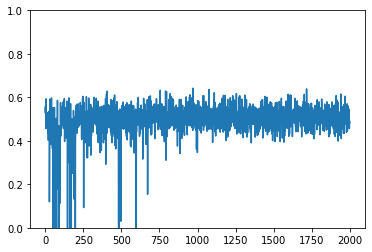

In [14]:
plt.plot(ctanh.cv_results_['split2_test_score'])
plt.ylim(bottom=0);
plt.ylim(top=1);

In [15]:
input_scale = np.array([ctanh.cv_results_['params'][i]['input_scale'] for i in range(len(ctanh.cv_results_['params']))])
res_scale = np.array([ctanh.cv_results_['params'][i]['res_scale'] for i in range(len(ctanh.cv_results_['params']))])
split2_test_score = ctanh.cv_results_['split2_test_score']

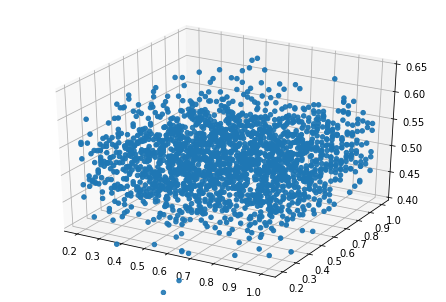

In [29]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(input_scale, res_scale, split2_test_score, vmin=0, vmax=1)
ax.set_zlim((0.4,0.65))
plt.show()

In [32]:
import data_utils

In [35]:
data_utils.scale(np.random.rand(10,1,10), [0,1])

array([[[0.        , 0.43554316, 0.7742081 , 1.        , 0.32619377,
         0.16997419, 0.72007572, 0.62299856, 0.55592281, 0.4357439 ]],

       [[0.        , 0.43177086, 0.26960728, 1.        , 0.89465638,
         0.22646029, 0.08859318, 0.47132282, 0.18868792, 0.47681098]],

       [[0.47047814, 0.        , 0.25445198, 0.60154168, 1.        ,
         0.49367252, 0.71381769, 0.97409486, 0.94982829, 0.84046674]],

       [[0.85443734, 0.19069196, 0.629661  , 0.        , 0.65086385,
         0.70237881, 0.9798189 , 0.14593346, 0.00260245, 1.        ]],

       [[0.59269604, 0.01692677, 0.35038326, 1.        , 0.75363999,
         0.        , 0.10688141, 0.25282816, 0.52890457, 0.69922922]],

       [[1.        , 0.        , 0.94903823, 0.25525738, 0.66726544,
         0.62252532, 0.99537127, 0.59329476, 0.47745453, 0.62716357]],

       [[0.89133187, 0.11387169, 1.        , 0.66014384, 0.5916603 ,
         0.        , 0.23576565, 0.0594252 , 0.54761268, 0.32606861]],

       [[0.08